In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
sns.set_style("darkgrid")

In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
df = pd.read_csv("data.csv",low_memory=False)

In [5]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000       4975.00000   36 months   
1  1077430    1314167       2500         2500       2500.00000   60 months   
2  1077175    1313524       2400         2400       2400.00000   36 months   
3  1076863    1277178      10000        10000      10000.00000   36 months   
4  1075358    1311748       3000         3000       3000.00000   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%    162.87000     B        B2  ...                NaN   
1   15.27%     59.83000     C        C4  ...                NaN   
2   15.96%     84.33000     C        C5  ...                NaN   
3   13.49%    339.31000     C        C1  ...                NaN   
4   12.69%     67.79000     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN              0.00000   
1                NaN            NaN               NaN              0.00000   
2                NaN            NaN               NaN              0.00000   
3                NaN            NaN               NaN              0.00000   
4                NaN            NaN               NaN              0.00000   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0   0.00000             NaN               NaN            NaN   
1   0.00000             NaN               NaN            NaN   
2   0.00000             NaN               NaN            NaN   
3   0.00000             NaN               NaN            NaN   
4   0.00000             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 115 columns]

In [6]:
columns = list(df.columns)

In [7]:
df.describe()

id     member_id   loan_amnt  funded_amnt  funded_amnt_inv  \
count   42535.00000   42535.00000 42535.00000  42535.00000      42535.00000   
mean   664579.85231  825702.55117 11089.72258  10821.58575      10139.83060   
std    219302.21932  279540.90564  7410.93839   7146.91468       7131.68645   
min     54734.00000   70473.00000   500.00000    500.00000          0.00000   
25%    498392.50000  638479.50000  5200.00000   5000.00000       4950.00000   
50%    644250.00000  824178.00000  9700.00000   9600.00000       8500.00000   
75%    825822.50000 1033946.50000 15000.00000  15000.00000      14000.00000   
max   1077501.00000 1314167.00000 35000.00000  35000.00000      35000.00000   

       installment    annual_inc         dti  delinq_2yrs  fico_range_low  \
count  42535.00000   42531.00000 42535.00000  42506.00000     42535.00000   
mean     322.62306   69136.55642    13.37304      0.15245       713.05254   
std      208.92722   64096.34972     6.72631      0.51241        36.18844   
min       15.67000    1896.00000     0.00000      0.00000       610.00000   
25%      165.52000   40000.00000     8.20000      0.00000       685.00000   
50%      277.69000   59000.00000    13.47000      0.00000       710.00000   
75%      428.18000   82500.00000    18.68000      0.00000       740.00000   
max     1305.19000 6000000.00000    29.99000     13.00000       825.00000   

       ...  num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count  ...             0.00000             0.00000         0.00000   
mean   ...                 NaN                 NaN             NaN   
std    ...                 NaN                 NaN             NaN   
min    ...                 NaN                 NaN             NaN   
25%    ...                 NaN                 NaN             NaN   
50%    ...                 NaN                 NaN             NaN   
75%    ...                 NaN                 NaN             NaN   
max    ...                 NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies   tax_liens  tot_hi_cred_lim  \
count           0.00000           41170.00000 42430.00000          0.00000   
mean                NaN               0.04523     0.00002              NaN   
std                 NaN               0.20874     0.00485              NaN   
min                 NaN               0.00000     0.00000              NaN   
25%                 NaN               0.00000     0.00000              NaN   
50%                 NaN               0.00000     0.00000              NaN   
75%                 NaN               0.00000     0.00000              NaN   
max                 NaN               2.00000     1.00000              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count            0.00000         0.00000                     0.00000  
mean                 NaN             NaN                         NaN  
std                  NaN             NaN                         NaN  
min                  NaN             NaN                         NaN  
25%                  NaN             NaN                         NaN  
50%                  NaN             NaN                         NaN  
75%                  NaN             NaN                         NaN  
max                  NaN             NaN                         NaN  

[8 rows x 91 columns]

In [8]:
df_copy = df.copy()

In [9]:
print(df_copy["loan_status"].isnull().sum())

0


In [10]:
df_copy["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

[]

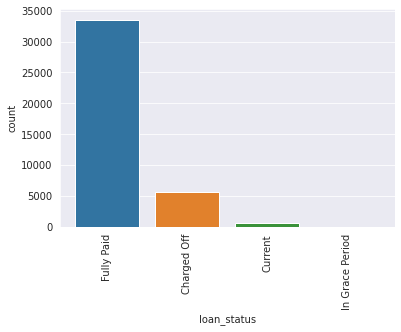

In [11]:
sns.countplot(
    x="loan_status",
    data=df_copy[df_copy["loan_status"].isin(['Fully Paid', 'Charged Off','Current', 'In Grace Period'])]
)
plt.xticks(rotation ='vertical')
plt.plot()

[]

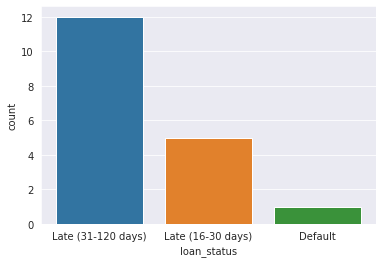

In [12]:
sns.countplot(
    x="loan_status",
    data=df_copy[df_copy["loan_status"].isin([ 'Late (31-120 days)', 'Late (16-30 days)', 'Default'])]
)
plt.plot()

[]

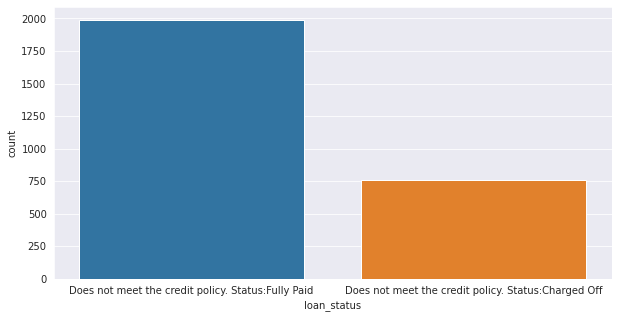

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(
    x="loan_status",
    data=df_copy[df_copy["loan_status"].isin([ 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])]
)
# plt.xticks(rotation ='45')
plt.plot()

[]

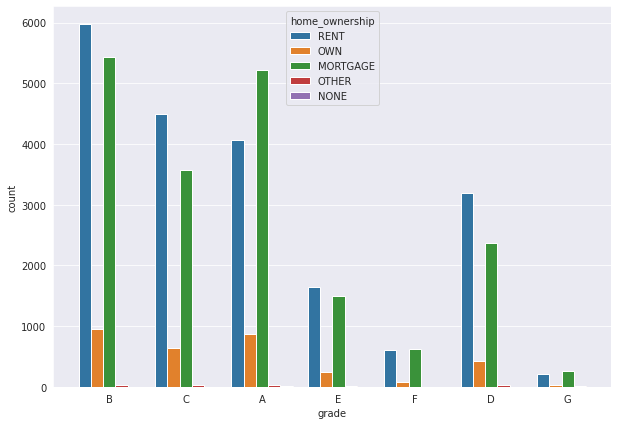

In [14]:
plt.rc('font', size=10)
plt.figure(figsize=(10,7))
sns.countplot(x='grade',hue='home_ownership',data=df_copy)
plt.plot()

In [15]:
df_copy['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
df['term'].isnull().sum() # checking any missing values

0

[]

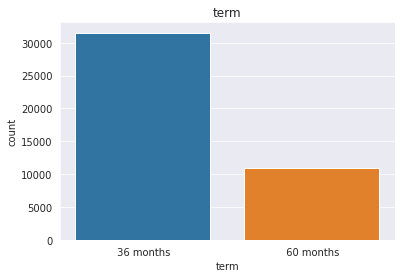

In [17]:
plt.rc('font', size=10)
sns.countplot(x='term',data=df_copy)
plt.title("term")
plt.plot()

In [18]:
# new_term = list(map(lambda element:eval(element.lower().replace('months','')),df_copy['term']))

In [19]:
# df_copy['term'] = new_term

In [20]:
df_copy['term']

0         36 months
1         60 months
2         36 months
3         36 months
4         60 months
            ...    
42530     36 months
42531     36 months
42532     36 months
42533     36 months
42534     36 months
Name: term, Length: 42535, dtype: object

In [21]:
df_copy['int_rate'].isnull().sum() # checking any missing values

0

In [22]:
df_copy['int_rate'].describe()

count       42535
unique        394
top        10.99%
freq          970
Name: int_rate, dtype: object

In [23]:
df_copy['int_rate']

0         10.65%
1         15.27%
2         15.96%
3         13.49%
4         12.69%
          ...   
42530     10.28%
42531      9.64%
42532      9.33%
42533      8.38%
42534      7.75%
Name: int_rate, Length: 42535, dtype: object

In [24]:
def update_int_rate(element):
    return eval(element.replace(' ','').replace('%',''))

In [25]:
new_int_rate = map(update_int_rate,df_copy['int_rate'])

In [26]:
new_int_rate = list(new_int_rate)

In [27]:
len(new_int_rate)

42535

In [28]:
df_copy['int_rate'] = new_int_rate

In [29]:
df_copy['int_rate']

0       10.65000
1       15.27000
2       15.96000
3       13.49000
4       12.69000
          ...   
42530   10.28000
42531    9.64000
42532    9.33000
42533    8.38000
42534    7.75000
Name: int_rate, Length: 42535, dtype: float64

In [30]:
df_copy["application_type"].unique()

array(['INDIVIDUAL'], dtype=object)

In [31]:
df_copy["application_type"].value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

In [32]:
df_copy['application_type'].isnull().sum()

0

In [33]:
del(df_copy['application_type'])

In [34]:
df_copy['tax_liens'].isnull().sum()

105

In [35]:
df_copy['tax_liens'].unique()

array([ 0., nan,  1.])

In [36]:
len(df_copy[df_copy['tax_liens'] == 0])

42429

In [37]:
len(df_copy[df_copy['tax_liens'] == 1]) # ignore this

1

In [38]:
df_copy['funded_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
42530     3500
42531     1000
42532     2525
42533     6500
42534     5000
Name: funded_amnt, Length: 42535, dtype: int64

In [39]:
df_copy["loan_amnt"]

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
42530     3500
42531     1000
42532     2525
42533     6500
42534     5000
Name: loan_amnt, Length: 42535, dtype: int64

In [40]:
df_copy["installment"].isnull().sum()

0

In [41]:
df_copy["policy_code"].unique()

array([1])

In [42]:
df_copy["policy_code"].isnull().sum()

0

In [43]:
del(df_copy["policy_code"])

In [44]:
df_copy["emp_length"]

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
42530     < 1 year
42531     < 1 year
42532     < 1 year
42533     < 1 year
42534    10+ years
Name: emp_length, Length: 42535, dtype: object

In [45]:
df_copy["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

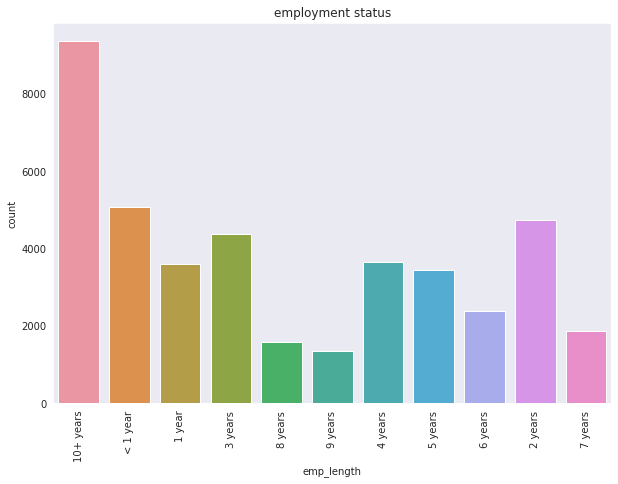

In [46]:
plt.rc('font', size=10)
plt.figure(figsize=(10,7))
plt.grid()
sns.countplot(x="emp_length",data=df_copy)
plt.title("employment status")
plt.xticks(rotation="vertical")
plt.show()

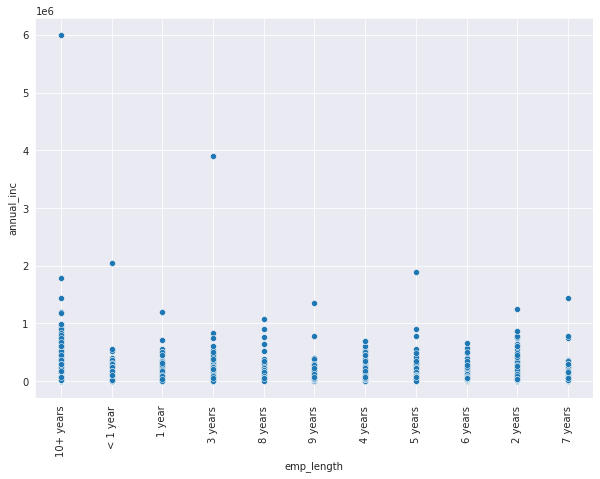

In [47]:
plt.rc('font', size=10)
plt.figure(figsize=(10,7))
sns.scatterplot(x="emp_length",y="annual_inc",data=df_copy)
plt.xticks(rotation="vertical")
plt.show()

In [48]:
df_copy["annual_inc"].describe()

count     42531.00000
mean      69136.55642
std       64096.34972
min        1896.00000
25%       40000.00000
50%       59000.00000
75%       82500.00000
max     6000000.00000
Name: annual_inc, dtype: float64

In [49]:
df_copy["installment"]

0       162.87000
1        59.83000
2        84.33000
3       339.31000
4        67.79000
           ...   
42530   113.39000
42531    32.11000
42532    80.69000
42533   204.84000
42534   156.11000
Name: installment, Length: 42535, dtype: float64

In [50]:
df_copy["installment"].isnull().sum()

0

[]

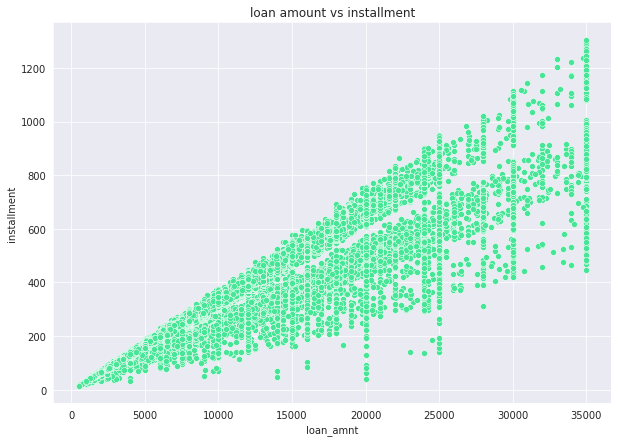

In [51]:
plt.rc('font', size=10)
plt.figure(figsize=(10,7))
sns.scatterplot(x="loan_amnt",y="installment",data=df_copy,color="#47E697")
plt.title("loan amount vs installment")
plt.plot()

[]

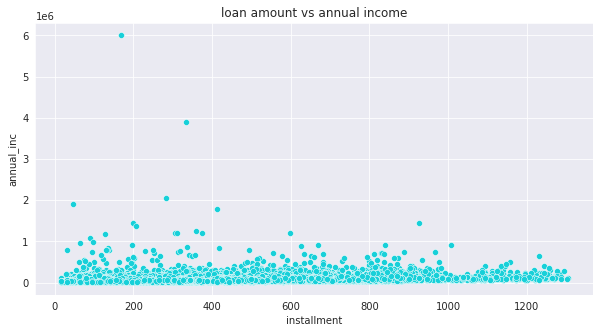

In [52]:
# int_rate
plt.rc('font', size=10)
plt.figure(figsize=(10,5))
sns.scatterplot(y="annual_inc",x="installment",data=df_copy,color="#17D0D9")
plt.title("loan amount vs annual income")
plt.plot()

In [53]:
df_copy["annual_inc"]

0        24000.00000
1        30000.00000
2        12252.00000
3        49200.00000
4        80000.00000
            ...     
42530   180000.00000
42531    12000.00000
42532   110000.00000
42533            NaN
42534    70000.00000
Name: annual_inc, Length: 42535, dtype: float64

In [54]:
df_copy["pymnt_plan"] #ignore this

0        n
1        n
2        n
3        n
4        n
        ..
42530    n
42531    n
42532    n
42533    n
42534    n
Name: pymnt_plan, Length: 42535, dtype: object

In [55]:
df_copy["pymnt_plan"].unique()

array(['n', 'y'], dtype=object)

[]

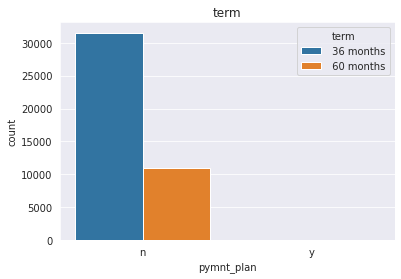

In [56]:
plt.rc('font', size=10)
sns.countplot(x='pymnt_plan',hue="term",data=df_copy)
plt.title("term")
plt.plot()

In [57]:
df_copy[df_copy["pymnt_plan"] == "y"]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
25684  582170     748208      25000        25000      23725.00000   60 months   

       int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
25684  15.21000    597.51000     D        D2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
25684                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
25684              0.00000   0.00000             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
25684            NaN                        NaN  

[1 rows x 113 columns]

In [58]:
df_copy["fico_range_low"]

0        735
1        740
2        735
3        690
4        695
        ... 
42530    685
42531    695
42532    710
42533    740
42534    770
Name: fico_range_low, Length: 42535, dtype: int64

In [59]:
df_copy["fico_range_low"].isnull().sum()

0

In [60]:
df_copy["fico_range_high"]

0        739
1        744
2        739
3        694
4        699
        ... 
42530    689
42531    699
42532    714
42533    744
42534    774
Name: fico_range_high, Length: 42535, dtype: int64

In [61]:
df_copy["fico_range_low"].describe()

count   42535.00000
mean      713.05254
std        36.18844
min       610.00000
25%       685.00000
50%       710.00000
75%       740.00000
max       825.00000
Name: fico_range_low, dtype: float64

In [62]:
df_copy["fico_range_high"].describe()

count   42535.00000
mean      717.05254
std        36.18844
min       614.00000
25%       689.00000
50%       714.00000
75%       744.00000
max       829.00000
Name: fico_range_high, dtype: float64

[]

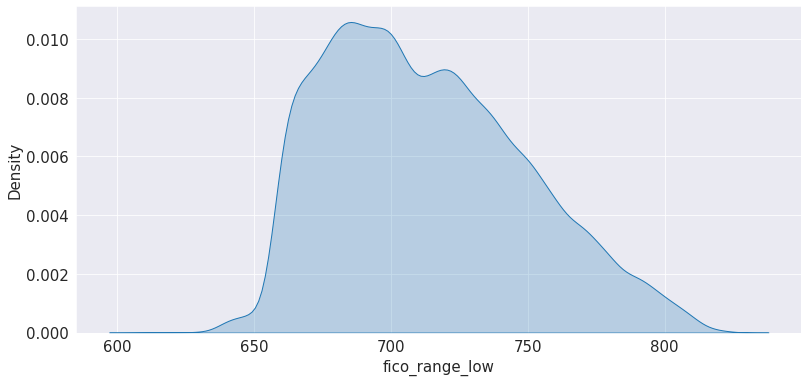

In [63]:
plt.rc('font', size=15)
plt.figure(figsize=(13,6))
sns.kdeplot(x="fico_range_low",data=df_copy,shade=True)
plt.plot()

[]

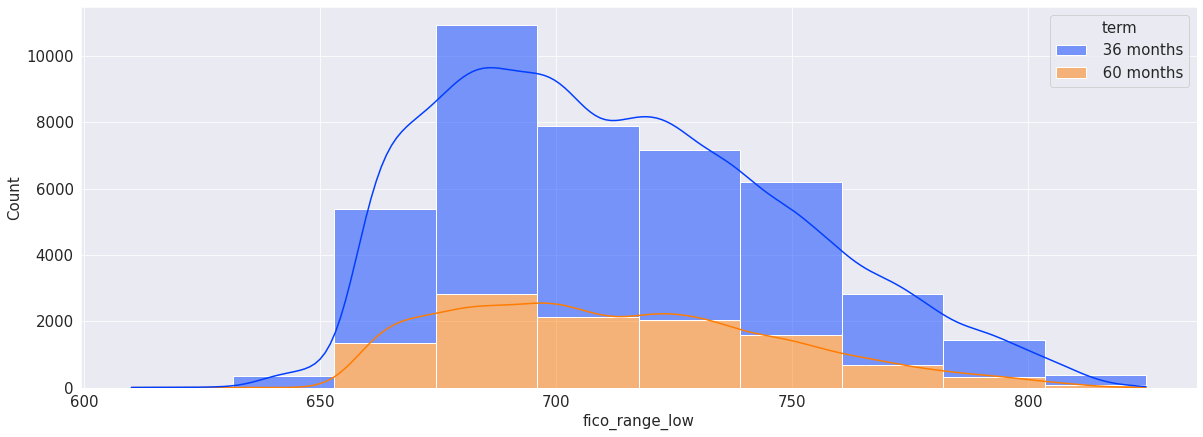

In [64]:
plt.figure(figsize=(20,7))
sns.histplot(
    x="fico_range_low",
    hue="term",
    data=df_copy,
    kde=True,
    multiple="stack",
    bins=10,
    palette="bright"
)
plt.plot()

In [65]:
df_copy["fico_range_high"].isnull().sum()

0

[]

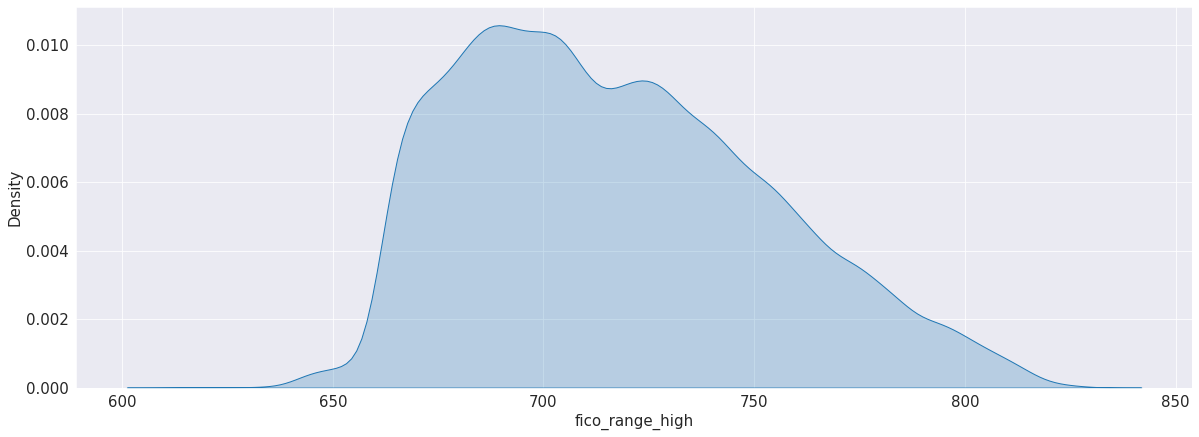

In [66]:
plt.rc('font', size=15)
plt.figure(figsize=(20,7))
sns.kdeplot(x="fico_range_high",data=df_copy,shade=True)
plt.plot()

[]

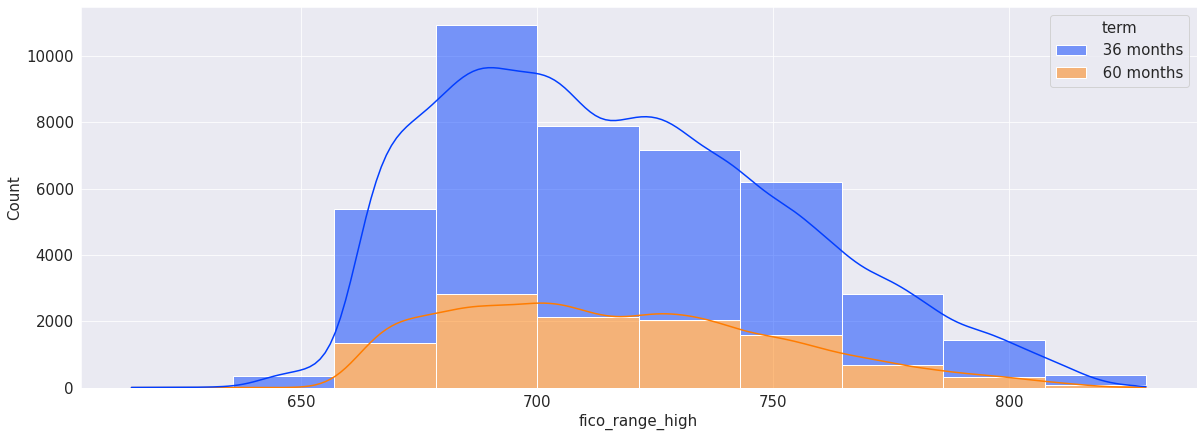

In [67]:
plt.rc('font', size=15)
plt.figure(figsize=(20,7))
sns.histplot(
    x="fico_range_high",
    hue="term",
    data=df_copy,
    kde=True,
    multiple="stack",
    bins=10,
    palette="bright"
)
plt.plot()

[]

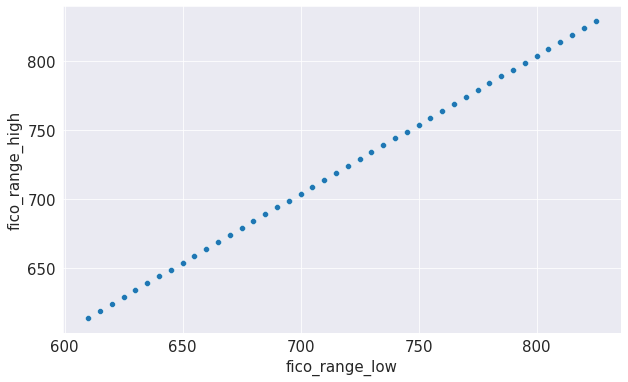

In [68]:
plt.rc('font', size=15)
plt.figure(figsize=(10,6))
sns.scatterplot(x="fico_range_low",y="fico_range_high",data=df_copy)
plt.plot()

[]

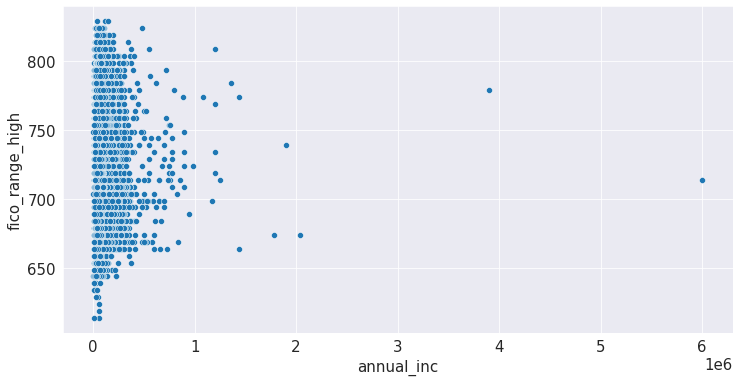

In [69]:
plt.rc('font', size=15)
plt.figure(figsize=(12,6))
sns.scatterplot(x="annual_inc",y="fico_range_high",data=df_copy)
plt.plot()

In [70]:
df_copy["total_acc"]

0        9.00000
1        4.00000
2       10.00000
3       37.00000
4       38.00000
          ...   
42530        NaN
42531        NaN
42532        NaN
42533        NaN
42534        NaN
Name: total_acc, Length: 42535, dtype: float64

In [71]:
df_copy["total_acc"].isnull().sum()

29

In [72]:
df_copy["total_acc"].describe()

count   42506.00000
mean       22.12441
std        11.59281
min         1.00000
25%        13.00000
50%        20.00000
75%        29.00000
max        90.00000
Name: total_acc, dtype: float64

[]

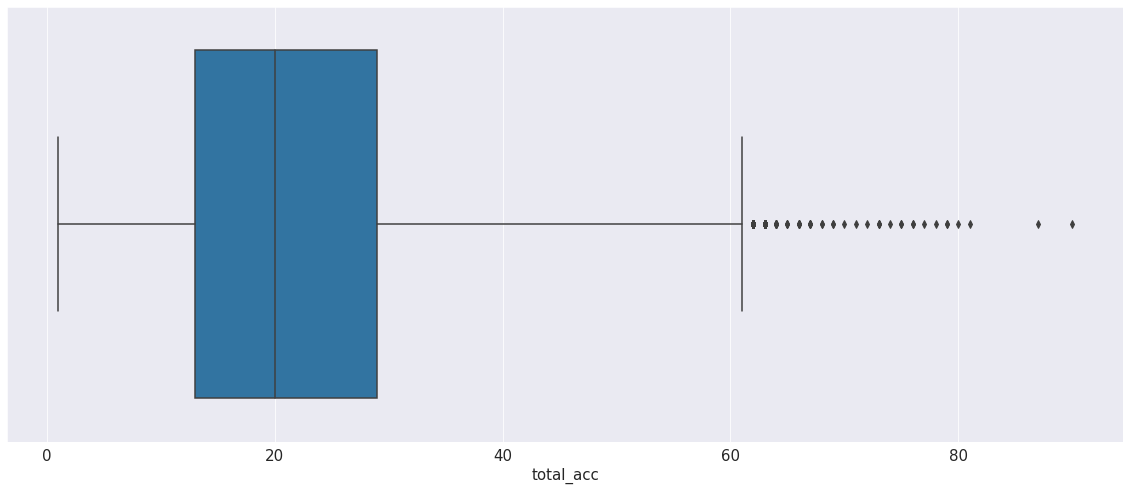

In [73]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.boxplot(x="total_acc",data=df_copy,whis=2)
plt.plot()

[]

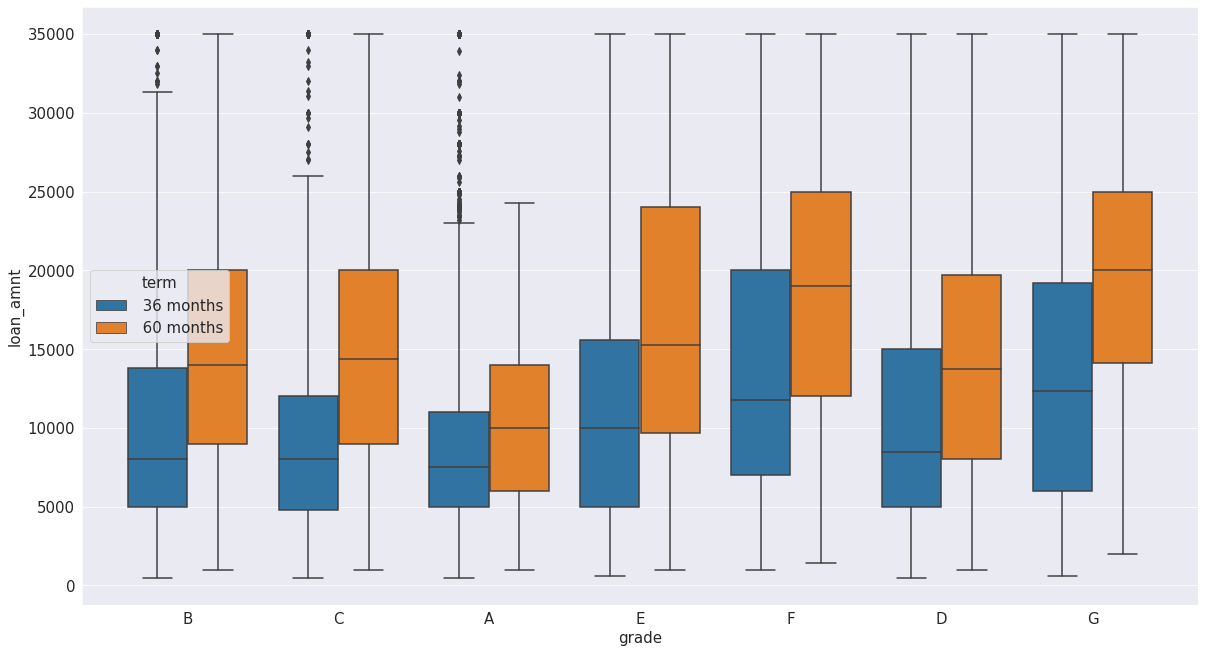

In [74]:
plt.rc('font', size=15)
plt.figure(figsize=(20,11))
sns.boxplot(
    x="grade",
    y="loan_amnt",
    hue="term",
    data=df_copy,
    whis=2
)
plt.plot()

[]

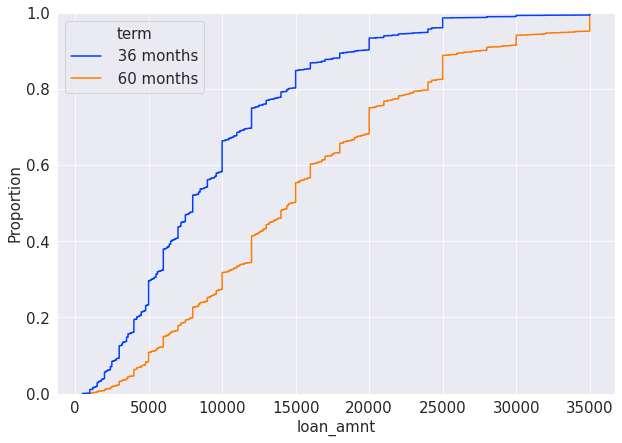

In [75]:
plt.rc('font', size=15)
plt.figure(figsize=(10,7))
sns.ecdfplot(
    x="loan_amnt",
    hue="term",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

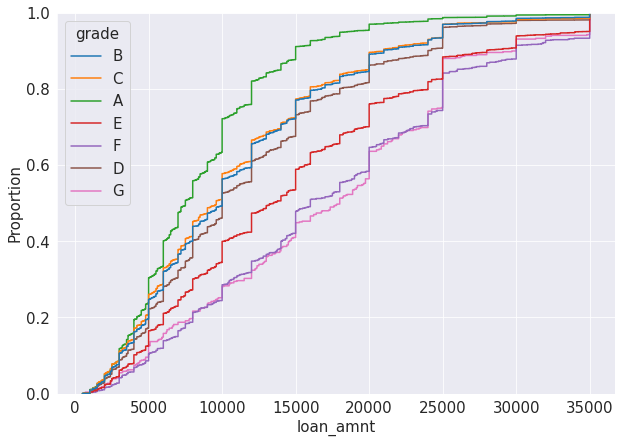

In [76]:
plt.rc('font', size=15)
plt.figure(figsize=(10,7))
sns.ecdfplot(x="loan_amnt",hue="grade",data=df_copy)
# plt.axhline(0.5,color="red")
plt.plot()

In [77]:
df_copy["total_bc_limit"].describe()

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: total_bc_limit, dtype: float64

In [78]:
df_copy["total_bc_limit"].isnull().sum()

42535

In [79]:
df_copy["home_ownership"].value_counts()

RENT        20181
MORTGAGE    18959
OWN          3251
OTHER         136
NONE            8
Name: home_ownership, dtype: int64

[]

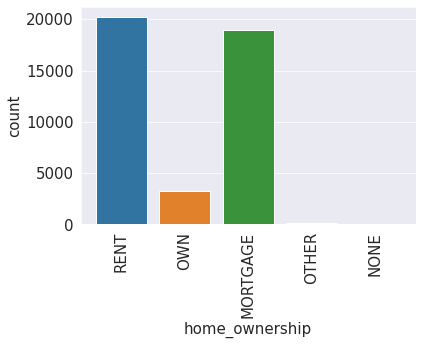

In [80]:
sns.countplot(x="home_ownership",data=df_copy)
plt.xticks(rotation="90")
plt.plot()

[]

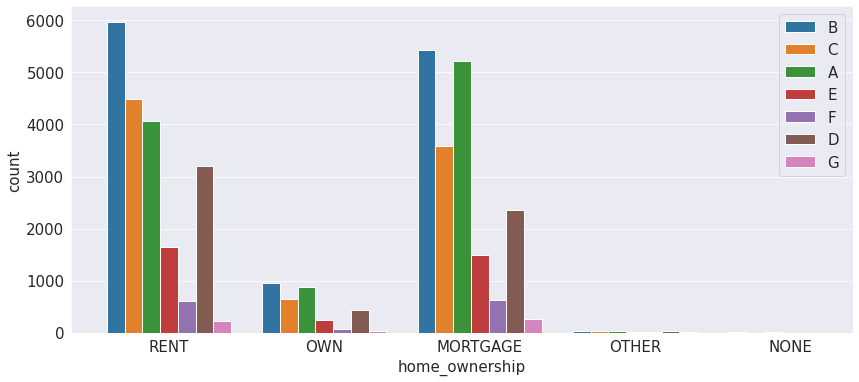

In [81]:
plt.rc('font', size=15)
plt.figure(figsize=(14,6))
sns.countplot(x="home_ownership",hue="grade",data=df_copy)
plt.legend(loc='upper right')
plt.plot()

In [82]:
df_copy["tot_coll_amt"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: tot_coll_amt, Length: 42535, dtype: float64

In [83]:
df_copy["tot_coll_amt"].isnull().sum()

42535

In [84]:
df_copy["tot_cur_bal"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: tot_cur_bal, Length: 42535, dtype: float64

In [85]:
df_copy["tot_cur_bal"].isnull().sum()

42535

In [86]:
df_copy["tax_liens"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: tax_liens, Length: 42535, dtype: float64

In [87]:
df_copy["tax_liens"].describe()

count   42430.00000
mean        0.00002
std         0.00485
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: tax_liens, dtype: float64

In [88]:
df_copy["tax_liens"].isnull().sum()

105

In [89]:
df_copy["tax_liens"].value_counts()

0.00000    42429
1.00000        1
Name: tax_liens, dtype: int64

In [90]:
df_copy["pub_rec_bankruptcies"].isnull().sum()

1365

In [91]:
df_copy["pub_rec_bankruptcies"].value_counts()

0.00000    39316
1.00000     1846
2.00000        8
Name: pub_rec_bankruptcies, dtype: int64

[]

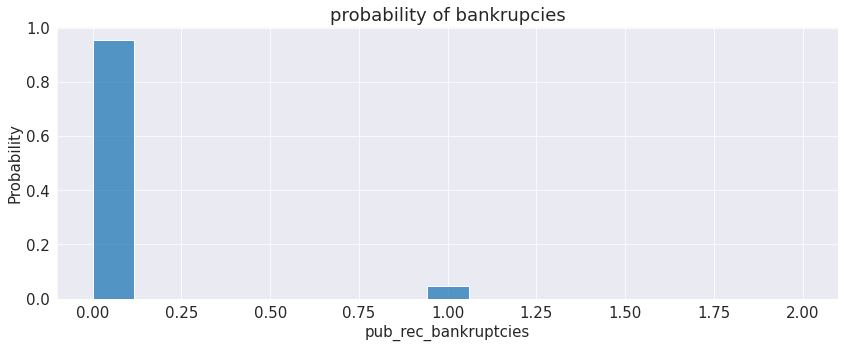

In [92]:
plt.rc('font', size=15)
plt.figure(figsize=(14,5))
plt.title("probability of bankrupcies")
sns.histplot(
    x="pub_rec_bankruptcies",
    data=df_copy,
    stat="probability",
)
plt.plot()

[]

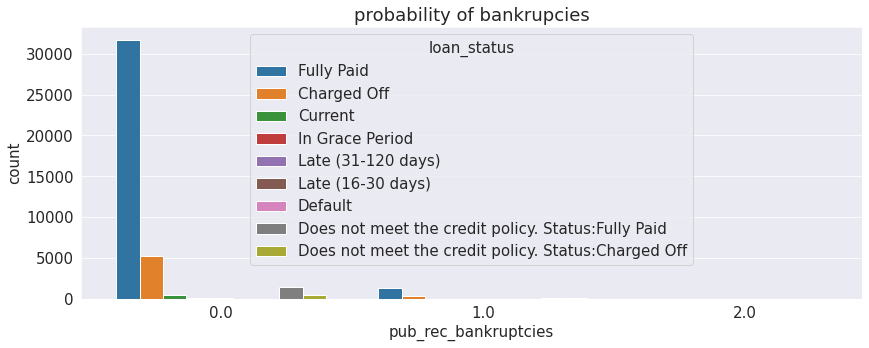

In [93]:
plt.rc('font', size=15)
plt.figure(figsize=(14,5))
plt.title("probability of bankrupcies")
sns.countplot(
    x="pub_rec_bankruptcies",
    data=df_copy,
    hue="loan_status"
#     stat="probability",
)
plt.plot()

[]

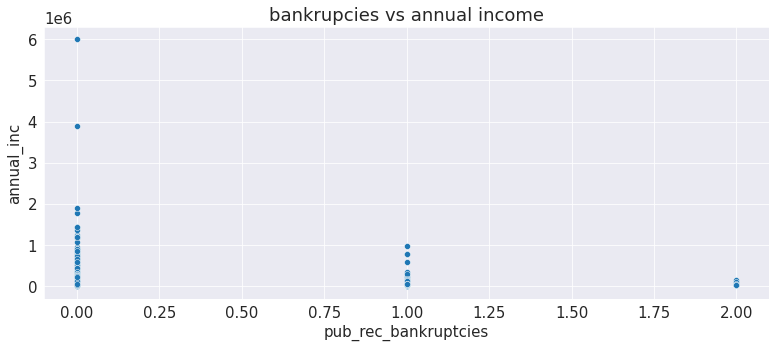

In [94]:
plt.rc('font', size=15)
plt.figure(figsize=(13,5))
sns.scatterplot(
    y="annual_inc",
    x="pub_rec_bankruptcies",
    data=df_copy, 
)
plt.title("bankrupcies vs annual income")
plt.plot()

In [95]:
df_copy["pub_rec"].describe()

count   42506.00000
mean        0.05816
std         0.24571
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         5.00000
Name: pub_rec, dtype: float64

In [96]:
df_copy["pub_rec"].value_counts()

0.00000    40130
1.00000     2298
2.00000       64
3.00000       11
4.00000        2
5.00000        1
Name: pub_rec, dtype: int64

In [97]:
df_copy["pub_rec"].isnull().sum()

29

A derogatory item is an entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services. Public records and collections are derogatory items because they reflect financial obligations that were not paid as agreed.

[]

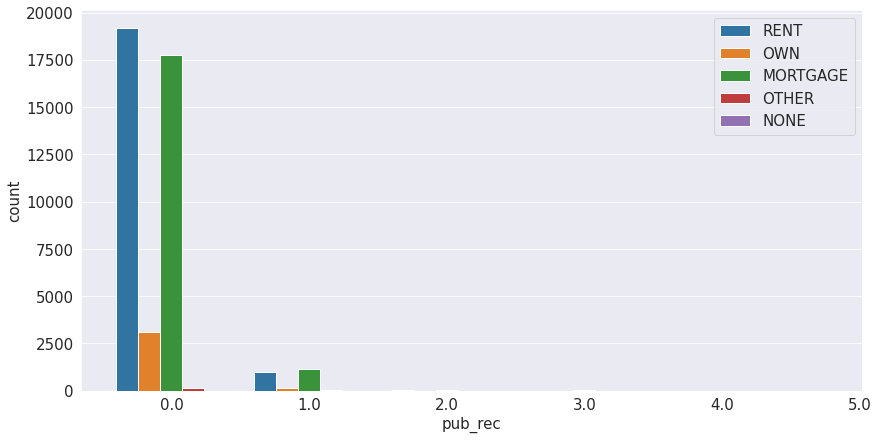

In [98]:
plt.figure(figsize=(14,7))
sns.countplot(
    x="pub_rec",
    hue="home_ownership",
    data=df_copy
)
plt.legend(loc='upper right')
plt.plot()

In [99]:
df_copy["total_pymnt"]

0        5863.15519
1        1008.71000
2        3005.66684
3       12231.89000
4        3784.49000
            ...    
42530    3719.43107
42531    1155.60090
42532    2904.49883
42533    7373.90496
42534    5619.76209
Name: total_pymnt, Length: 42535, dtype: float64

In [100]:
df_copy["total_pymnt"].isnull().sum()

0

[]

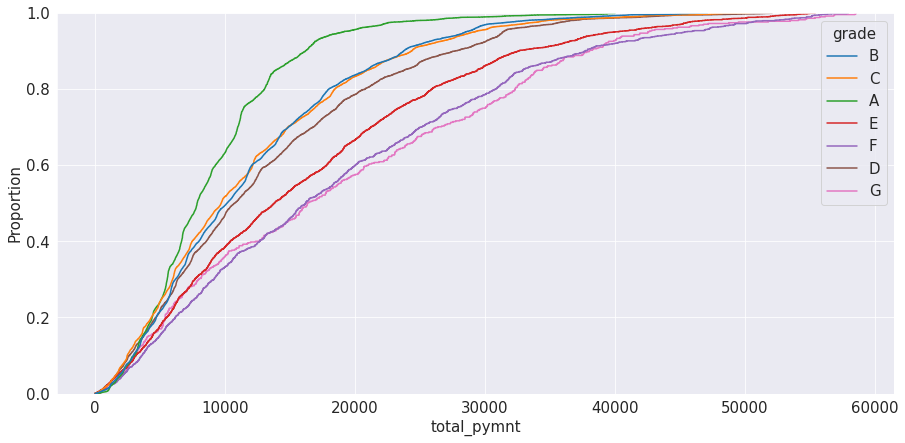

In [101]:
plt.rc('font', size=15)
plt.figure(figsize=(15,7))
sns.ecdfplot(
    x="total_pymnt",
    hue="grade",
    data=df_copy
)
# plt.axhline(0.5,color="#00C853")
plt.plot()

[]

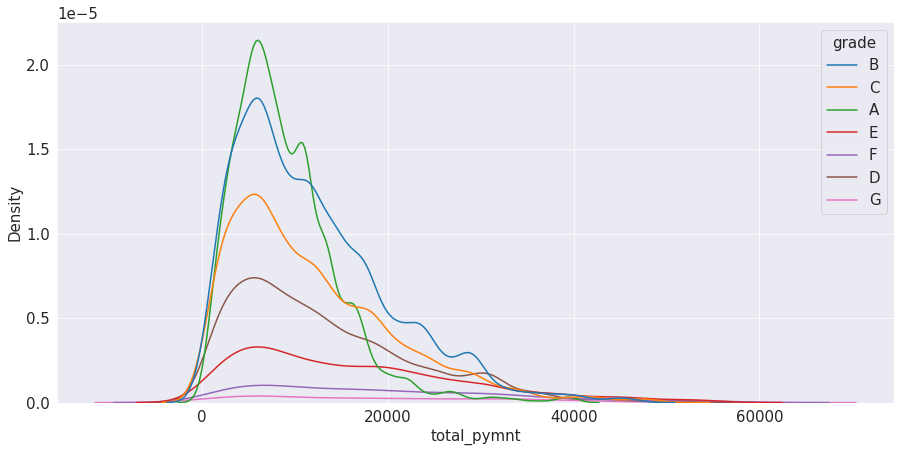

In [102]:
plt.rc('font', size=15)
plt.figure(figsize=(15,7))
sns.kdeplot(
    x="total_pymnt",
    hue="grade",
    data=df_copy
)
plt.plot()

[]

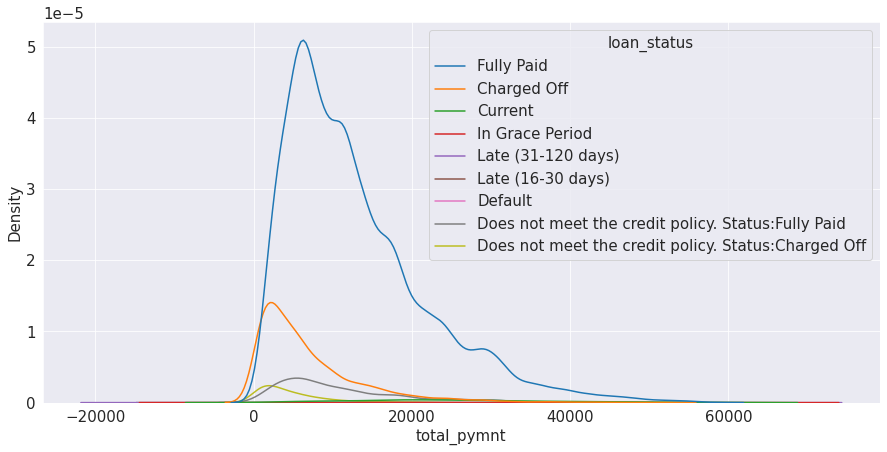

In [104]:
plt.rc('font', size=15)
plt.figure(figsize=(15,7))
sns.kdeplot(
    x="total_pymnt",
    hue="loan_status",
    data=df_copy,
    warn_singular=False
)
plt.plot()

In [105]:
df_copy["total_rec_prncp"].describe()

count   42535.00000
mean     9664.27135
std      7087.46938
min         0.00000
25%      4400.00000
50%      8000.00000
75%     13425.00000
max     35000.02000
Name: total_rec_prncp, dtype: float64

[]

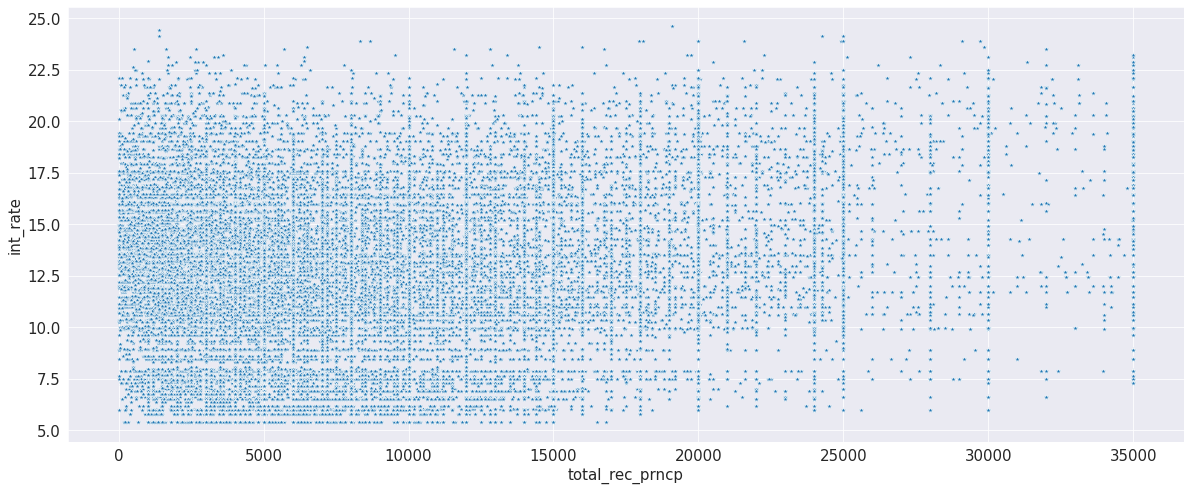

In [106]:
# checking if interest rate is increased or decreased 
# with increasing or decreasing of total principle amount 
# received

plt.figure(figsize=(20,8))
sns.scatterplot(
    x="total_rec_prncp",
    y="int_rate",
    data=df_copy,
    marker="*"
)
plt.plot()

[]

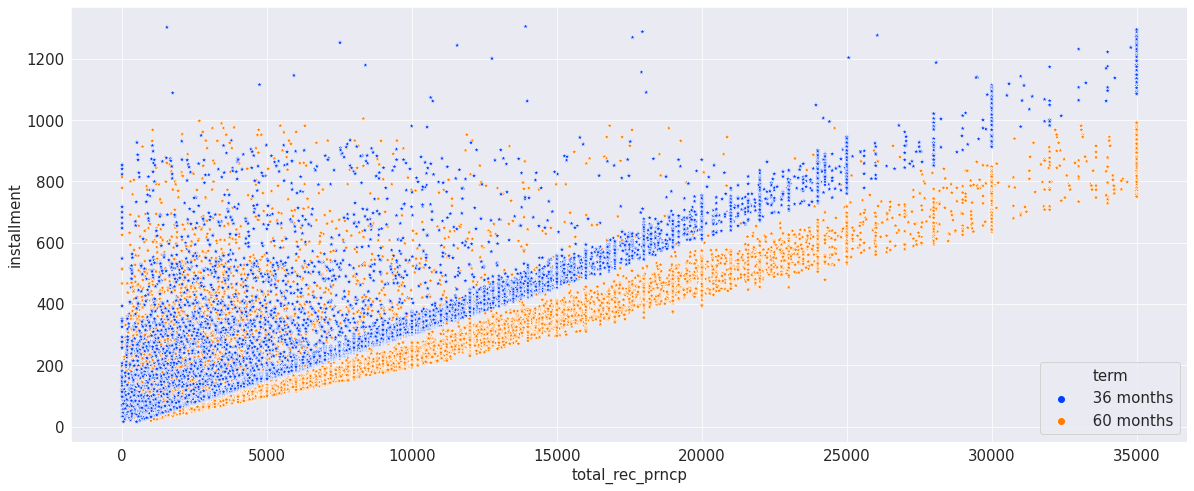

In [107]:
plt.figure(figsize=(20,8))
sns.scatterplot(
    x="total_rec_prncp",
    y="installment",
    hue="term",
    data=df_copy,
    marker="*",
    palette="bright"
)
plt.plot()

[]

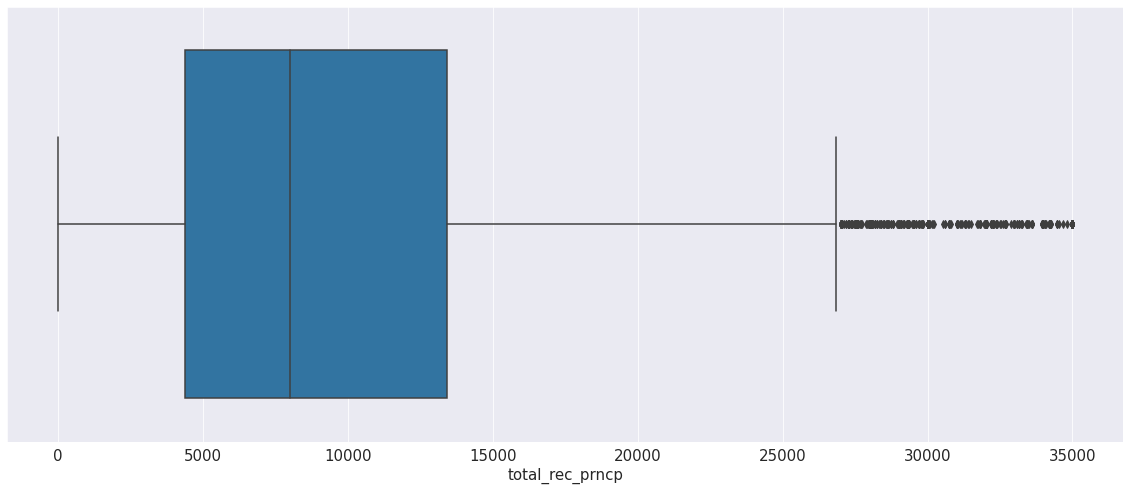

In [108]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.boxplot(
    x="total_rec_prncp",
    data=df_copy,
)
plt.plot()

In [109]:
df_copy["max_bal_bc"].isnull().sum()

42535

In [110]:
df_copy["max_bal_bc"].describe()

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: max_bal_bc, dtype: float64

In [111]:
df_copy["last_pymnt_amnt"]

0       171.62000
1       119.66000
2       649.91000
3       357.48000
4        67.79000
           ...   
42530     0.00000
42531    32.41000
42532    82.03000
42533   205.32000
42534   156.39000
Name: last_pymnt_amnt, Length: 42535, dtype: float64

In [112]:
df_copy["last_pymnt_amnt"].isnull().sum()

0

In [113]:
df_copy["last_pymnt_amnt"].describe()

count   42535.00000
mean     2612.72010
std      4385.19894
min         0.00000
25%       211.37000
50%       527.93000
75%      3170.22000
max     36115.20000
Name: last_pymnt_amnt, dtype: float64

[]

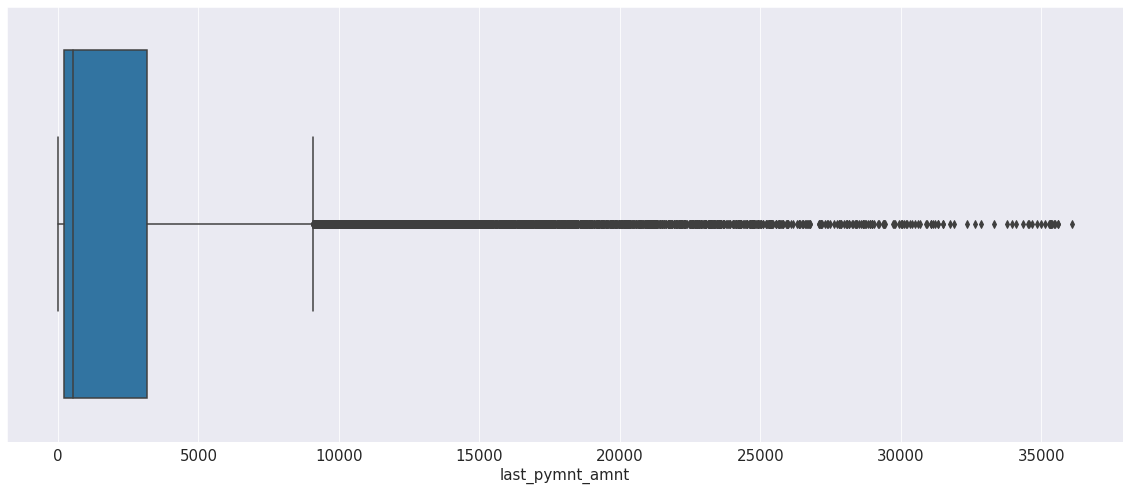

In [114]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.boxplot(
    x="last_pymnt_amnt",
    data=df_copy,
    whis=2
)
plt.plot()

In [115]:
df_copy["max_bal_bc"].describe()

count   0.00000
mean        NaN
std         NaN
min         NaN
25%         NaN
50%         NaN
75%         NaN
max         NaN
Name: max_bal_bc, dtype: float64

In [116]:
df_copy["max_bal_bc"].isnull().sum()

42535

In [117]:
df_copy["total_rev_hi_lim"].isnull().sum()

42535

In [118]:
df_copy["total_rec_late_fee"]

0        0.00000
1        0.00000
2        0.00000
3       16.97000
4        0.00000
          ...   
42530    0.00000
42531    0.00000
42532    0.00000
42533    0.00000
42534    0.00000
Name: total_rec_late_fee, Length: 42535, dtype: float64

In [119]:
df_copy["total_rec_late_fee"].describe()

count   42535.00000
mean        1.51532
std         7.82780
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       209.00000
Name: total_rec_late_fee, dtype: float64

In [120]:
df_copy["total_rec_late_fee"].isnull().sum()

0

[]

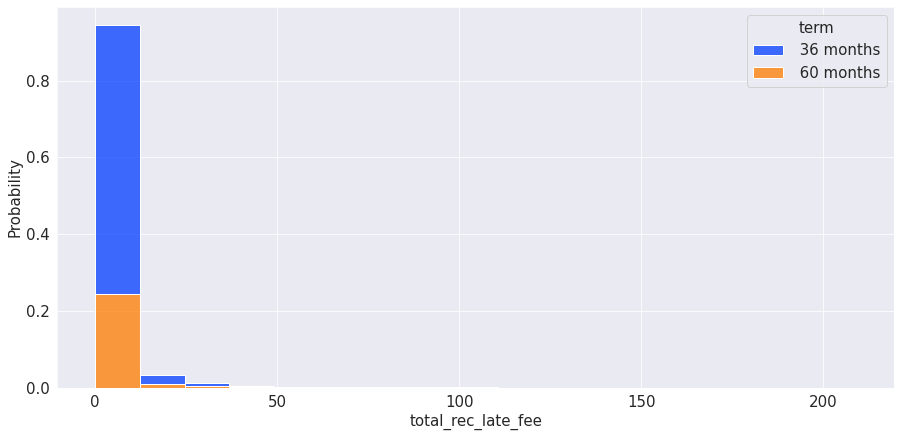

In [121]:
plt.rc('font', size=15)
plt.figure(figsize=(15,7))
sns.histplot(
    x="total_rec_late_fee",
    data=df_copy,
    stat="probability",
    hue="term",
    palette="bright",
    multiple="stack"
)
plt.plot()

In [122]:
df_copy["total_pymnt_inv"]

0        5833.84000
1        1008.71000
2        3005.67000
3       12231.89000
4        3784.49000
            ...    
42530     239.11000
42531       0.00000
42532     258.82000
42533       0.00000
42534       0.00000
Name: total_pymnt_inv, Length: 42535, dtype: float64

In [123]:
df_copy["total_pymnt_inv"].isnull().sum()

0

[]

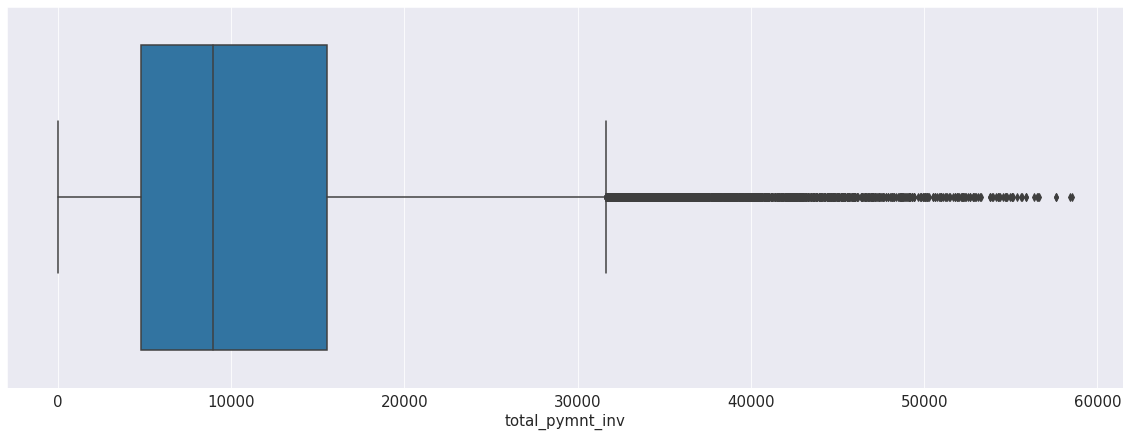

In [124]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="total_pymnt_inv",
    data=df_copy
)
plt.plot()

In [125]:
df_copy["total_bc_limit"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_bc_limit, Length: 42535, dtype: float64

In [126]:
df_copy["total_bc_limit"].isnull().sum()

42535

A line of credit is a flexible loan from a financial institution that consists of a defined amount of money that you can access as needed and repay either immediately or over time.

In [127]:
df_copy["total_acc"].describe()

count   42506.00000
mean       22.12441
std        11.59281
min         1.00000
25%        13.00000
50%        20.00000
75%        29.00000
max        90.00000
Name: total_acc, dtype: float64

In [128]:
df_copy["total_acc"].isnull().sum()

29

In [129]:
df_copy["purpose"]

0           credit_card
1                   car
2        small_business
3                 other
4                 other
              ...      
42530             other
42531             other
42532             other
42533             other
42534             other
Name: purpose, Length: 42535, dtype: object

In [130]:
df_copy["purpose"].isnull().sum()

0

In [131]:
df_copy["purpose"].value_counts()

debt_consolidation    19776
credit_card            5477
other                  4425
home_improvement       3199
major_purchase         2311
small_business         1992
car                    1615
wedding                1004
medical                 753
moving                  629
house                   426
educational             422
vacation                400
renewable_energy        106
Name: purpose, dtype: int64

[]

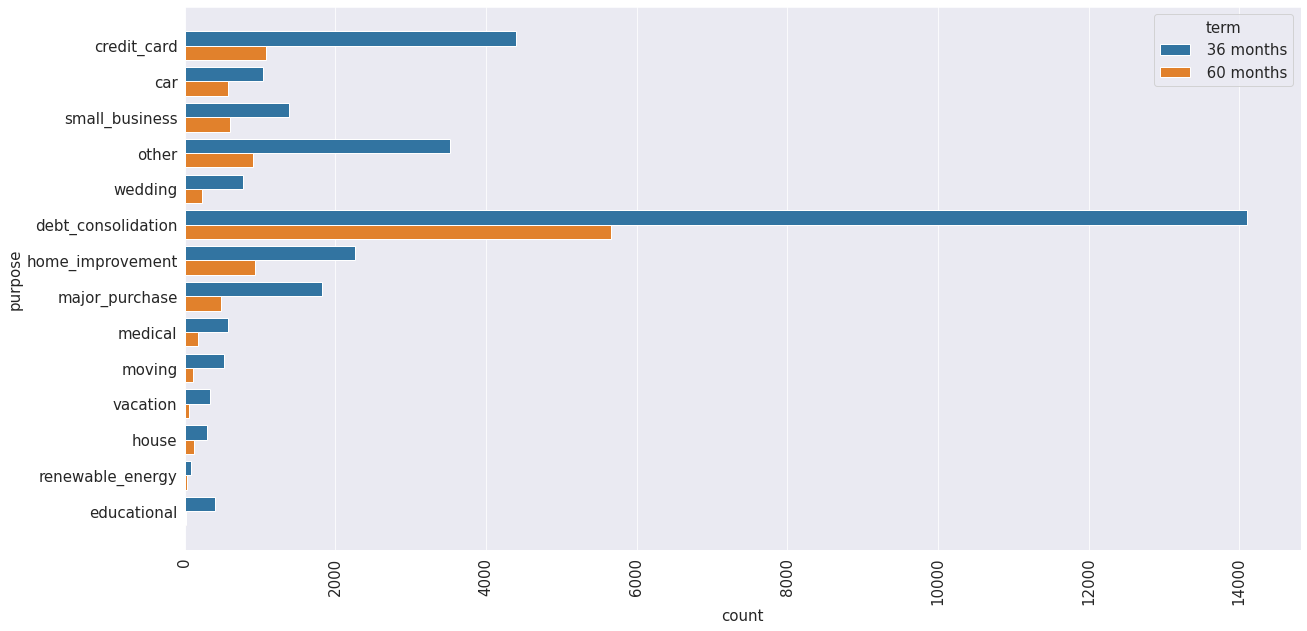

In [132]:
plt.rc('font', size=15)
plt.figure(figsize=(20,10))
sns.countplot(
    y="purpose",
    hue="term",
    data=df_copy
)
plt.xticks(rotation ='vertical')
plt.plot()

In [133]:
df_copy["mort_acc"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: mort_acc, Length: 42535, dtype: float64

In [134]:
df_copy["mort_acc"].isnull().sum()

42535

In [135]:
df_copy["max_bal_bc"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: max_bal_bc, Length: 42535, dtype: float64

In [136]:
df_copy["max_bal_bc"].isnull().sum()

42535

In [137]:
df_copy["last_pymnt_amnt"]

0       171.62000
1       119.66000
2       649.91000
3       357.48000
4        67.79000
           ...   
42530     0.00000
42531    32.41000
42532    82.03000
42533   205.32000
42534   156.39000
Name: last_pymnt_amnt, Length: 42535, dtype: float64

In [138]:
df_copy["last_pymnt_amnt"].isnull().sum()

0

In [139]:
df_copy["last_pymnt_amnt"].describe()

count   42535.00000
mean     2612.72010
std      4385.19894
min         0.00000
25%       211.37000
50%       527.93000
75%      3170.22000
max     36115.20000
Name: last_pymnt_amnt, dtype: float64

[]

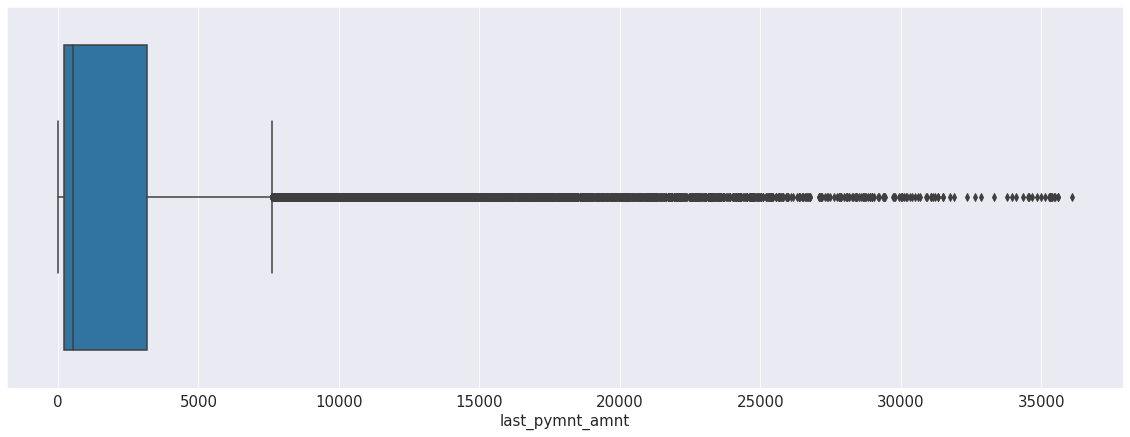

In [140]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="last_pymnt_amnt",
    data = df_copy
)
plt.plot()

In [141]:
df_copy["last_pymnt_d"] # TODO : delete this after creating separate columns for month and year

0        Jan-2015
1        Apr-2013
2        Jun-2014
3        Jan-2015
4        Sep-2016
           ...   
42530    Mar-2008
42531    Jun-2010
42532    Jun-2010
42533    Jun-2010
42534    Jun-2010
Name: last_pymnt_d, Length: 42535, dtype: object

In [142]:
df_copy["last_pymnt_d"].isnull().sum()

83

In [143]:
df_copy[df_copy["last_pymnt_d"].isnull()]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
26     1069800    1304679      15000        15000       8725.00000   
2731   1032519    1262161       8000         8000       3975.00000   
3625   1016039    1243723       6400         6400       6400.00000   
3998   1009833    1236591      18000        18000      18000.00000   
4220   1006579    1232989       1800         1800       1800.00000   
...        ...        ...        ...          ...              ...   
40914   451575     556469      24000        24000      23075.00000   
40927   449262     551756      25000        25000      23225.00000   
41145   409248     459852       4600         4600       4600.00000   
41887   271819     271796       3200         3200       2875.00000   
41931   263711     263700       3000         3000       3000.00000   

             term  int_rate  installment grade sub_grade  ...  \
26      36 months  14.27000    514.64000     C        C2  ...   
2731    36 months  14.65000    275.96000     C        C3  ...   
3625    60 months  18.25000    163.39000     D        D5  ...   
3998    60 months  19.03000    467.23000     E        E2  ...   
4220    36 months   8.90000     57.16000     A        A5  ...   
...           ...       ...          ...   ...       ...  ...   
40914   36 months  14.26000    823.34000     C        C5  ...   
40927   36 months  13.92000    853.43000     C        C4  ...   
41145   36 months  15.68000    161.01000     E        E1  ...   
41887   36 months  16.71000    113.63000     F        F4  ...   
41931   36 months  10.71000     97.81000     B        B5  ...   

      num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
26                   NaN                NaN            NaN               NaN   
2731                 NaN                NaN            NaN               NaN   
3625                 NaN                NaN            NaN               NaN   
3998                 NaN                NaN            NaN               NaN   
4220                 NaN                NaN            NaN               NaN   
...                  ...                ...            ...               ...   
40914                NaN                NaN            NaN               NaN   
40927                NaN                NaN            NaN               NaN   
41145                NaN                NaN            NaN               NaN   
41887                NaN                NaN            NaN               NaN   
41931                NaN                NaN            NaN               NaN   

      pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort  \
26                 0.00000   0.00000             NaN               NaN   
2731               0.00000   0.00000             NaN               NaN   
3625               0.00000   0.00000             NaN               NaN   
3998               0.00000   0.00000             NaN               NaN   
4220               0.00000   0.00000             NaN               NaN   
...                    ...       ...             ...               ...   
40914              0.00000   0.00000             NaN               NaN   
40927              0.00000   0.00000             NaN               NaN   
41145              1.00000   0.00000             NaN               NaN   
41887                  NaN   0.00000             NaN               NaN   
41931                  NaN   0.00000             NaN               NaN   

      total_bc_limit total_il_high_credit_limit  
26               NaN                        NaN  
2731             NaN                        NaN  
3625             NaN                        NaN  
3998             NaN                        NaN  
4220             NaN                        NaN  
...              ...                        ...  
40914            NaN                        NaN  
40927            NaN                        NaN  
41145            NaN                        NaN  
41887            NaN                    

In [144]:
df_copy["last_pymnt_d"] = pd.to_datetime(df_copy["last_pymnt_d"])

In [145]:
df_copy["last_pymnt_d"]

0       2015-01-01
1       2013-04-01
2       2014-06-01
3       2015-01-01
4       2016-09-01
           ...    
42530   2008-03-01
42531   2010-06-01
42532   2010-06-01
42533   2010-06-01
42534   2010-06-01
Name: last_pymnt_d, Length: 42535, dtype: datetime64[ns]

In [146]:
df_copy["last_pymnt_d"].isnull().sum()

83

In [147]:
df_copy["last_pymnt_month"] = pd.DatetimeIndex(df_copy["last_pymnt_d"]).month

In [148]:
df_copy["last_pymnt_year"] = pd.DatetimeIndex(df_copy["last_pymnt_d"]).year

In [149]:
df_copy[["last_pymnt_month","last_pymnt_year"]]

last_pymnt_month  last_pymnt_year
0               1.00000       2015.00000
1               4.00000       2013.00000
2               6.00000       2014.00000
3               1.00000       2015.00000
4               9.00000       2016.00000
...                 ...              ...
42530           3.00000       2008.00000
42531           6.00000       2010.00000
42532           6.00000       2010.00000
42533           6.00000       2010.00000
42534           6.00000       2010.00000

[42535 rows x 2 columns]

[]

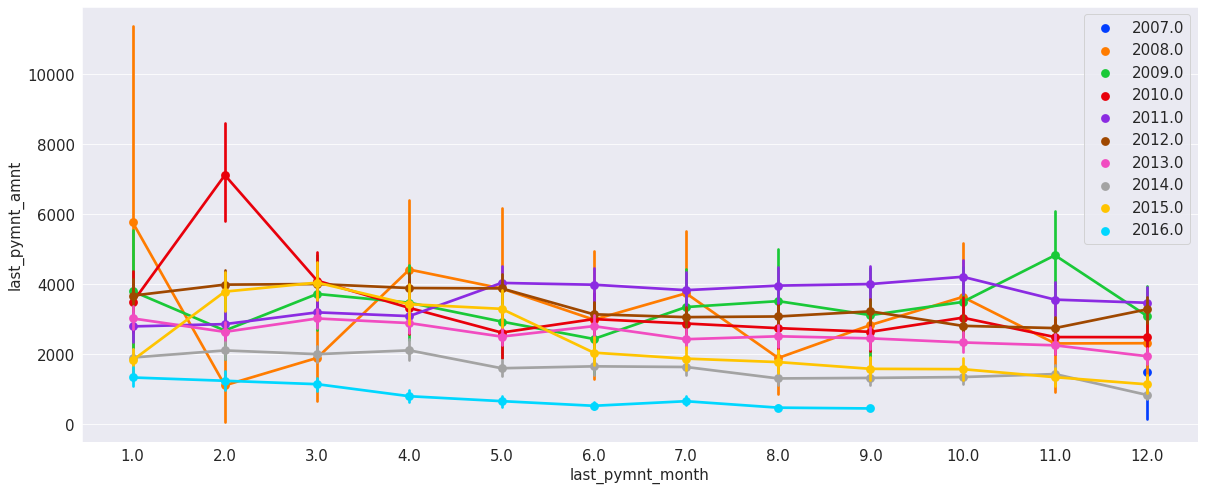

In [150]:
plt.figure(figsize=(20,8))
sns.pointplot(
    x="last_pymnt_month",
    y="last_pymnt_amnt",
    hue="last_pymnt_year",
    data=df_copy,
    palette="bright"
)
plt.legend(loc="upper right")
plt.plot()

[]

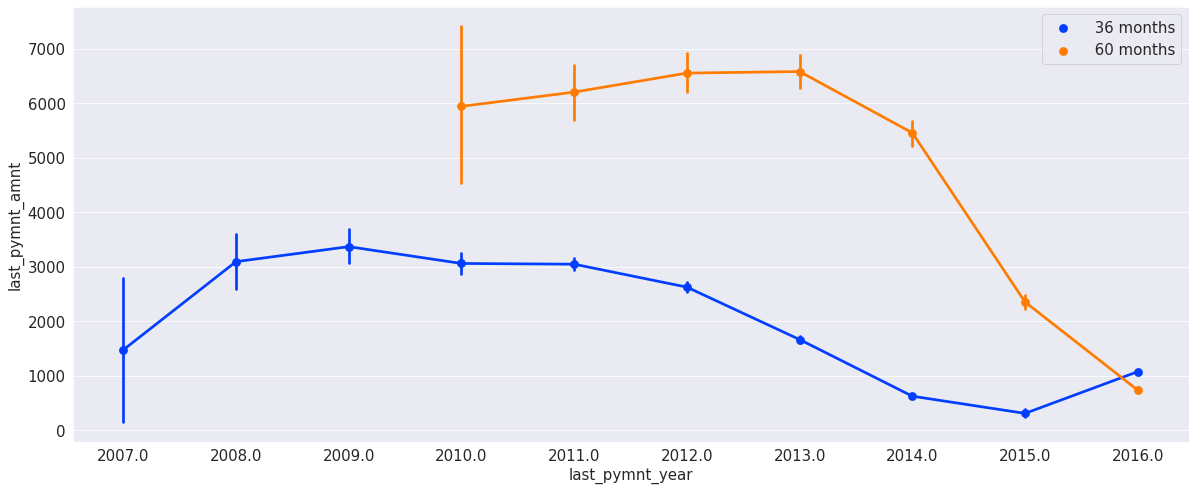

In [151]:
plt.figure(figsize=(20,8))
sns.pointplot(
    x="last_pymnt_year",
    y="last_pymnt_amnt",
    hue="term",
    data=df_copy,
    palette="bright"
)
plt.legend(loc="upper right")
plt.plot()

[]

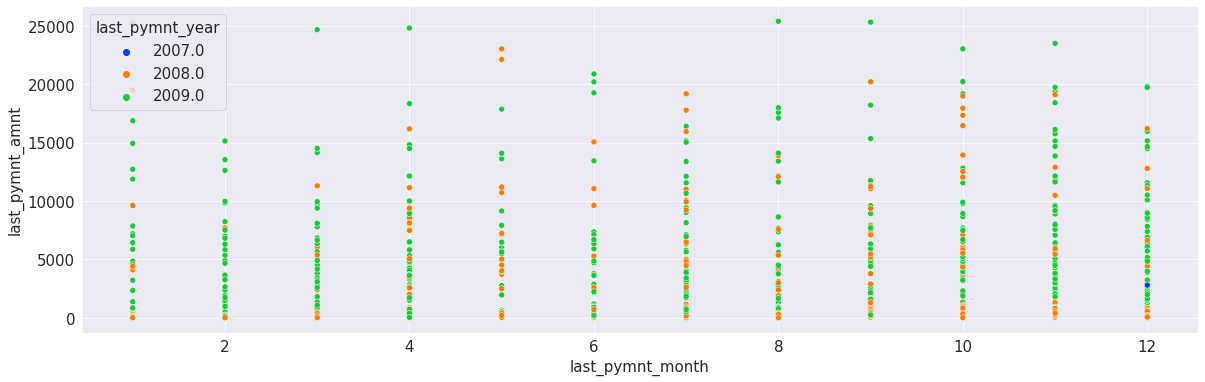

In [152]:
plt.figure(figsize=(20,6))
sns.scatterplot(
    x="last_pymnt_month",
    y="last_pymnt_amnt",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2007,2008,2009])],
    palette="bright"
)
plt.plot()

[]

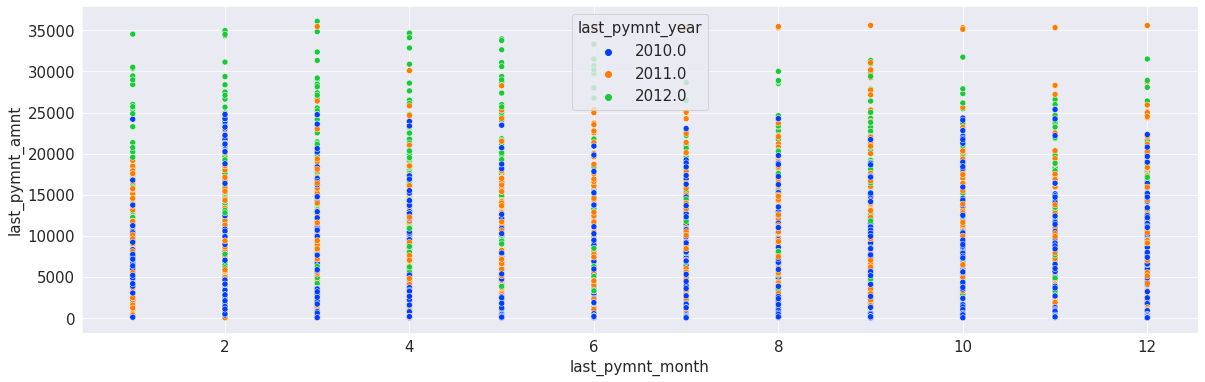

In [153]:
plt.figure(figsize=(20,6))
sns.scatterplot(
    x="last_pymnt_month",
    y="last_pymnt_amnt",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2010,2011,2012])],
    palette="bright"
)
plt.plot()

[]

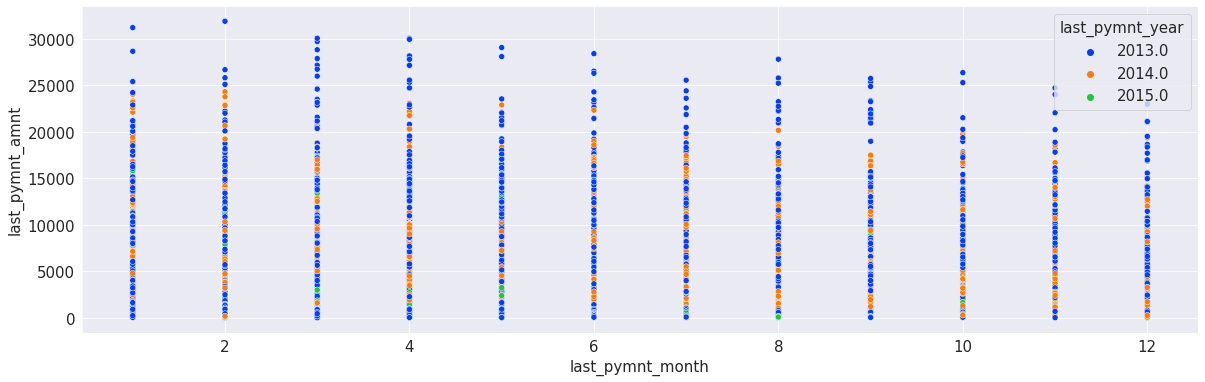

In [154]:
plt.figure(figsize=(20,6))
sns.scatterplot(
    x="last_pymnt_month",
    y="last_pymnt_amnt",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2013,2014,2015])],
    palette="bright"
)
plt.plot()

[]

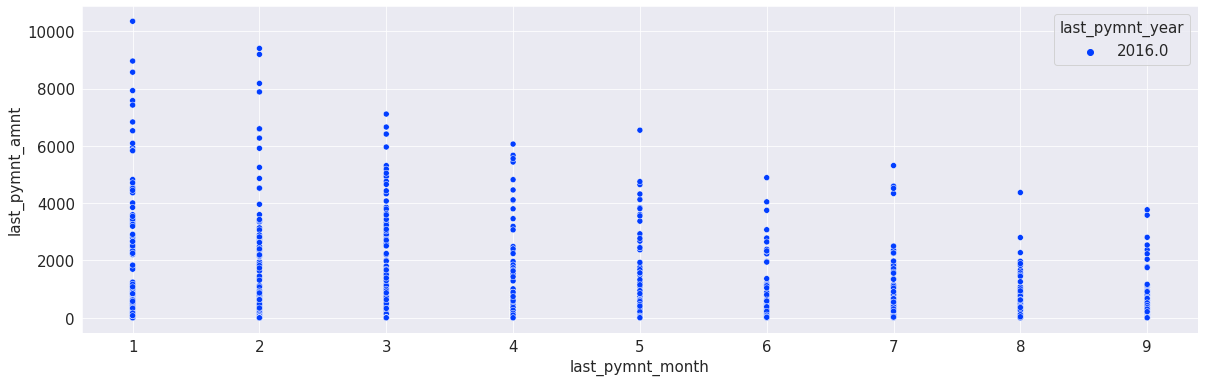

In [155]:
plt.figure(figsize=(20,6))
sns.scatterplot(
    x="last_pymnt_month",
    y="last_pymnt_amnt",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2016,2018])],
    palette="bright"
)
plt.plot()

In [156]:
df_copy["issue_d"] # TODO : delete this after creating separate columns for month and year

0        Dec-2011
1        Dec-2011
2        Dec-2011
3        Dec-2011
4        Dec-2011
           ...   
42530    Jun-2007
42531    Jun-2007
42532    Jun-2007
42533    Jun-2007
42534    Jun-2007
Name: issue_d, Length: 42535, dtype: object

In [157]:
df_copy["issue_d"].isnull().sum()

0

In [158]:
# converting to datetime

df_copy["issue_d"] = pd.to_datetime(df_copy["issue_d"])


In [159]:
df_copy["issue_d"]

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
4       2011-12-01
           ...    
42530   2007-06-01
42531   2007-06-01
42532   2007-06-01
42533   2007-06-01
42534   2007-06-01
Name: issue_d, Length: 42535, dtype: datetime64[ns]

In [160]:
df_copy["issue_year"] = pd.DatetimeIndex(df_copy["issue_d"]).year

In [161]:
df_copy["issue_month"] = pd.DatetimeIndex(df_copy["issue_d"]).month

In [162]:
df_copy[["issue_month","issue_year"]]

issue_month  issue_year
0               12        2011
1               12        2011
2               12        2011
3               12        2011
4               12        2011
...            ...         ...
42530            6        2007
42531            6        2007
42532            6        2007
42533            6        2007
42534            6        2007

[42535 rows x 2 columns]

[]

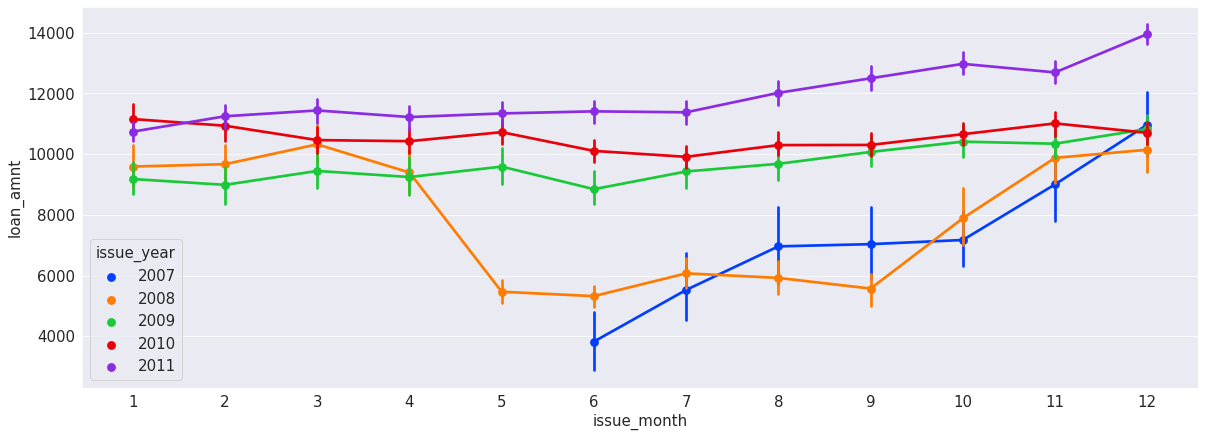

In [163]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="issue_month",
    y="loan_amnt",
    hue="issue_year",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

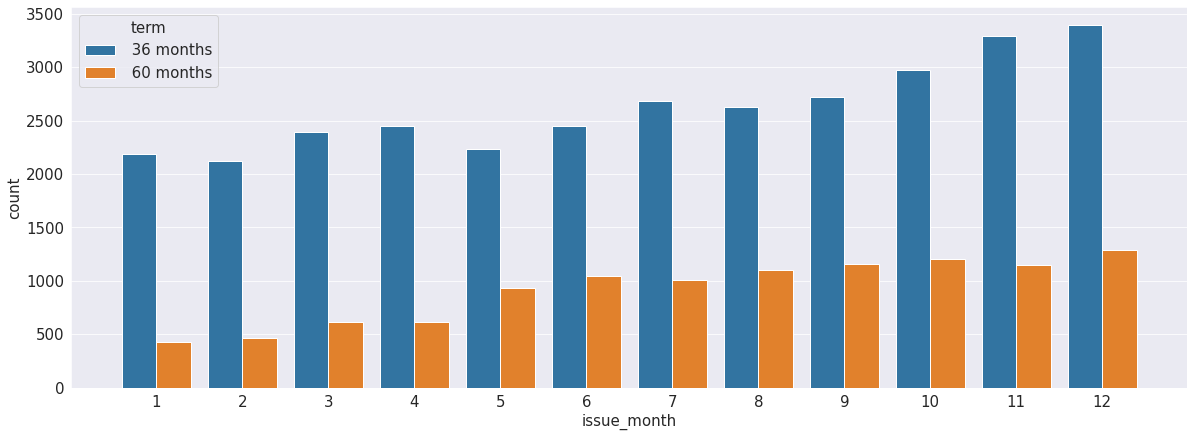

In [164]:
plt.figure(figsize=(20,7))
sns.countplot(
    x="issue_month",
    hue="term",
    data=df_copy
)
plt.plot()

In [165]:
df_copy["issue_year"].max()

2011

[]

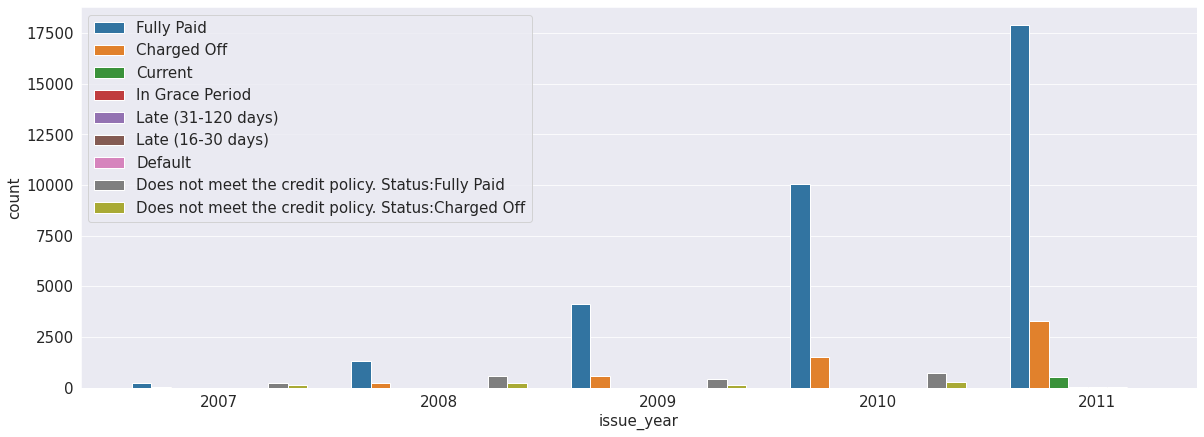

In [166]:
plt.figure(figsize=(20,7))
sns.countplot(
    x="issue_year",
    hue="loan_status",
    data=df_copy
)
plt.legend(loc="upper left")
plt.plot()

[]

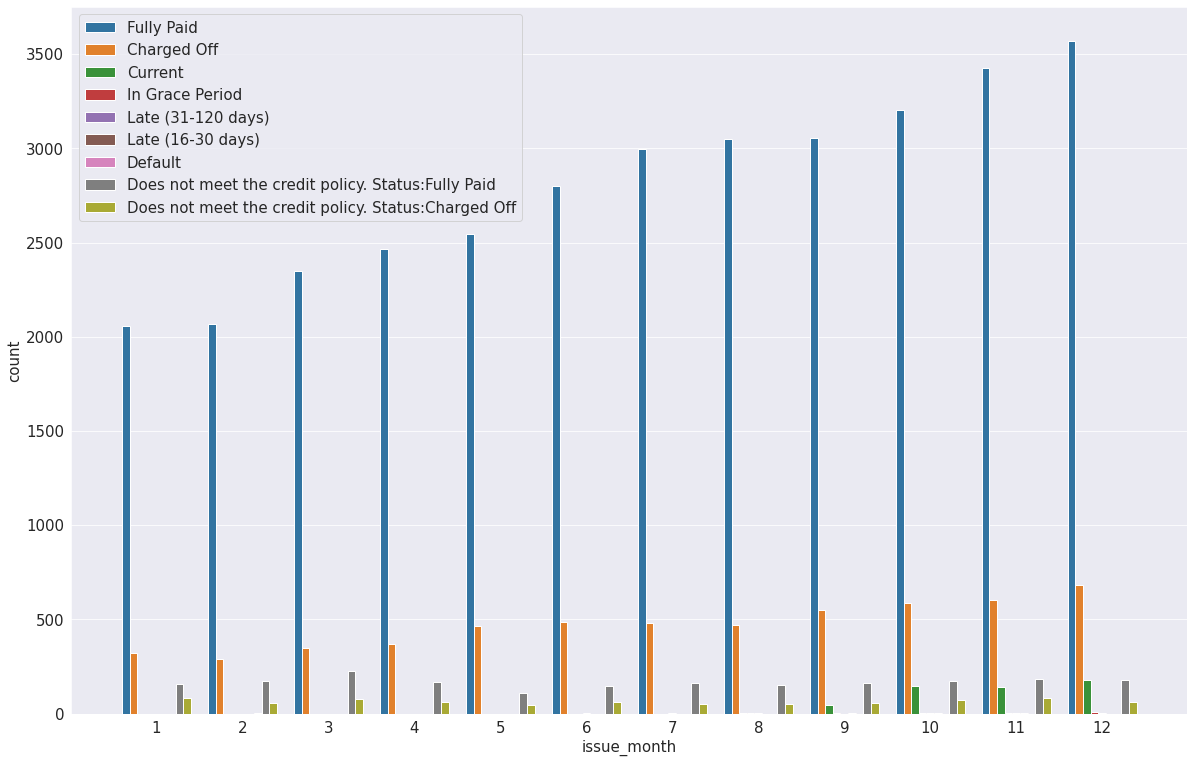

In [167]:
plt.figure(figsize=(20,13))
sns.countplot(
    x="issue_month",
    hue="loan_status",
    data=df_copy
)
plt.legend(loc="upper left")
plt.plot()

[]

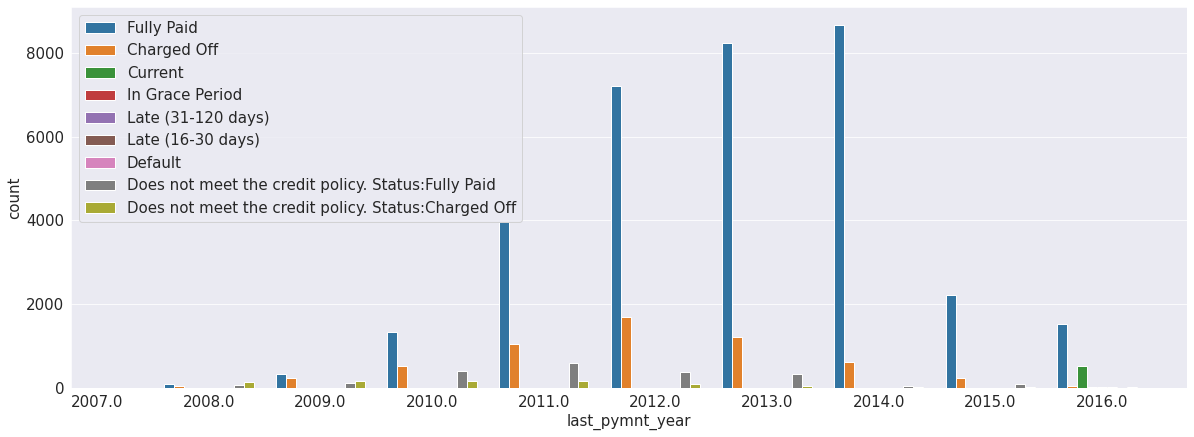

In [168]:
plt.figure(figsize=(20,7))
sns.countplot(
    x="last_pymnt_year",
    hue="loan_status",
    data=df_copy
)
plt.legend(loc="upper left")
plt.plot()

[]

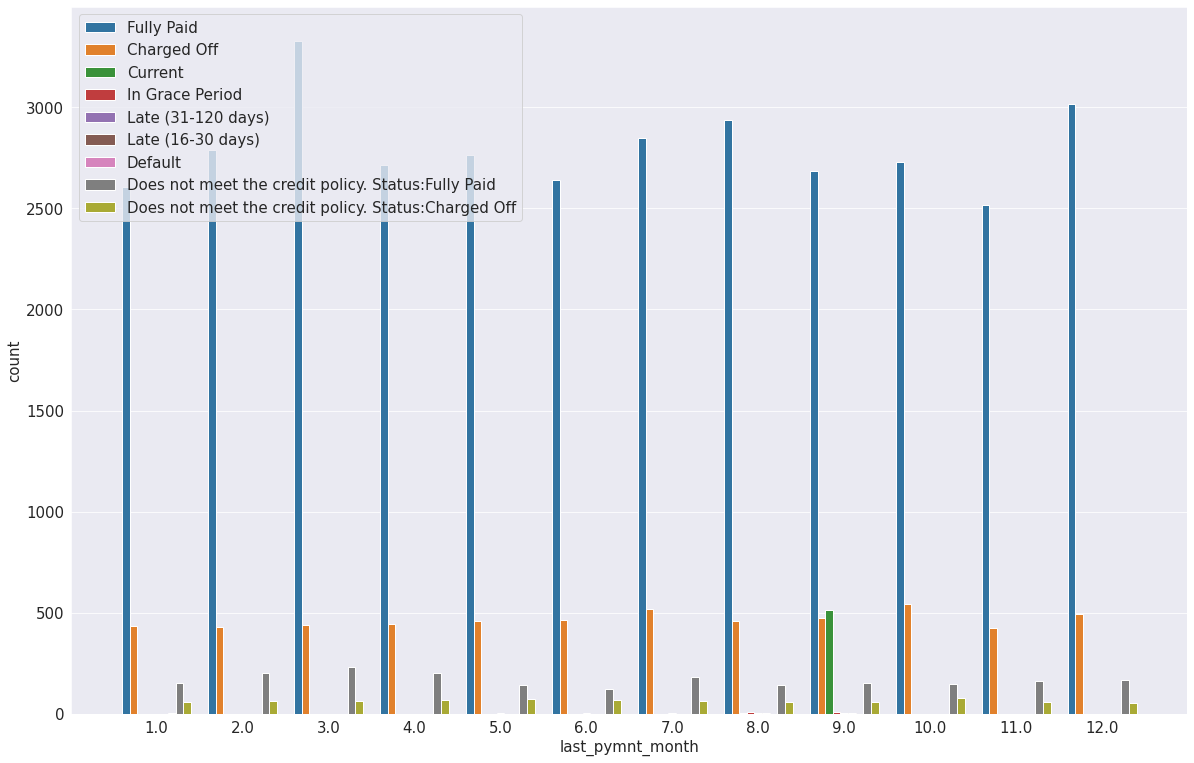

In [169]:
plt.figure(figsize=(20,13))
sns.countplot(
    x="last_pymnt_month",
    hue="loan_status",
    data=df_copy
)
plt.legend(loc="upper left")
plt.plot()

[]

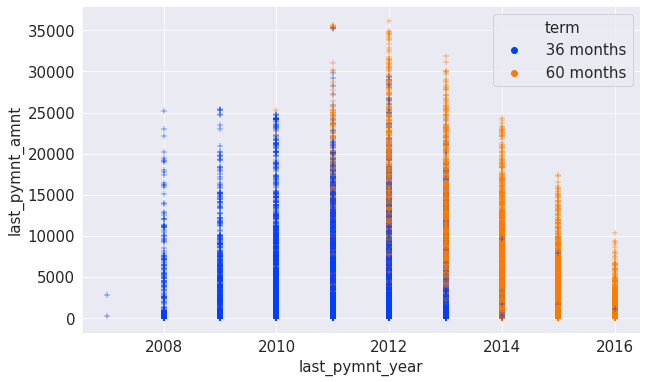

In [170]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="last_pymnt_year",
    y="last_pymnt_amnt",
    hue="term",
    data=df_copy,
    palette="bright",
    marker="+"
)
plt.plot()

[]

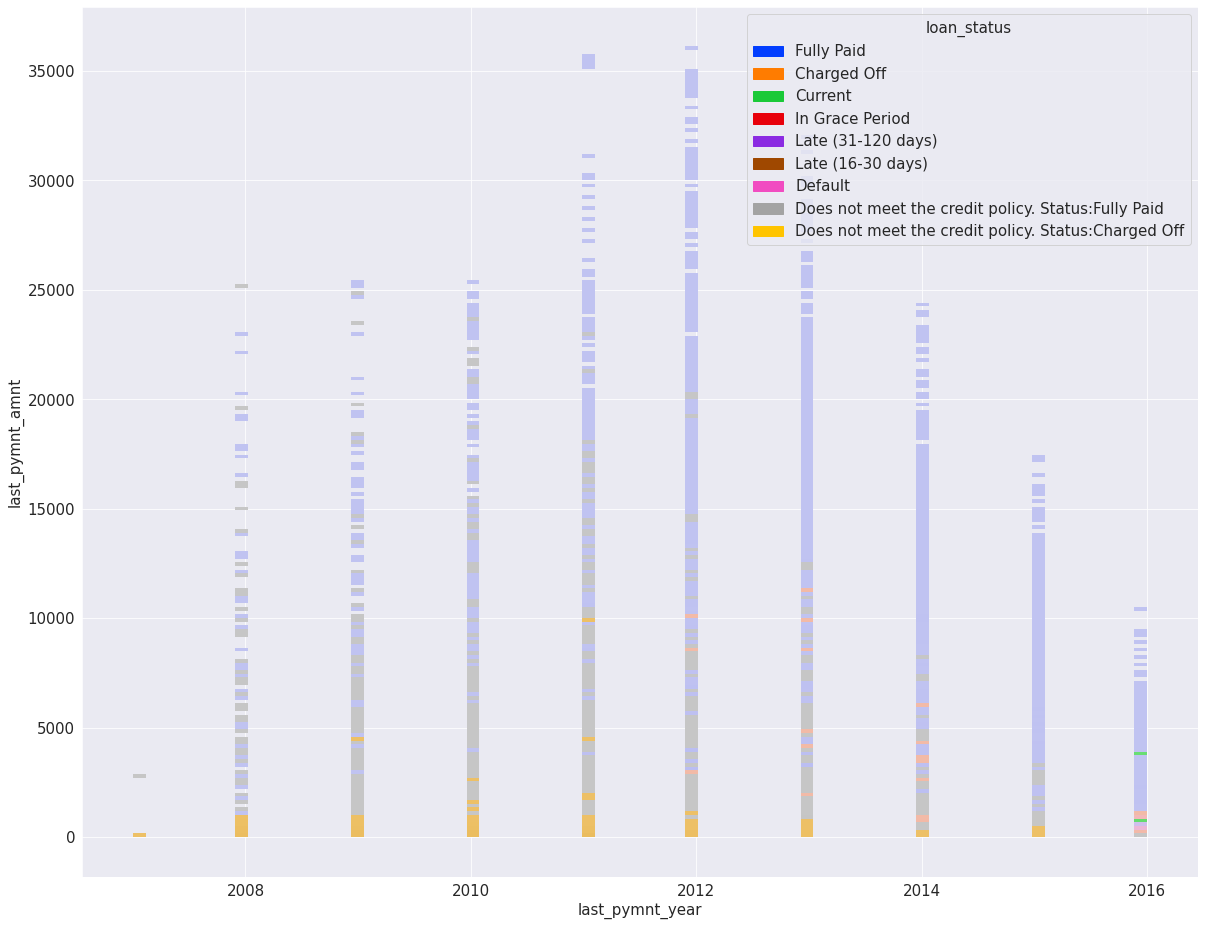

In [171]:
plt.figure(figsize=(20,16))
sns.histplot(
    x="last_pymnt_year",
    y="last_pymnt_amnt",
    hue="loan_status",
    data=df_copy,
    palette="bright",
    multiple="stack",
#     kde=True
)
plt.plot()

In [172]:
df_copy["total_rev_hi_lim"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_rev_hi_lim, Length: 42535, dtype: float64

In [173]:
df_copy["total_rev_hi_lim"].isnull().sum() # TODO : delete this column

42535

In [174]:
df_copy["total_rec_int"]

0        863.16000
1        435.17000
2        605.67000
3       2214.92000
4       1055.27000
           ...    
42530    219.43000
42531    155.60000
42532    379.50000
42533    873.90000
42534    619.76000
Name: total_rec_int, Length: 42535, dtype: float64

In [175]:
df_copy["total_rec_int"].isnull().sum()

0

In [176]:
df_copy["total_rec_int"].describe()

count   42535.00000
mean     2239.54709
std      2583.72210
min         0.00000
25%       657.10000
50%      1339.16000
75%      2802.95000
max     23823.75000
Name: total_rec_int, dtype: float64

[]

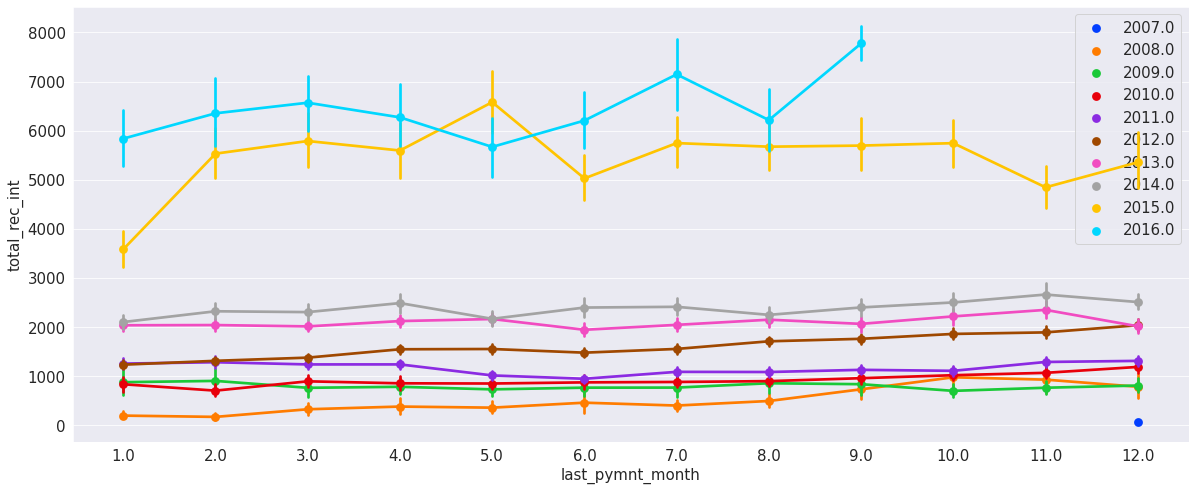

In [177]:
plt.figure(figsize=(20,8))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_int",
    hue="last_pymnt_year",
    data=df_copy,
    palette="bright"
)
plt.legend(loc="upper right")
plt.plot()

[]

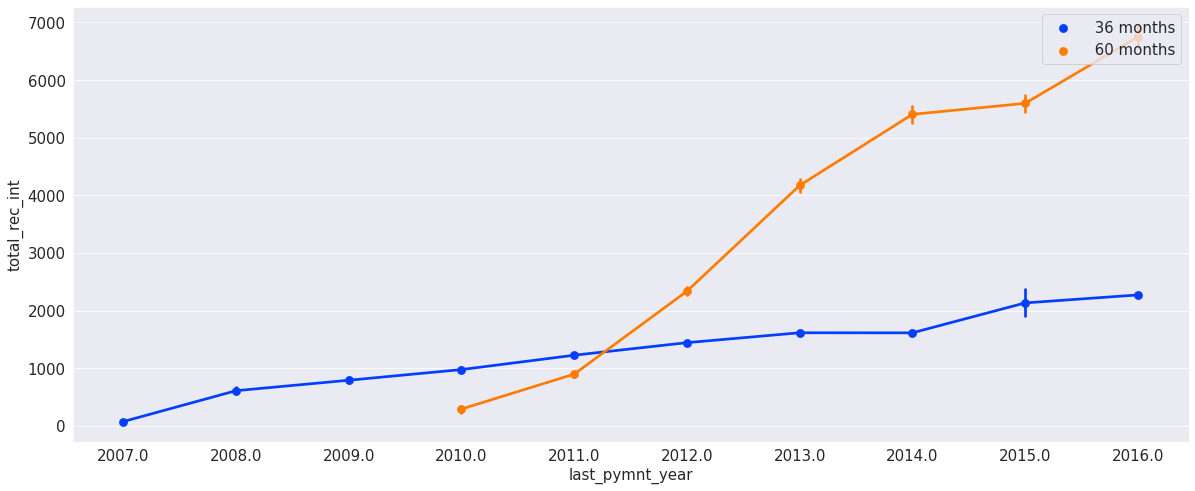

In [178]:
plt.figure(figsize=(20,8))
sns.pointplot(
    x="last_pymnt_year",
    y="total_rec_int",
    hue="term",
    data=df_copy,
    palette="bright"
)
plt.legend(loc="upper right")
plt.plot()

[]

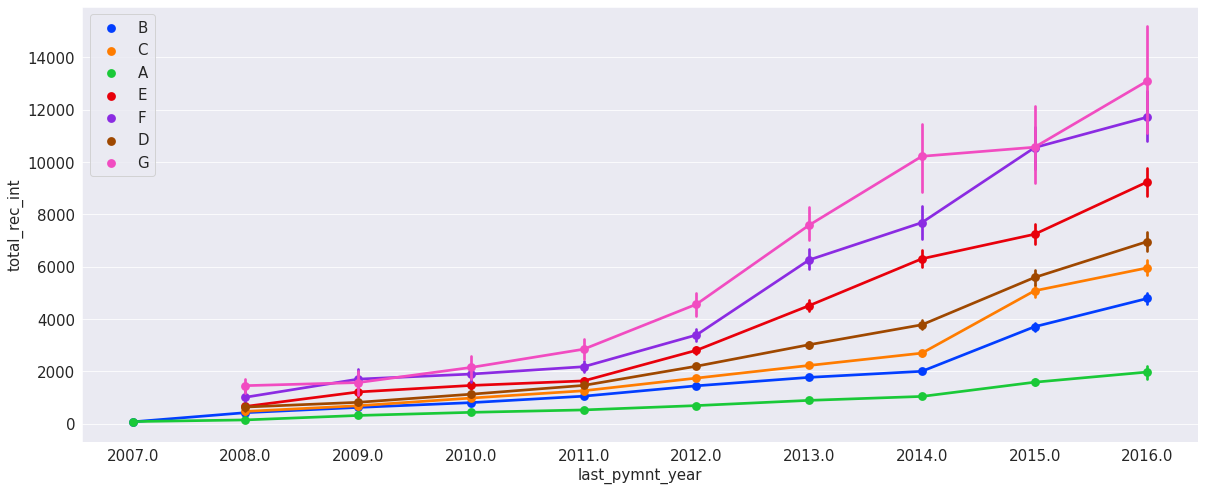

In [179]:
plt.figure(figsize=(20,8))
sns.pointplot(
    x="last_pymnt_year",
    y="total_rec_int",
    hue="grade",
    data=df_copy,
    palette="bright"
)
plt.legend(loc="upper left")
plt.plot()

[]

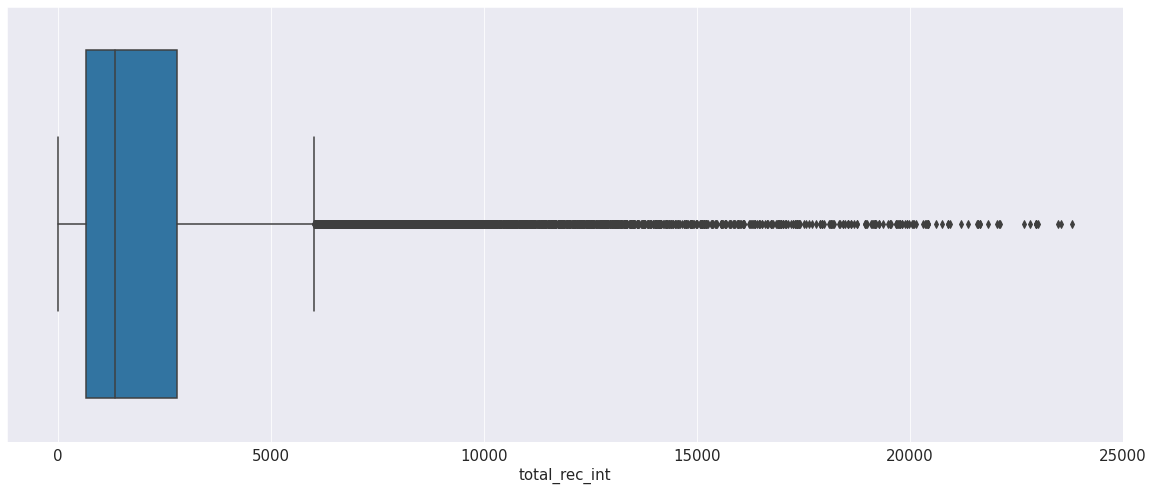

In [180]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.boxplot(
    x="total_rec_int",
    data=df_copy
)
plt.plot()

[]

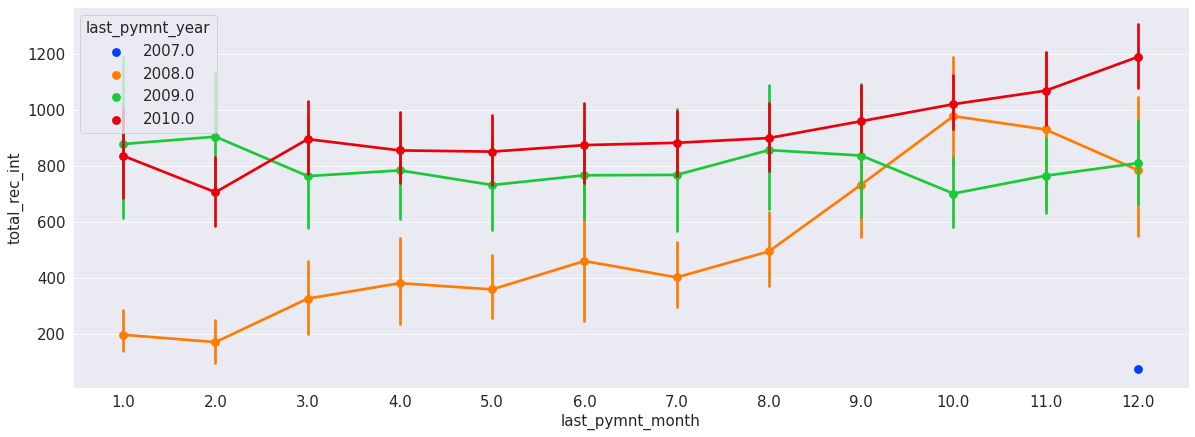

In [181]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_int",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2007,2008,2009,2010])],
    palette="bright",
)
plt.plot()

[]

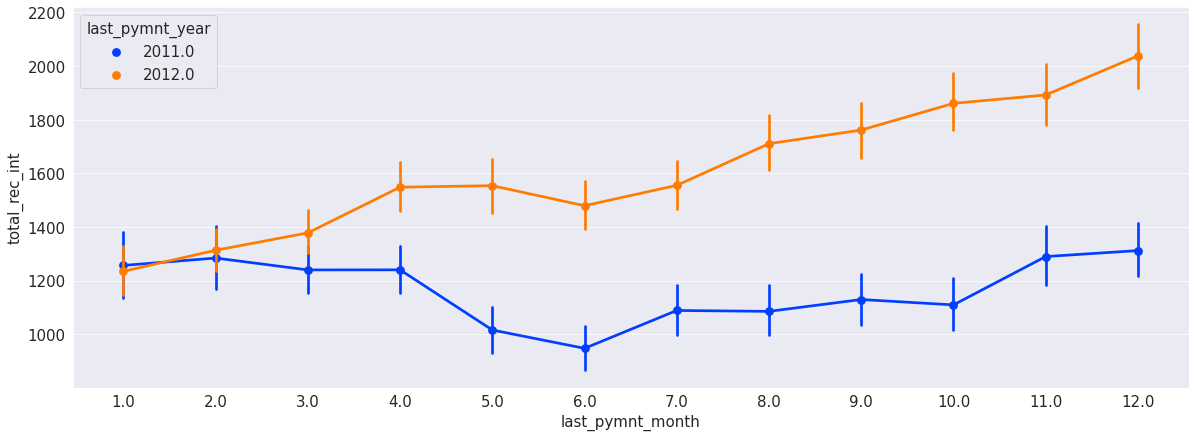

In [182]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_int",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2011,2012,20013])],
    palette="bright",
)
plt.plot()

[]

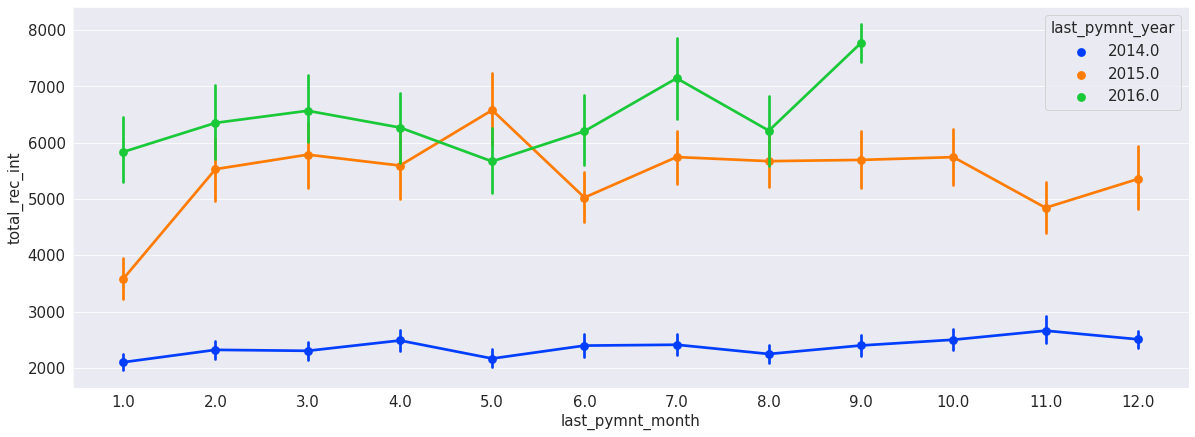

In [183]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_int",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2014,2015,2016])],
    palette="bright",
)
plt.plot()

[]

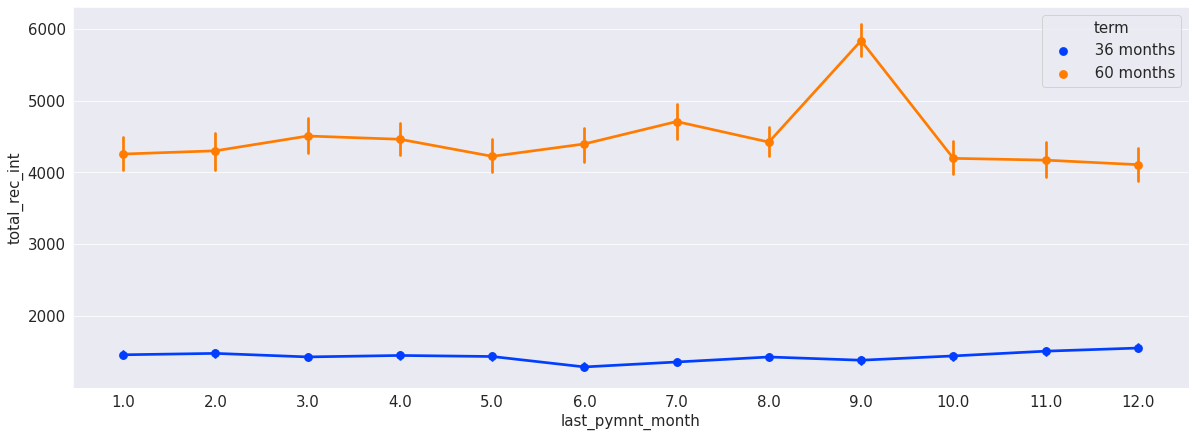

In [184]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_int",
    hue="term",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

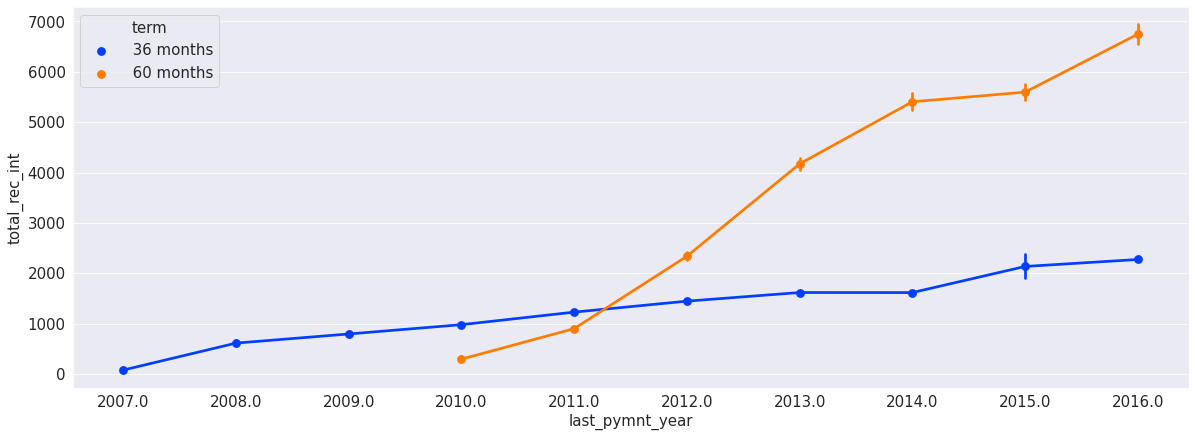

In [185]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_year",
    y="total_rec_int",
    hue="term",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

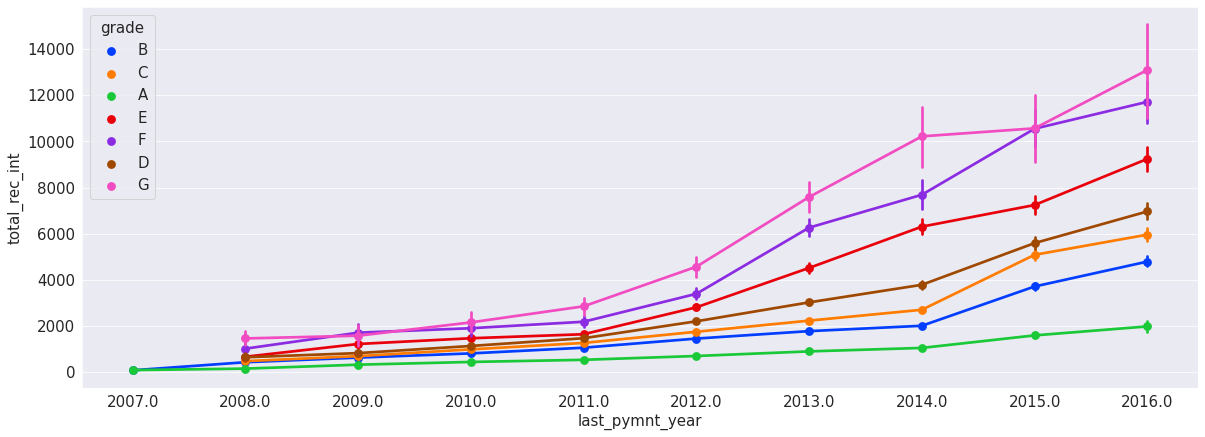

In [186]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_year",
    y="total_rec_int",
    hue="grade",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

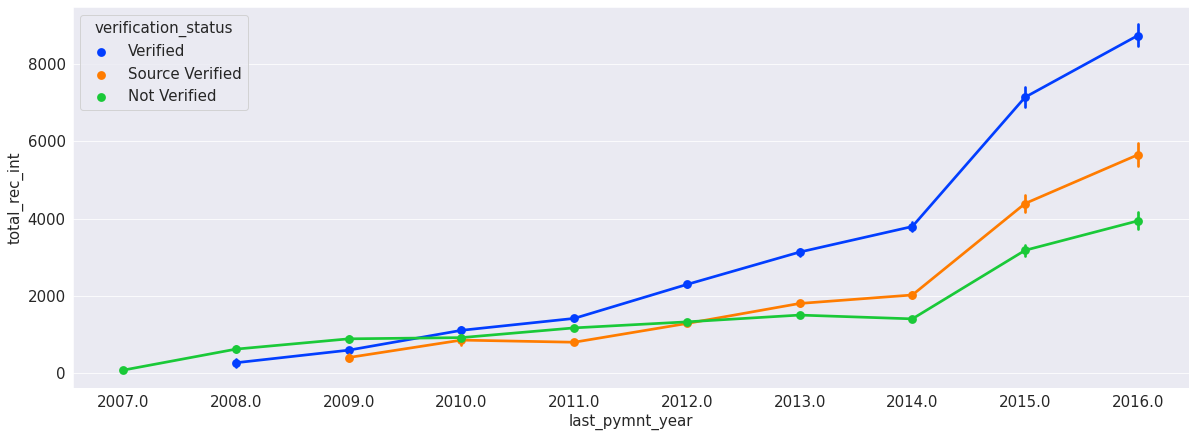

In [187]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_year",
    y="total_rec_int",
    hue="verification_status",
    data=df_copy,
    palette="bright"
)
plt.plot()

[]

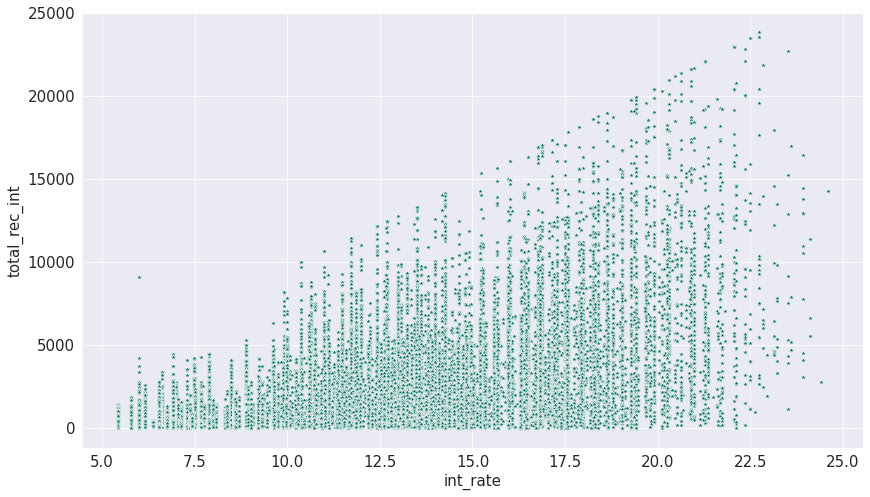

In [188]:
plt.rc('font', size=15)
plt.figure(figsize=(14,8))
sns.scatterplot(
    y="total_rec_int",
    x="int_rate",
    data=df_copy,
    marker="*",
    color="#00695C"
)
plt.plot()

[]

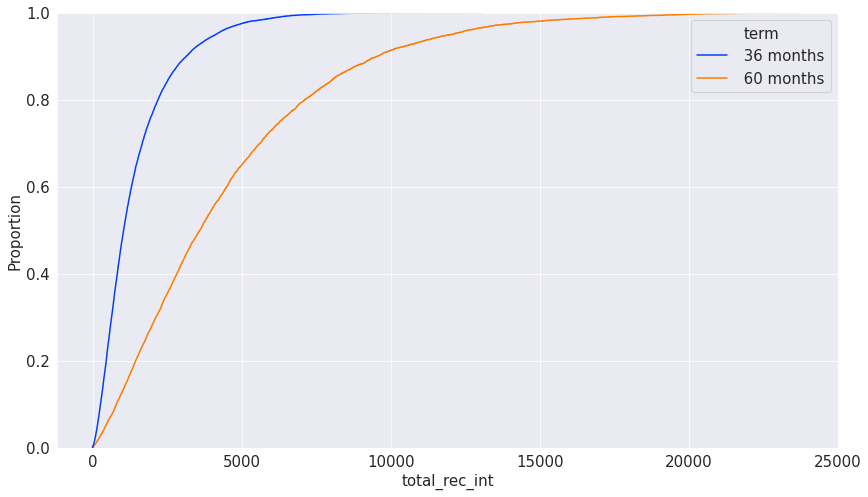

In [189]:
plt.rc('font', size=15)
plt.figure(figsize=(14,8))
sns.ecdfplot(
    x="total_rec_int",
    hue="term",
    data=df_copy,
    palette="bright"
)
# plt.axhline(0.6,color="#9575CD")
plt.plot()

In [190]:
df_copy["total_rec_prncp"]

0        5000.00000
1         456.46000
2        2400.00000
3       10000.00000
4        2729.22000
            ...    
42530    3500.00000
42531    1000.00000
42532    2525.00000
42533    6500.00000
42534    5000.00000
Name: total_rec_prncp, Length: 42535, dtype: float64

In [191]:
df_copy["total_rec_prncp"].describe()

count   42535.00000
mean     9664.27135
std      7087.46938
min         0.00000
25%      4400.00000
50%      8000.00000
75%     13425.00000
max     35000.02000
Name: total_rec_prncp, dtype: float64

In [192]:
df_copy["total_rec_prncp"].isnull().sum()

0

[]

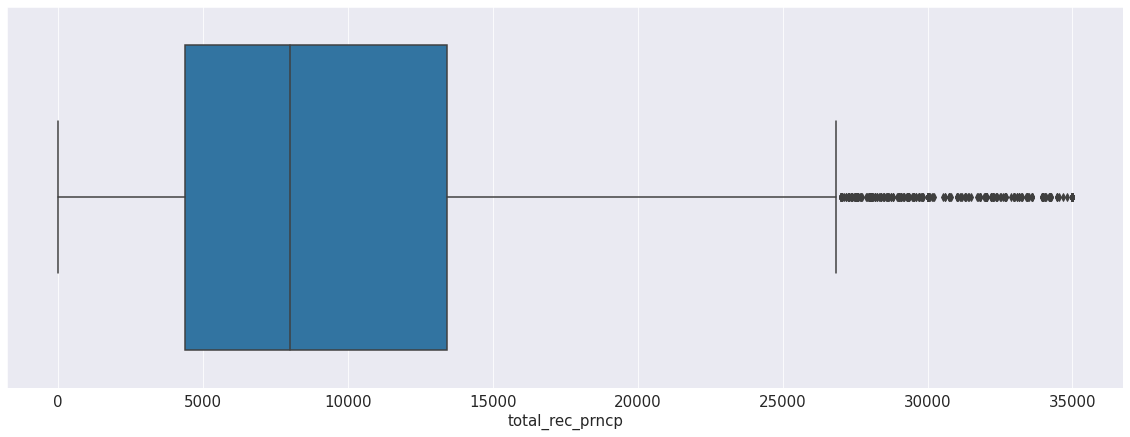

In [193]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="total_rec_prncp",
    data=df_copy
)
plt.plot()

[]

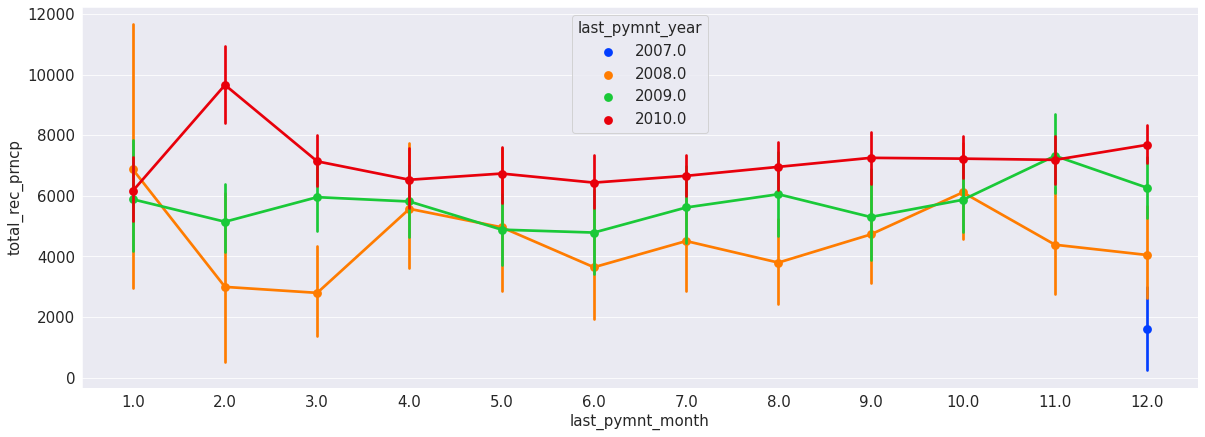

In [194]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_prncp",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2007,2008,2009,2010])],
    palette="bright"
)
plt.plot()

[]

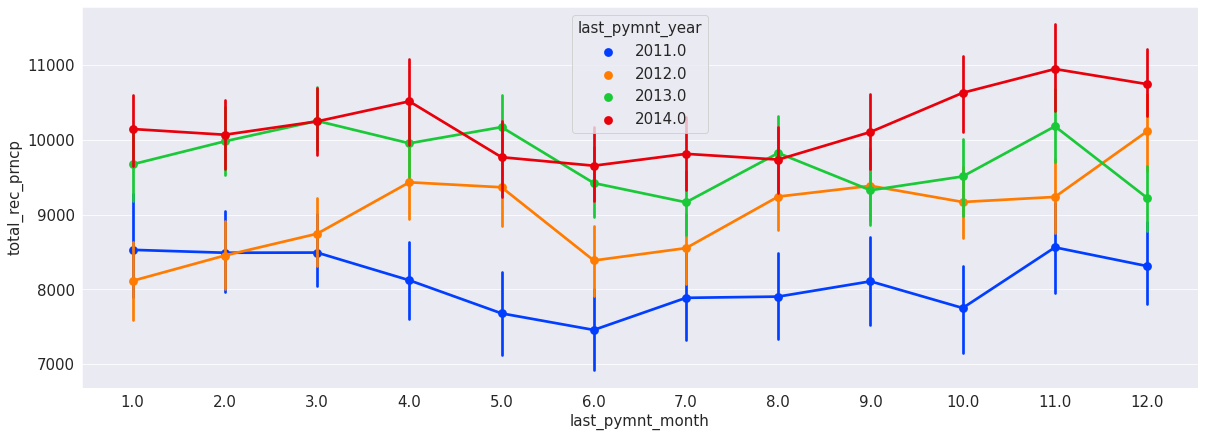

In [195]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_prncp",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2011,2012,2013,2014])],
    palette="bright",
)
plt.plot()

[]

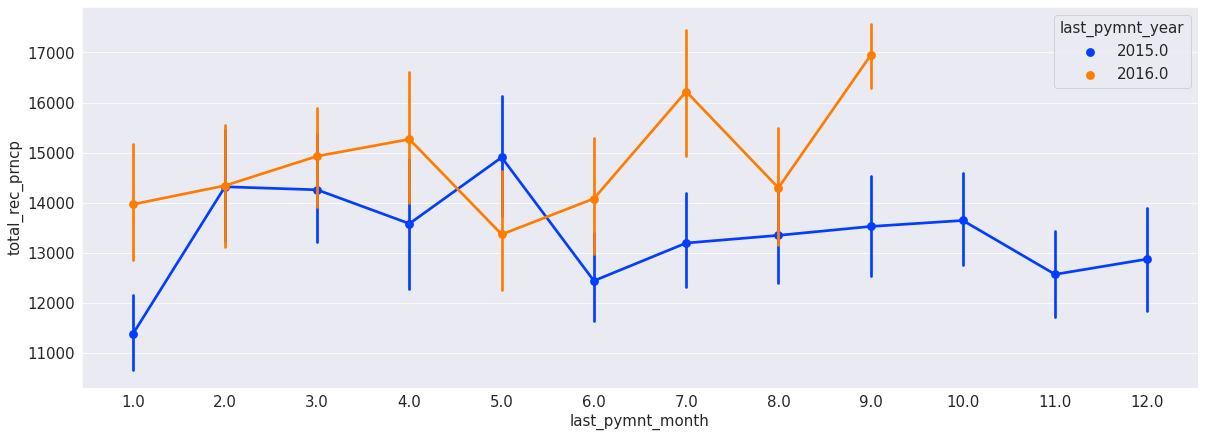

In [196]:
plt.figure(figsize=(20,7))
sns.pointplot(
    x="last_pymnt_month",
    y="total_rec_prncp",
    hue="last_pymnt_year",
    data=df_copy[df_copy["last_pymnt_year"].isin([2015,2016])],
    palette="bright",
)
plt.plot()

In [197]:
df_copy["total_cu_tl"].isnull().sum()

42535

In [198]:
df_copy["total_cu_tl"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_cu_tl, Length: 42535, dtype: float64

In [199]:
df_copy["total_bal_ex_mort"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_bal_ex_mort, Length: 42535, dtype: float64

In [200]:
df_copy["total_bal_ex_mort"].isnull().sum()

42535

In [201]:
df_copy["tot_hi_cred_lim"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: tot_hi_cred_lim, Length: 42535, dtype: float64

In [202]:
df_copy["tot_hi_cred_lim"].isnull().sum()

42535

In [203]:
df_copy["sub_grade"]

0        B2
1        C4
2        C5
3        C1
4        B5
         ..
42530    C1
42531    B4
42532    B3
42533    A5
42534    A3
Name: sub_grade, Length: 42535, dtype: object

In [204]:
df_copy["sub_grade"].value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

[]

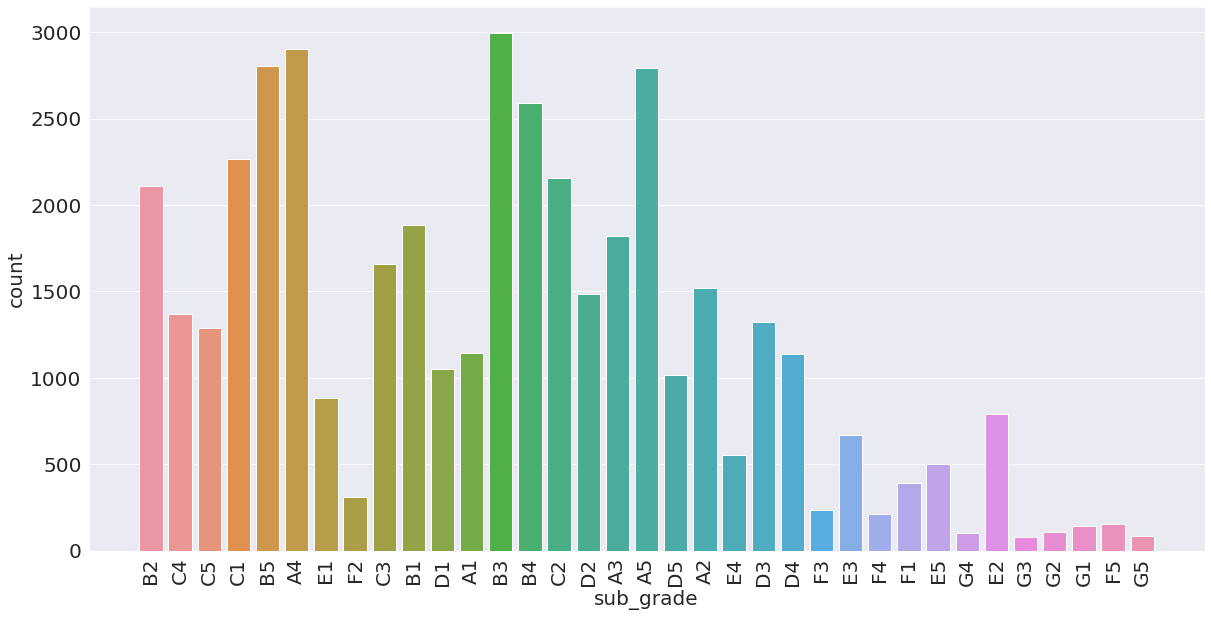

In [205]:
plt.rc('font', size=20) #controls default text size
plt.figure(figsize=(20,10))
sns.countplot(
    x="sub_grade",
    data=df_copy
)
plt.xticks(rotation ='vertical')
plt.plot()

In [206]:
df_copy["percent_bc_gt_75"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: percent_bc_gt_75, Length: 42535, dtype: float64

In [207]:
df_copy["percent_bc_gt_75"].isnull().sum()

42535

In [208]:
df_copy["out_prncp"]

0         0.00000
1         0.00000
2         0.00000
3         0.00000
4       270.78000
           ...   
42530     0.00000
42531     0.00000
42532     0.00000
42533     0.00000
42534     0.00000
Name: out_prncp, Length: 42535, dtype: float64

In [209]:
df_copy["out_prncp"].isnull().sum()

0

In [210]:
df_copy["out_prncp"].describe()

count   42535.00000
mean       11.84956
std       125.37656
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      3555.85000
Name: out_prncp, dtype: float64

[]

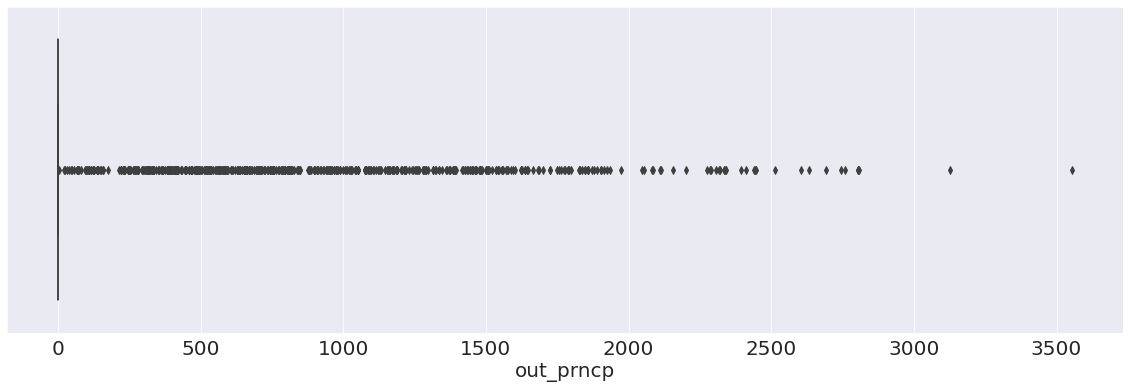

In [211]:
plt.rc('font', size=20)
plt.figure(figsize=(20,6))
sns.boxplot(
    x="out_prncp",
    data=df_copy
)
plt.plot()

In [212]:
df_copy["num_sats"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_sats, Length: 42535, dtype: float64

In [213]:
df_copy["num_sats"].isnull().sum()

42535

In [214]:
df_copy["num_bc_tl"].isnull().sum()

42535

In [215]:
df_copy["num_il_tl"].isnull().sum()

42535

In [216]:
df_copy["num_op_rev_tl"].isnull().sum()

42535

In [217]:
df_copy["num_rev_accts"].isnull().sum()

42535

From the perspective of a credit card company, a particular credit card is said to be delinquent if the customer in question has failed to make their minimum monthly payment for 30 days from their original due date.


In [218]:
df_copy["acc_now_delinq"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: acc_now_delinq, Length: 42535, dtype: float64

In [219]:
df_copy["acc_now_delinq"].isnull().sum()

29

In [220]:
df_copy["acc_now_delinq"].value_counts()

0.00000    42502
1.00000        4
Name: acc_now_delinq, dtype: int64

[]

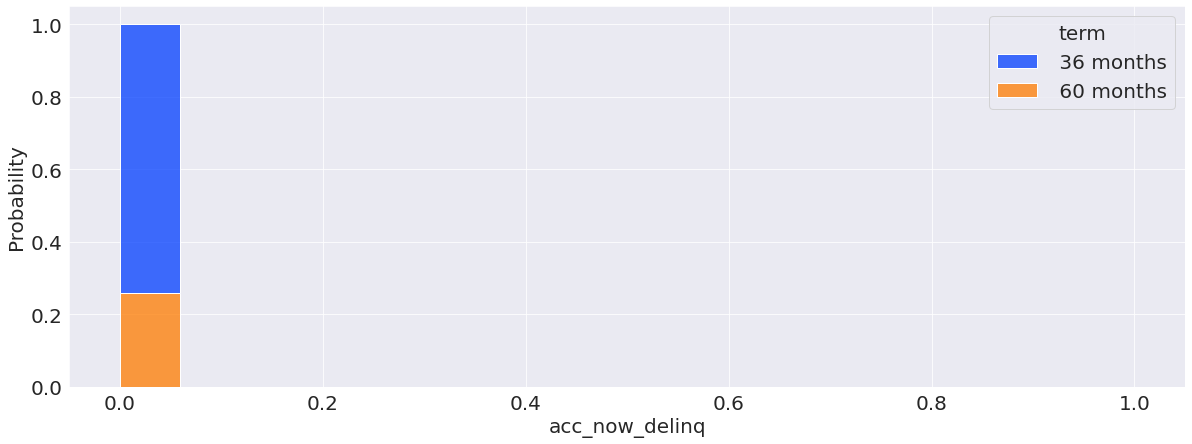

In [221]:
plt.figure(figsize=(20,7))
sns.histplot(
    x="acc_now_delinq",
    hue="term",
    data=df_copy,
    stat="probability",
    palette="bright",
    multiple="stack"
)
plt.plot()

In [222]:
df_copy["addr_state"]

0        AZ
1        GA
2        IL
3        CA
4        OR
         ..
42530    NY
42531    MA
42532    NY
42533    NY
42534    CT
Name: addr_state, Length: 42535, dtype: object

[]

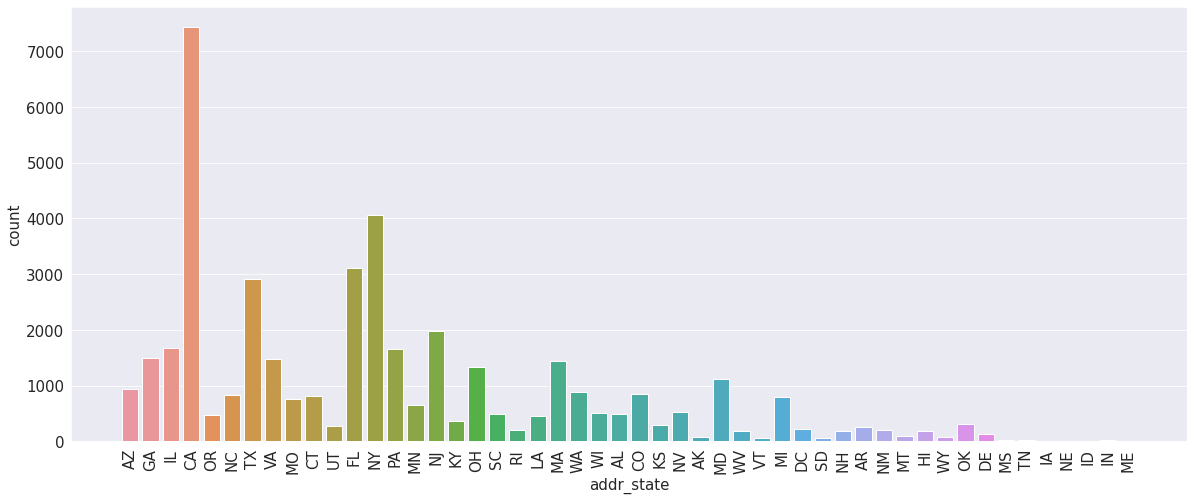

In [223]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.countplot(
    x="addr_state",
    data=df_copy
)
plt.xticks(rotation="vertical")
plt.plot()


[]

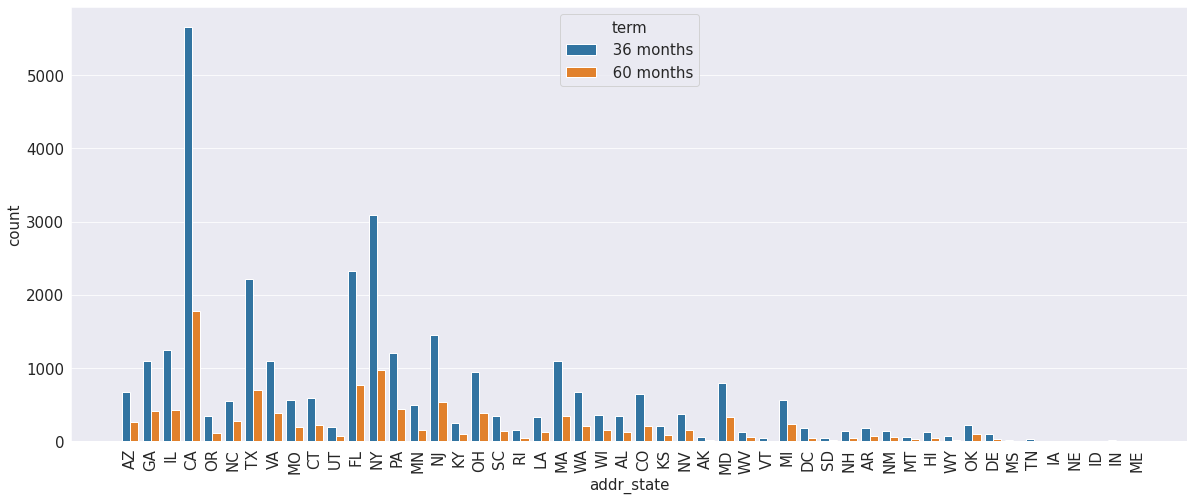

In [225]:
plt.rc('font', size=15)
plt.figure(figsize=(20,8))
sns.countplot(
    x="addr_state",
    data=df_copy,
    hue="term"
)
plt.xticks(rotation="vertical")
plt.plot()


[]

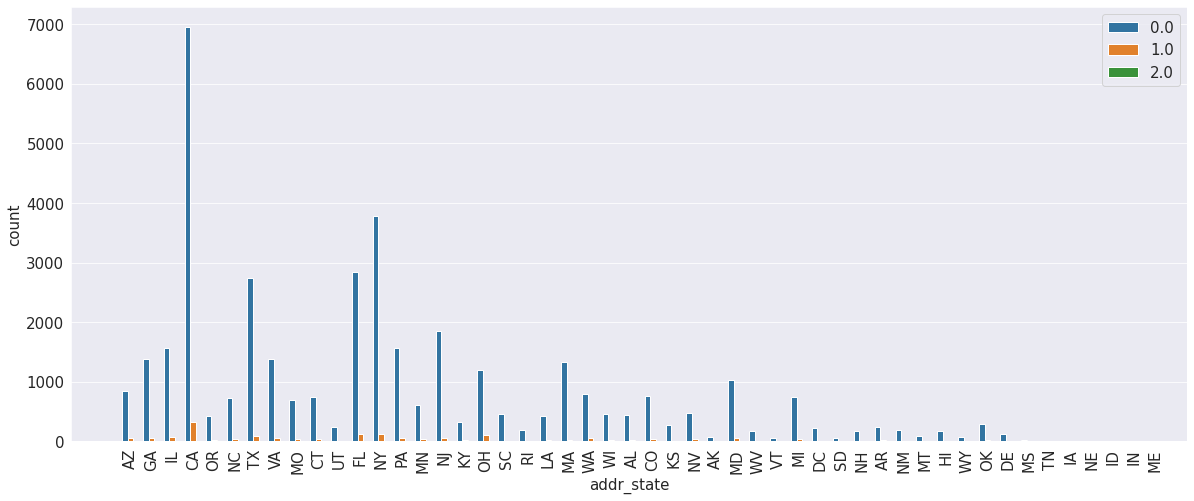

In [226]:
plt.figure(figsize=(20,8))
sns.countplot(
    x="addr_state",
    hue="pub_rec_bankruptcies",
    data=df_copy
)
plt.xticks(rotation="90")
plt.legend(loc="upper right")
plt.plot()

In [227]:
state_list = list(set(df_copy["addr_state"]))

In [228]:
len(state_list)

50

In [229]:
print(state_list)

['LA', 'IN', 'AZ', 'NJ', 'PA', 'NY', 'OH', 'NC', 'MI', 'TN', 'FL', 'WY', 'GA', 'CT', 'ME', 'RI', 'CO', 'CA', 'OR', 'IL', 'AK', 'KY', 'WV', 'DC', 'AR', 'ID', 'MT', 'IA', 'MN', 'NE', 'AL', 'VA', 'NM', 'NV', 'MD', 'KS', 'DE', 'WA', 'MA', 'UT', 'SC', 'VT', 'SD', 'OK', 'MO', 'HI', 'MS', 'TX', 'NH', 'WI']


In [230]:
columns = [

    ('loan_amnt','mean'),
    ('loan_amnt','min'),
    ('loan_amnt','max'),

    ('int_rate','mean'),
    ('int_rate','min'),
    ('int_rate','max'),
    
    ('annual_inc','mean'),
    ('annual_inc','min'),
    ('annual_inc','max'),
    
    ('total_rec_prncp','mean'),
    ('total_rec_prncp','min'),
    ('total_rec_prncp','max'),
    
    ('total_rec_int','mean'),
    ('total_rec_int','min'),
    ('total_rec_int','max'),
    
    ('pub_rec_bankruptcies','mean'),
    ('pub_rec_bankruptcies','min'),
    ('pub_rec_bankruptcies','max'),
]

# total_rec_int pub_rec_bankruptcies

In [231]:
def get_state_info_by_grade(state):
    columns_to_use = [
        "term","grade",
        "loan_amnt",
        "int_rate",
        "annual_inc",
        "total_rec_prncp",
        "total_rec_int",
        "pub_rec_bankruptcies"
    ]
    info = df_copy[df_copy["addr_state"]==state]
    info = info[columns_to_use].groupby(["term","grade"]).describe()
    new_info = info[columns]
    return new_info

In [232]:
def get_state_info_by_purpose(state):
    columns_to_use = [
        "term",
        "purpose",
        "loan_amnt",
        "int_rate",
        "annual_inc",
        "total_rec_prncp",
        "total_rec_int",
        "pub_rec_bankruptcies"
    ]
    info = df_copy[df_copy["addr_state"]==state]
    info = info[columns_to_use].groupby(["term","purpose"]).describe()
    new_info = info[columns]
    return new_info

In [233]:
# home_ownership

def get_state_info_by_house_ownership(state):
    columns_to_use = [
        "term",
        "home_ownership",
        "loan_amnt",
        "int_rate",
        "annual_inc",
        "total_rec_prncp",
        "total_rec_int",
        "pub_rec_bankruptcies"
    ]
    info = df_copy[df_copy["addr_state"]==state]
    info = info[columns_to_use].groupby(["term","home_ownership"]).describe()
    new_info = info[columns]
    return new_info

In [234]:
def get_state_info_by_loan_status(state):
    columns_to_use = [
        "term",
        "loan_status",
        "loan_amnt",
        "int_rate",
        "annual_inc",
        "total_rec_prncp",
        "total_rec_int",
        "pub_rec_bankruptcies"
    ]
    info = df_copy[df_copy["addr_state"]==state]
    info = info[columns_to_use].groupby(["term","loan_status"]).describe()
    new_info = info[columns]
    return new_info

In [235]:
get_state_info_by_grade("CA")

loan_amnt                        int_rate           \
                        mean        min         max     mean      min   
term       grade                                                        
 36 months A      8868.21825  725.00000 35000.00000  7.34374  5.42000   
           B     10172.89631  500.00000 35000.00000 11.01416  6.00000   
           C      9593.50792 1000.00000 35000.00000 13.45905 10.59000   
           D     11064.44292 1000.00000 35000.00000 15.30754  6.00000   
           E     11558.47639 1000.00000 35000.00000 16.55090 13.75000   
           F     15573.36066 1000.00000 28000.00000 17.67361 15.76000   
           G     17088.79310 3000.00000 35000.00000 19.30103 17.22000   
 60 months A     11343.05556 2225.00000 24250.00000  7.59667  5.79000   
           B     15322.98578 1400.00000 35000.00000 11.17057  8.88000   
           C     14255.78457 1000.00000 35000.00000 13.64968 12.23000   
           D     14760.30220 1000.00000 35000.00000 16.28929 14.46000   
           E     16444.26667 1000.00000 35000.00000 17.74717  6.00000   
           F     18586.99324 2500.00000 35000.00000 20.09162 17.80000   
           G     22329.37500 8000.00000 35000.00000 21.36425 19.66000   

                            annual_inc                            \
                      max         mean         min           max   
term       grade                                                   
 36 months A      9.63000  70412.73144  9960.00000 1440000.00000   
           B     12.69000  70544.35595  4080.00000  780000.00000   
           C     16.11000  73024.53427  7200.00000 6000000.00000   
           D     18.25000  71591.45155  4800.00000  528000.00000   
           E     19.91000  68010.95124 10000.00000  330000.00000   
           F     19.47000  93179.15164 20000.00000  600000.00000   
           G     23.22000 102605.41241 34800.00000  374000.00000   
 60 months A      8.90000  65482.73852 17964.00000  185000.00000   
           B     12.69000  71896.68953  4800.00000  240000.00000   
           C     15.96000  71749.40380  4800.00000  270000.00000   
           D     18.49000  72606.78385 13000.00000  281000.00000   
           E     20.69000  76879.07267 13000.00000  315000.00000   
           F     22.35000  84254.76047  9960.00000  250000.00000   
           G     23.91000 107238.67500 24756.00000  366000.00000   

                 total_rec_prncp                        total_rec_int  \
                            mean        min         max          mean   
term       grade                                                        
 36 months A          8393.57850    0.00000 35000.00000     846.58689   
           B          9366.96210    0.00000 35000.00000    1439.24043   
           C          8417.67260    0.00000 35000.00000    1692.33980   
           D          9593.06849    0.00000 35000.00000    2265.34779   
           E          9760.93944    0.00000 35000.00000    2631.63292   
           F         12181.71098  263.33000 28000.01000    3426.11131   
           G         10632.77448  185.80000 25000.00000    3752.40345   
 60 months A          8827.31130 2225.00000 17350.00000    1579.74426   
           B         12584.92097  285.76000 35000.00000    3230.88827   
           C         11540.53282   59.51000 35000.00000    3709.70449   
           D         11511.77808    0.00000 35000.02000    4771.09885   
           E         11876.34032    0.00000 35000.00000    5301.81389   
           F         13107.95682   74.62000 35000.01000    6953.81372   
           G         15178.77000    0.00000 35000.00000    8300.64850   

                                       pub_rec_bankruptcies                  
                       min         max                 mean     min     max  
term       grade                                                             
 36 months A       0.00000  5009.01000              0.01489 0.00000 1.00000  
           B       0.00000  7103.19000              0.04765 0.0000

In [236]:
get_state_info_by_house_ownership("CA")

loan_amnt                        int_rate          \
                                 mean        min         max     mean     min   
term       home_ownership                                                       
 36 months MORTGAGE       11594.22377  500.00000 35000.00000 10.71834 5.42000   
           NONE            4000.00000 4000.00000  4000.00000  9.64000 9.64000   
           OTHER           9977.58621 2050.00000 25000.00000 13.30724 8.00000   
           OWN             9588.20755 1000.00000 35000.00000 11.19390 5.42000   
           RENT            9236.84643  725.00000 35000.00000 11.62938 5.42000   
 60 months MORTGAGE       17242.06731 1000.00000 35000.00000 14.58604 6.17000   
           OWN            13816.99029 2000.00000 35000.00000 14.93670 7.14000   
           RENT           14395.59599 1000.00000 35000.00000 15.30800 5.79000   

                                     annual_inc                             \
                               max         mean          min           max   
term       home_ownership                                                    
 36 months MORTGAGE       21.27000  97171.37401   7904.04000 6000000.00000   
           NONE            9.64000 100000.00000 100000.00000  100000.00000   
           OTHER          18.86000  57779.20690  10000.00000  160000.00000   
           OWN            20.11000  63579.22799   9600.00000  600000.00000   
           RENT           23.22000  60616.38650   4080.00000  780000.00000   
 60 months MORTGAGE       23.91000  91140.18460  18528.00000  315000.00000   
           OWN            21.74000  62012.46718   4800.00000  250000.00000   
           RENT           23.13000  63433.20812   4800.00000  366000.00000   

                          total_rec_prncp                         \
                                     mean        min         max   
term       home_ownership                                          
 36 months MORTGAGE           10491.89933    0.00000 35000.00000   
           NONE                4000.00000 4000.00000  4000.00000   
           OTHER               8796.60034 1318.37000 24950.00000   
           OWN                 8836.53289    0.00000 35000.00000   
           RENT                8311.09724    0.00000 35000.00000   
 60 months MORTGAGE           13702.01206    0.00000 35000.00000   
           OWN                 9349.56951  162.02000 35000.00000   
           RENT               10949.07659    0.00000 35000.02000   

                          total_rec_int                        \
                                   mean       min         max   
term       home_ownership                                       
 36 months MORTGAGE          1651.74064   0.00000 10279.13000   
           NONE               622.49000 622.49000   622.49000   
           OTHER             1890.76172  58.83000  5808.88000   
           OWN               1266.13343   0.00000  6675.61000   
           RENT              1462.58645   0.00000 10957.56000   
 60 months MORTGAGE          4778.95650   0.00000 23480.14000   
           OWN               3911.48553  45.42000 17894.69000   
           RENT              4269.70164   0.00000 22122.30000   

                          pub_rec_bankruptcies                  
                                          mean     min     max  
term       home_ownership                                       
 36 months MORTGAGE                    0.04334 0.00000 2.00000  
           NONE                            NaN     NaN     NaN  
           OTHER                       0.10345 0.00000 1.00000  
           OWN                         0.02581 0.00000 1.00000  
           RENT                        0.04428 0.00000 1.00000  
 60 months MORTGAGE                    0.04808 0.00000 1.00000  
           OWN                         0.05825 0.00000 1.00000  
           RENT                        0.05485 0.00000 1.00000

In [237]:
get_state_info_by_purpose("CA")

loan_amnt                        int_rate  \
                                     mean        min         max     mean   
term       purpose                                                          
 36 months car                 7178.41615 1000.00000 24000.00000  9.97199   
           credit_card        10710.14254  725.00000 35000.00000 10.97259   
           debt_consolidation 10990.56604 1000.00000 35000.00000 11.67045   
           educational         7003.70370 1000.00000 25000.00000 12.30074   
           home_improvement   11065.15957 1000.00000 35000.00000 10.65117   
           house              10279.41176 2500.00000 35000.00000 11.10314   
           major_purchase      7367.24453 1000.00000 28800.00000 10.40679   
           medical             7026.48515 1000.00000 35000.00000 10.81990   
           moving              5530.41237 1000.00000 24000.00000 11.48948   
           other               6998.50000 1000.00000 35000.00000 11.39758   
           renewable_energy    8476.92308 1000.00000 16000.00000  9.84462   
           small_business     11459.24797 1000.00000 35000.00000 12.27646   
           vacation            5613.48684  500.00000 25000.00000 10.44882   
           wedding             9869.36090 1000.00000 30000.00000 11.27195   
 60 months car                 7857.53425 2000.00000 28000.00000 12.68192   
           credit_card        16766.12500 2800.00000 35000.00000 14.66330   
           debt_consolidation 16798.51190 1000.00000 35000.00000 15.42403   
           educational         7466.66667 6000.00000  8400.00000 14.34333   
           home_improvement   15879.34783 1400.00000 35000.00000 14.37225   
           house              17461.90476 5000.00000 35000.00000 16.00857   
           major_purchase     12737.71186 2100.00000 35000.00000 14.08085   
           medical            13391.66667 1600.00000 25000.00000 14.10667   
           moving              9764.70588 2350.00000 25000.00000 14.00471   
           other              11233.27338 1000.00000 35000.00000 14.54180   
           renewable_energy   10410.00000 2500.00000 20000.00000 15.13000   
           small_business     17974.00990 2400.00000 35000.00000 15.83574   
           vacation           11441.66667 1000.00000 29700.00000 13.75933   
           wedding            12358.33333 3000.00000 25000.00000 14.93396   

                                                  annual_inc              \
                                   min      max         mean         min   
term       purpose                                                         
 36 months car                 5.42000 18.64000  63958.13366  9600.00000   
           credit_card         5.42000 21.27000  74581.36690 10140.00000   
           debt_consolidation  5.42000 23.22000  67830.69629  4080.00000   
           educational         7.40000 17.90000  57857.82481  7200.00000   
           home_improvement    5.42000 18.29000 119815.85887 12000.00000   
           house               5.42000 16.77000  68704.12000 25000.00000   
           major_purchase      5.42000 19.29000  68653.27102 12996.00000   
           medical             5.42000 17.27000  65798.44079 12000.00000   
           moving              5.42000 17.51000  56068.49402  9600.00000   
           other               5.42000 19.91000  62948.25905  7500.00000   
           renewable_energy    6.62000 16.32000  72070.76923 22200.00000   
           small_business      5.42000 21.21000  79101.99951 15000.00000   
           vacation            5.42000 18.64000  64056.22421  7904.04000   
           wedding             5.42000 17.58000  84582.01444 18000.00000   
 60 months car                 5.79000 18.30000  63463.88110  4800.00000   
           credit_card         6.91000 23.13000  78995.97710 23000.00000   
           debt_consolidation  6.00000 23.91000  72936.35912 10800.00000   
           educational        10.38000 18.67000  47333.33333 30000.00000   
           home_improvement    6.91000 23.13000 

In [238]:
get_state_info_by_loan_status(state="CA")

loan_amnt  \
                                                                     mean   
term       loan_status                                                      
 36 months Charged Off                                         9692.53623   
           Does not meet the credit policy. Status:Charged... 10151.80723   
           Does not meet the credit policy. Status:Fully Paid 10111.46341   
           Fully Paid                                          9974.35253   
 60 months Charged Off                                        16213.75571   
           Current                                            16519.09722   
           Does not meet the credit policy. Status:Charged... 11441.66667   
           Does not meet the credit policy. Status:Fully Paid 13641.66667   
           Fully Paid                                         15301.34255   
           In Grace Period                                    15000.00000   
           Late (31-120 days)                                 19850.00000   

                                                                           \
                                                                      min   
term       loan_status                                                      
 36 months Charged Off                                         1000.00000   
           Does not meet the credit policy. Status:Charged...  1000.00000   
           Does not meet the credit policy. Status:Fully Paid  1000.00000   
           Fully Paid                                           500.00000   
 60 months Charged Off                                         1000.00000   
           Current                                             2000.00000   
           Does not meet the credit policy. Status:Charged...  3600.00000   
           Does not meet the credit policy. Status:Fully Paid  1100.00000   
           Fully Paid                                          1000.00000   
           In Grace Period                                    15000.00000   
           Late (31-120 days)                                 12000.00000   

                                                                           \
                                                                      max   
term       loan_status                                                      
 36 months Charged Off                                        35000.00000   
           Does not meet the credit policy. Status:Charged... 25000.00000   
           Does not meet the credit policy. Status:Fully Paid 25000.00000   
           Fully Paid                                         35000.00000   
 60 months Charged Off                                        35000.00000   
           Current                                            35000.00000   
           Does not meet the credit policy. Status:Charged... 25000.00000   
           Does not meet the credit policy. Status:Fully Paid 25000.00000   
           Fully Paid                                         35000.00000   
           In Grace Period                                    15000.00000   
           Late (31-120 days)                                 33950.00000   

                                                              int_rate  \
                                                                  mean   
term       loan_status                                                   
 36 months Charged Off                                        12.48477   
           Does not meet the credit policy. Status:Charged... 13.95422   
           Does not meet the credit policy. Status:Fully Paid 13.80059   
           Fully Paid                                         11.02527   
 60 months Charged Off                                        15.79546   
           Current                                            15.01861   
           Does not meet the credit policy. Status:Charged... 16.84278   
           Does not meet the credit policy. Status:Fully Paid 16.27278   
           Fu

In [239]:
df_copy["verification_status"]

0               Verified
1        Source Verified
2           Not Verified
3        Source Verified
4        Source Verified
              ...       
42530       Not Verified
42531       Not Verified
42532       Not Verified
42533       Not Verified
42534       Not Verified
Name: verification_status, Length: 42535, dtype: object

In [240]:
df_copy["verification_status"].value_counts()

Not Verified       18758
Verified           13471
Source Verified    10306
Name: verification_status, dtype: int64

[]

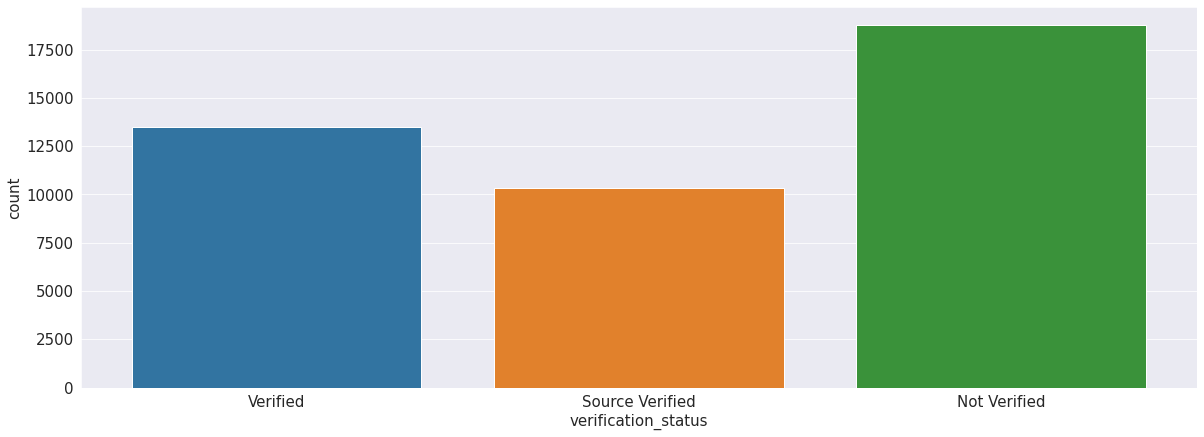

In [241]:
plt.figure(figsize=(20,7))
sns.countplot(
    x="verification_status",
    data=df_copy
)
plt.plot()

[]

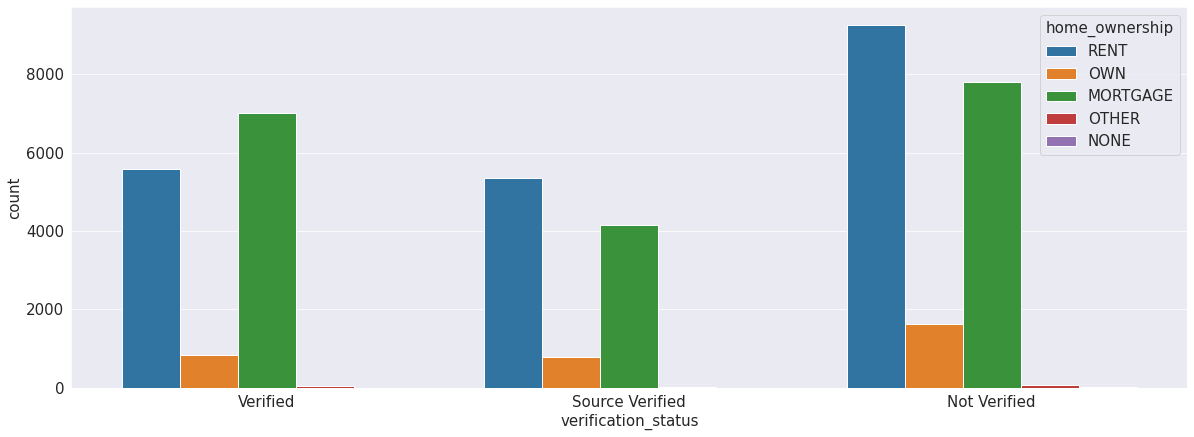

In [242]:
plt.figure(figsize=(20,7))
sns.countplot(
    x="verification_status",
    data=df_copy,
    hue="home_ownership"
)
plt.plot()

[]

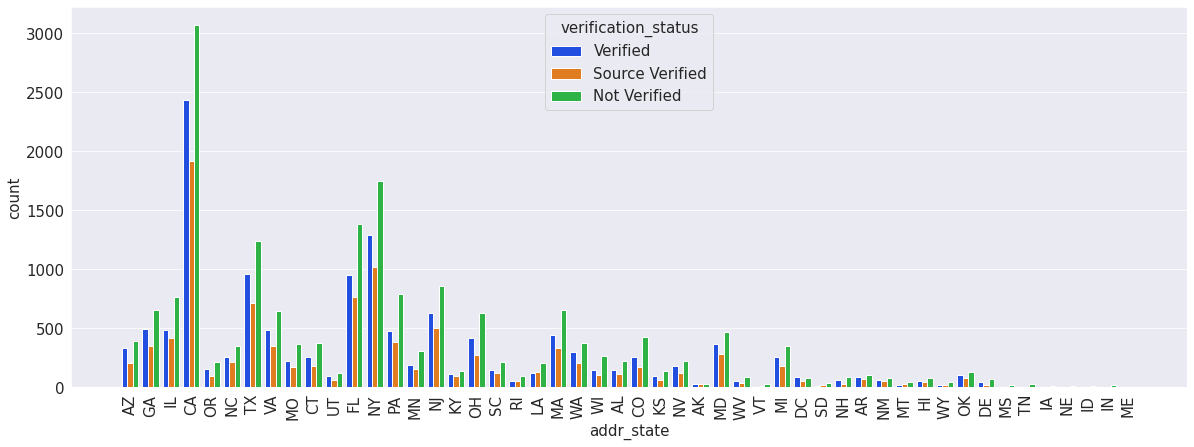

In [243]:
plt.figure(figsize=(20,7))
sns.countplot(
    hue="verification_status",
    data=df_copy,
    x="addr_state",
    palette="bright"
)
plt.xticks(rotation="90")
plt.plot()

[]

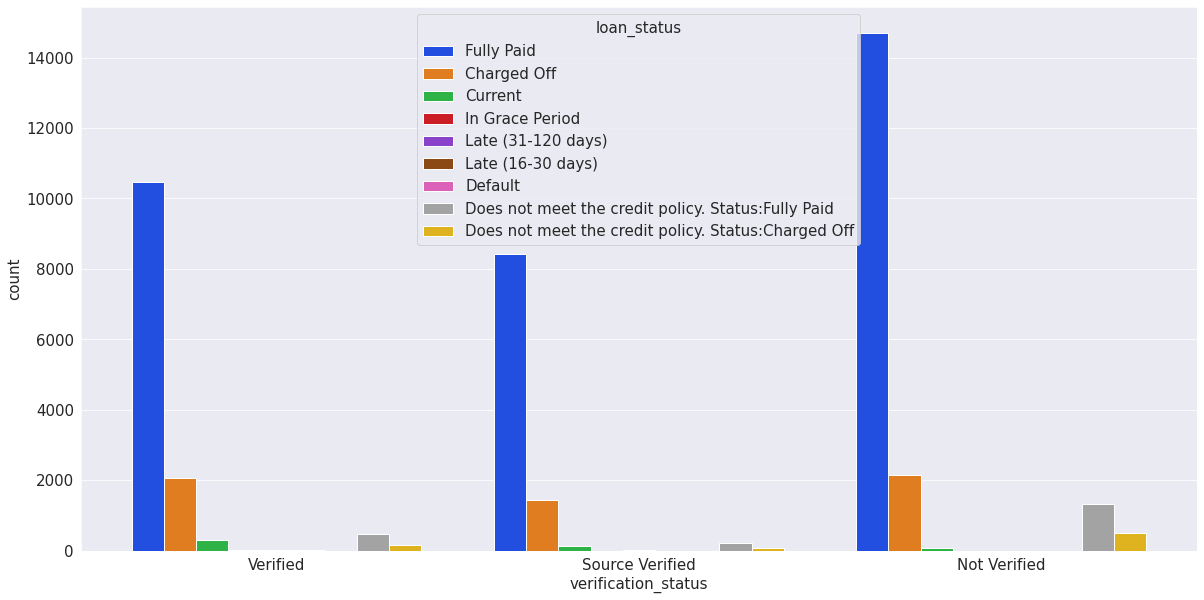

In [244]:
plt.figure(figsize=(20,10))
sns.countplot(
    x="verification_status",
    data=df_copy,
    hue="loan_status",
    palette="bright"
)
plt.plot()

In [245]:
df_copy["total_il_high_credit_limit"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_il_high_credit_limit, Length: 42535, dtype: float64

In [246]:
df_copy["total_il_high_credit_limit"].isnull().sum()

42535

In [247]:
df_copy["total_bal_il"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: total_bal_il, Length: 42535, dtype: float64

In [248]:
df_copy["total_bal_il"].isnull().sum()

42535

In [249]:
len(df_copy["title"].unique())

21262

In [250]:
# df_copy["verified_status_joint"]

"verified_status_joint" in df_copy.columns  #checking if this column exists or not


False

In [251]:
df_copy["revol_util"]

0        83.7%
1         9.4%
2        98.5%
3          21%
4        53.9%
         ...  
42530      NaN
42531      NaN
42532      NaN
42533      NaN
42534      NaN
Name: revol_util, Length: 42535, dtype: object

it's how much you currently owe divided by your credit limit. It is generally expressed as a percent.

In [252]:
df_copy["revol_util"].describe()

count     42445
unique     1119
top          0%
freq       1070
Name: revol_util, dtype: object

In [253]:
df_copy["revol_util"].isnull().sum()

90

In [254]:
def update_revol_unit(value):
    return eval(value.replace("%","").replace(" ",""))

In [255]:
df_revol_util = df_copy["revol_util"].copy()

In [256]:
df_revol_util.head()

0    83.7%
1     9.4%
2    98.5%
3      21%
4    53.9%
Name: revol_util, dtype: object

In [257]:
df_revol_util = df_revol_util.fillna("0")

In [258]:
df_revol_util.isnull().sum()

0

In [259]:
type(df_revol_util)

pandas.core.series.Series

In [260]:
new_revol_util = map(update_revol_unit,df_revol_util)

In [261]:
new_revol_util = list(new_revol_util)

In [262]:
df_revol_util = pd.Series(new_revol_util)

In [263]:
# df_revol_util
df_revol_util.describe()

count   42535.00000
mean       49.01323
std        28.42400
min         0.00000
25%        25.60000
50%        49.60000
75%        72.60000
max       119.00000
dtype: float64

[]

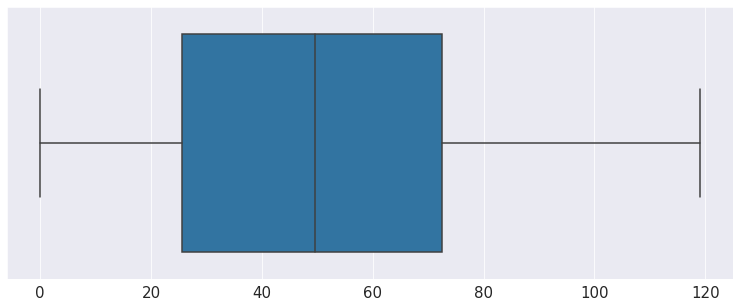

In [264]:
plt.figure(figsize=(13,5))
sns.boxplot(
    x=df_revol_util
)
plt.plot()

[]

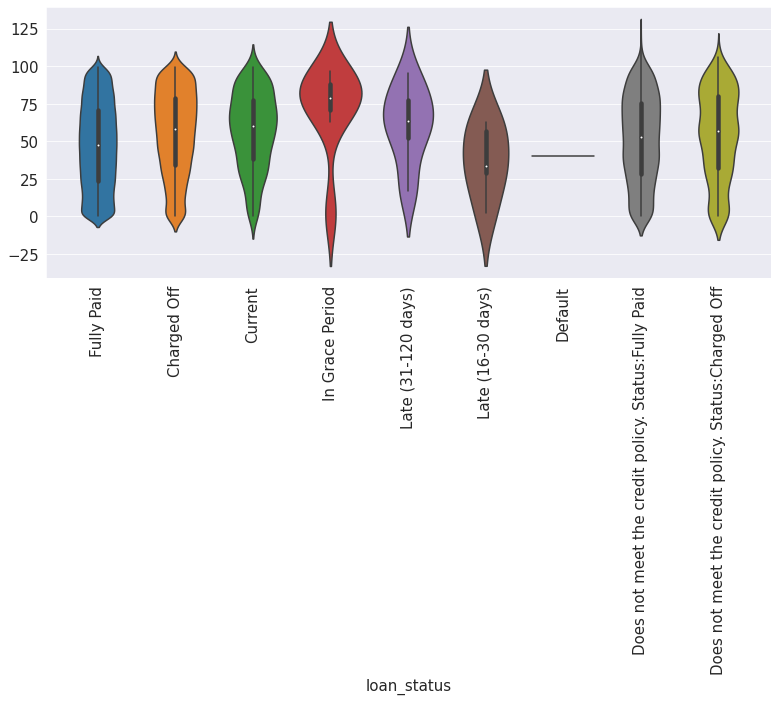

In [265]:
plt.figure(figsize=(13,5))
sns.violinplot(
    x = df_copy["loan_status"],
    y=df_revol_util
)
plt.xticks(rotation="90")
plt.plot()

[]

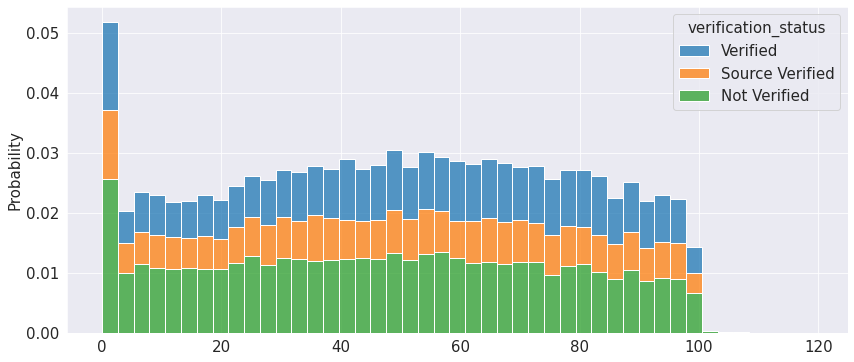

In [266]:
plt.figure(figsize=(14,6))
sns.histplot(
    x=df_revol_util,
    hue=df_copy["verification_status"],
    multiple="stack",
    stat="probability"
)
plt.plot()

[]

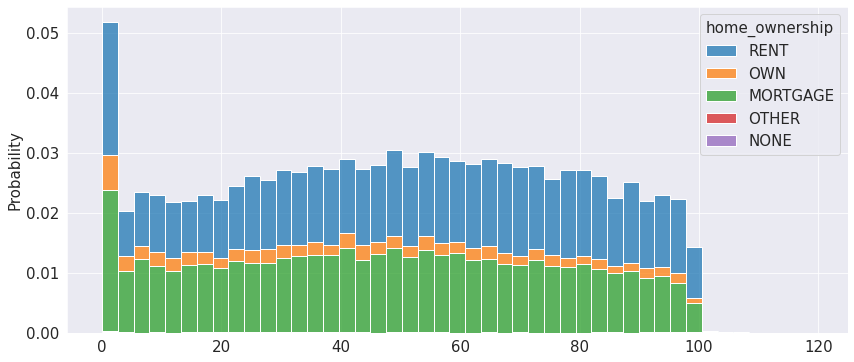

In [267]:
plt.figure(figsize=(14,6))
sns.histplot(
    x=df_revol_util,
    hue=df_copy["home_ownership"],
    multiple="stack",
    stat="probability",
)
plt.plot()

[]

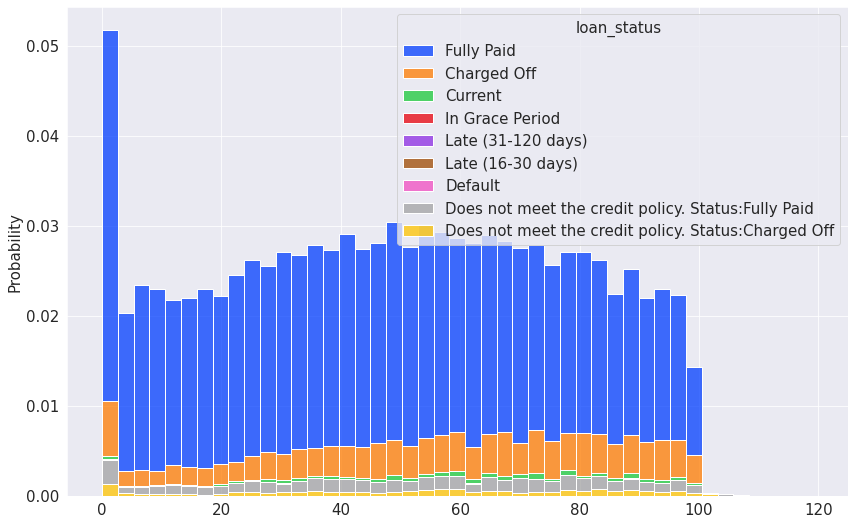

In [268]:
plt.figure(figsize=(14,9))
sns.histplot(
    x=df_revol_util,
    hue=df_copy["loan_status"],
    multiple="stack",
    stat="probability",
    palette="bright"
)
plt.plot()

If you don't pay the balance on your revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance. You might apply for credit assuming you'll always pay your balance in full every month.

In [269]:
df_copy["revol_bal"].describe()

count     42535.00000
mean      14297.86091
std       22018.44101
min           0.00000
25%        3635.00000
50%        8821.00000
75%       17251.00000
max     1207359.00000
Name: revol_bal, dtype: float64

[]

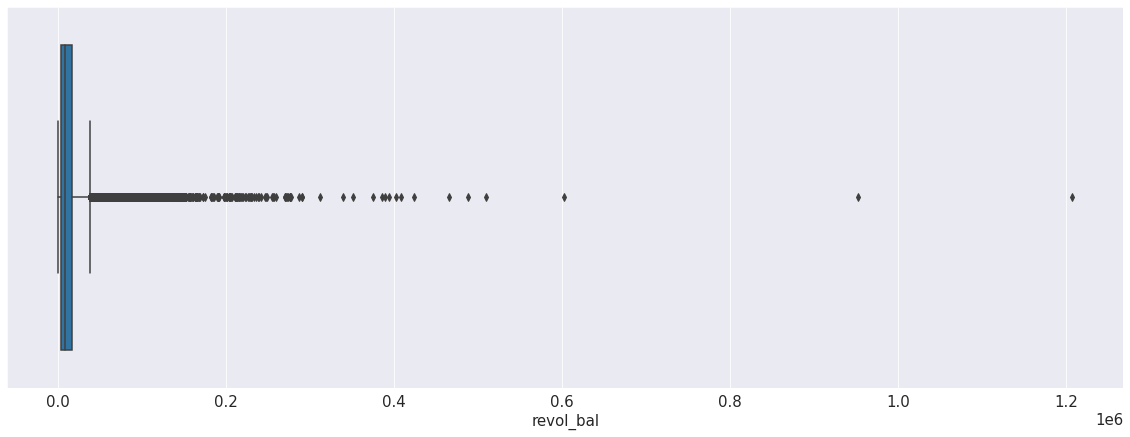

In [270]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="revol_bal",
    data=df_copy
)
plt.plot()

[]

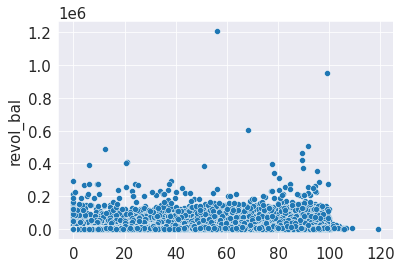

In [271]:
sns.scatterplot(
    y=df_copy["revol_bal"],
    x=df_revol_util
)
plt.plot()

In [272]:
df_copy["recoveries"]

0         0.00000
1       117.08000
2         0.00000
3         0.00000
4         0.00000
           ...   
42530     0.00000
42531     0.00000
42532     0.00000
42533     0.00000
42534     0.00000
Name: recoveries, Length: 42535, dtype: float64

In [273]:
df_copy["recoveries"].describe()

count   42535.00000
mean      100.30735
std       718.07872
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max     29623.35000
Name: recoveries, dtype: float64

<h3> Charge off </h3>

<ul>
    <li>
        A charge-off refers to debt that a company believes it will no longer collect as the borrower has become delinquent on payments.
    </li>
    <li>
    Charged-off debt does not mean that the consumer does not have to repay the debt anymore.
    </li>
    <li>
    After a lender has charged off a debt, it could sell the debt to a third-party collections agency that would attempt to collect on the delinquent account.
    </li>
    <li>
    A consumer owes the debt until it is paid off, settled, discharged in a bankruptcy proceeding, or in case of legal proceedings, becomes too old due to the statute of limitations.
    </li>
</ul>

In [274]:
df_copy["recoveries"].isnull().sum()

0

In [275]:
df_copy["recoveries"].describe()

count   42535.00000
mean      100.30735
std       718.07872
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max     29623.35000
Name: recoveries, dtype: float64

In [276]:
df_copy["recoveries"].max()

29623.35

In [277]:
df_copy["recoveries"].min()

0.0

In [278]:
len(df_copy["recoveries"].unique())

4530

[]

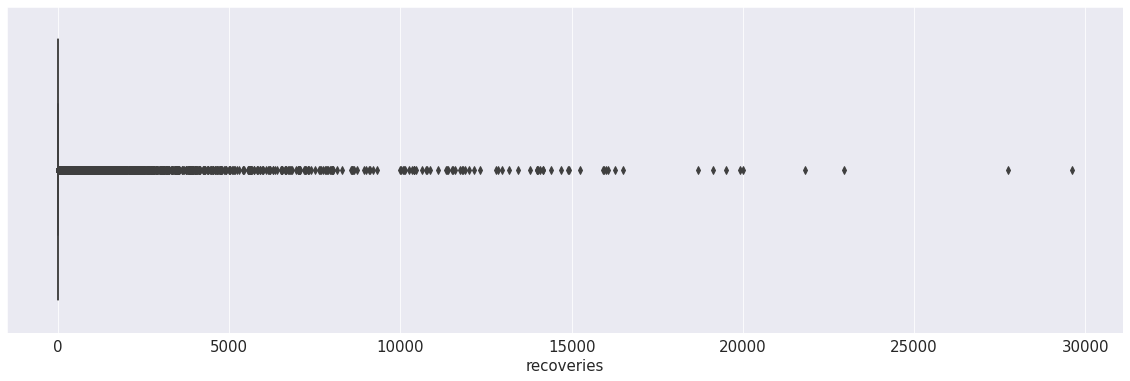

In [279]:
plt.figure(figsize=(20,6))
sns.boxplot(
    x="recoveries",
    data=df_copy
)
plt.plot()

In [280]:
df_copy["recoveries"].value_counts()

0.00000       37789
13.93000          4
10.40000          4
11.29000          4
10.66000          3
              ...  
1476.07000        1
36.33000          1
429.14000         1
245.49000         1
4897.92000        1
Name: recoveries, Length: 4530, dtype: int64

[]

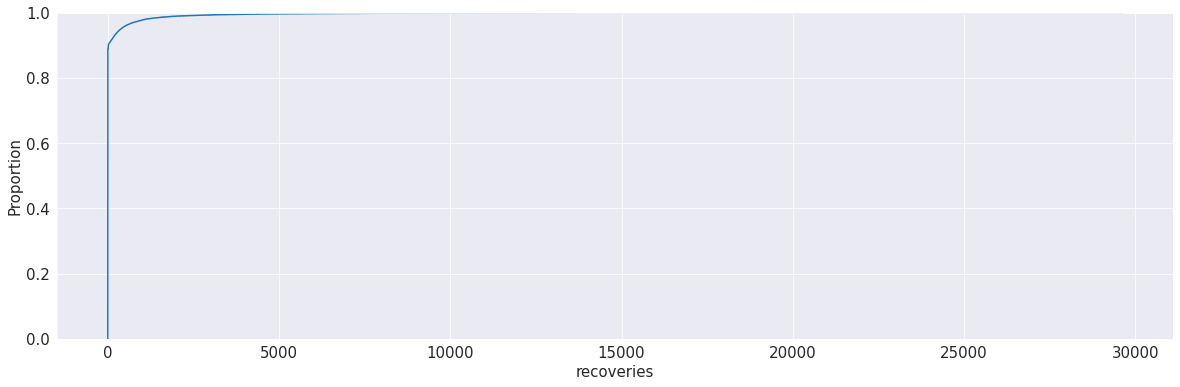

In [281]:
plt.figure(figsize=(20,6))
sns.ecdfplot(
    x="recoveries",
    data=df_copy
)
plt.plot()

In [282]:
data = df_copy[df_copy["recoveries"] == 29623.35000]

In [283]:
data[
    [
        "home_ownership",
        "pub_rec_bankruptcies",
        "annual_inc",
        "loan_amnt",
        "addr_state",
        "verification_status",
        "verification_status",
        "recoveries"
    ]
]

home_ownership  pub_rec_bankruptcies   annual_inc  loan_amnt addr_state  \
3668       MORTGAGE               0.00000 109592.00000      35000         NY   

     verification_status verification_status  recoveries  
3668            Verified            Verified 29623.35000

[]

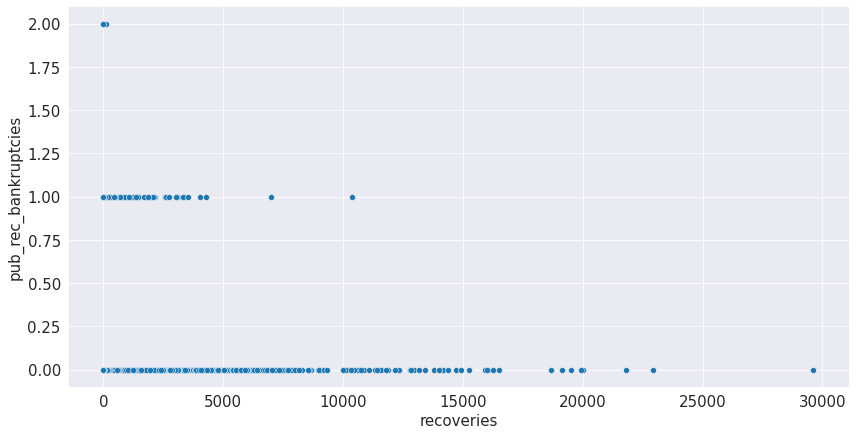

In [284]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    x="recoveries",
    y="pub_rec_bankruptcies",
    data=df_copy
)
plt.plot()

[]

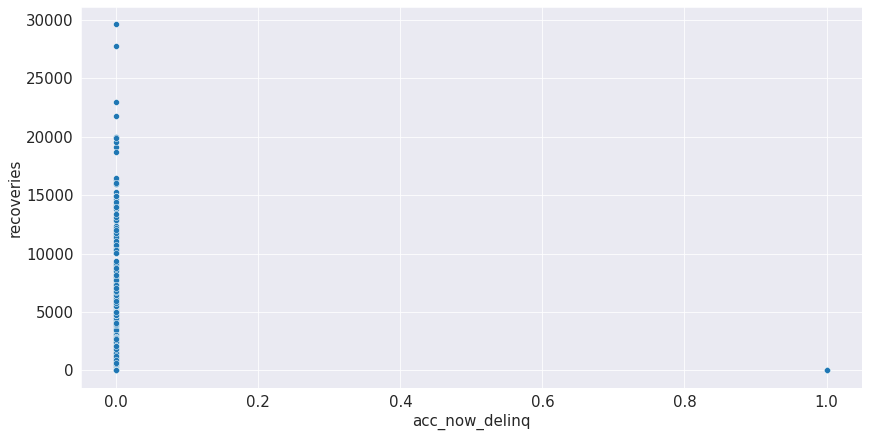

In [285]:
plt.figure(figsize=(14,7))
sns.scatterplot(
    x="acc_now_delinq",
    y="recoveries",
    data=df_copy
)
plt.plot()

In [286]:
df_copy["pct_tl_nvr_dlq"] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: pct_tl_nvr_dlq, Length: 42535, dtype: float64

In [287]:
df_copy["pct_tl_nvr_dlq"].isnull().sum() # all values are null here

42535

In [288]:
df_copy["out_prncp_inv"].isnull().sum()

0

In [289]:
df_copy["out_prncp_inv"]

0         0.00000
1         0.00000
2         0.00000
3         0.00000
4       270.78000
           ...   
42530     0.00000
42531     0.00000
42532     0.00000
42533     0.00000
42534     0.00000
Name: out_prncp_inv, Length: 42535, dtype: float64

In [290]:
df_copy["out_prncp_inv"].describe()

count   42535.00000
mean       11.81589
std       125.06186
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      3553.30000
Name: out_prncp_inv, dtype: float64

In [291]:
df_copy["open_rv_24m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: open_rv_24m, Length: 42535, dtype: float64

In [292]:
df_copy["open_rv_24m"].isnull().sum()

42535

In [293]:
df_copy["open_rv_12m"].isnull().sum()

42535

In [294]:
df_copy["open_il_6m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: open_il_6m, Length: 42535, dtype: float64

In [295]:
df_copy["open_il_6m"].isnull().sum()

42535

In [296]:
df_copy["open_il_24m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: open_il_24m, Length: 42535, dtype: float64

In [297]:
df_copy["open_il_24m"].isnull().sum()

42535

In [298]:
df_copy["open_il_12m"].isnull().sum()

42535

In [299]:
df_copy["open_acc_6m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: open_acc_6m, Length: 42535, dtype: float64

In [300]:
df_copy["open_acc_6m"].isnull().sum()

42535

In [301]:
df_copy["open_acc"].isnull().sum()

29

In [302]:
df_copy["open_acc"]

0        3.00000
1        3.00000
2        2.00000
3       10.00000
4       15.00000
          ...   
42530        NaN
42531        NaN
42532        NaN
42533        NaN
42534        NaN
Name: open_acc, Length: 42535, dtype: float64

In [303]:
df_copy["open_acc"].describe()

count   42506.00000
mean        9.34395
std         4.49627
min         1.00000
25%         6.00000
50%         9.00000
75%        12.00000
max        47.00000
Name: open_acc, dtype: float64

[]

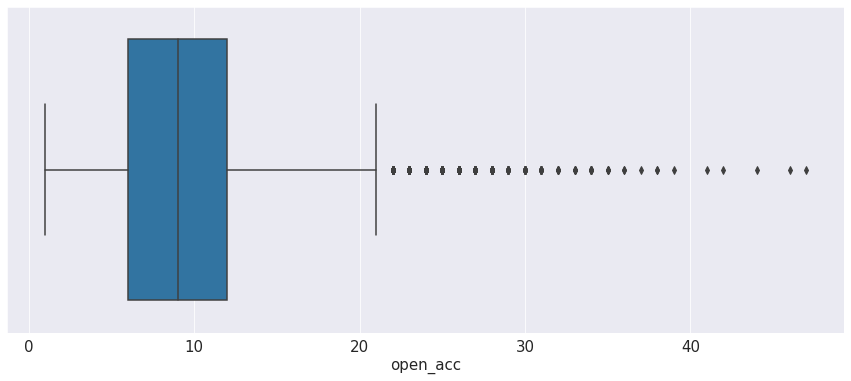

In [304]:
plt.figure(figsize=(15,6))
sns.boxplot(
    x="open_acc",
    data=df_copy
)
plt.plot()

[]

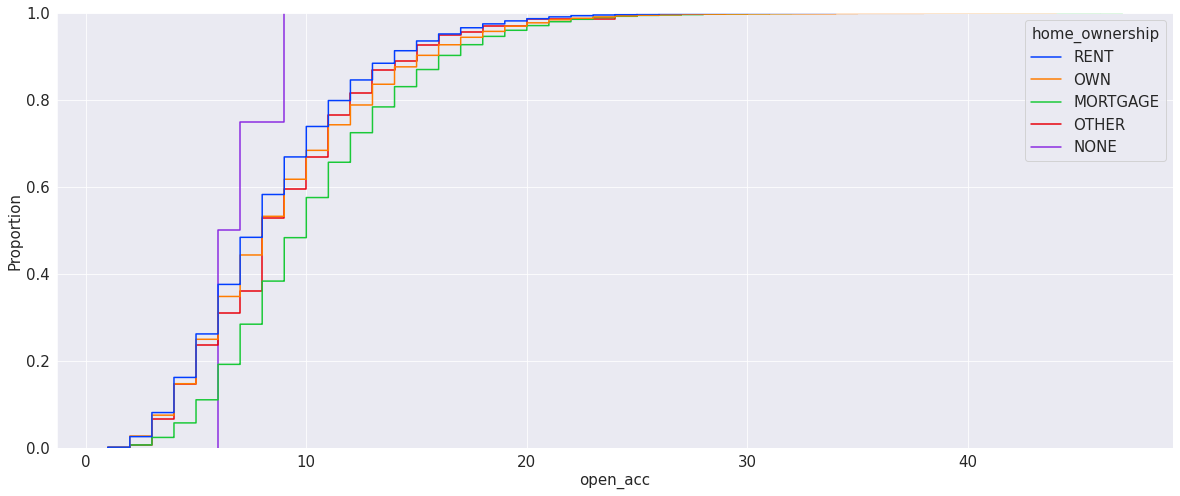

In [305]:
plt.figure(figsize=(20,8))
sns.ecdfplot(
    x="open_acc",
    data=df_copy,
    hue="home_ownership",
    palette="bright"
)
# plt.xticks(rotation="90")
plt.plot()

[]

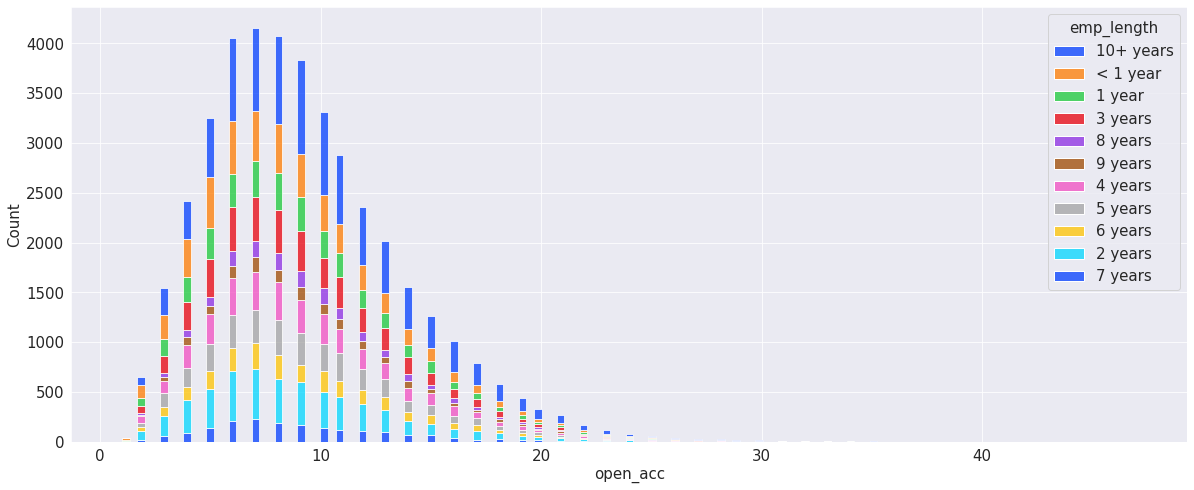

In [306]:
plt.figure(figsize=(20,8))
sns.histplot(
    x="open_acc",
    data=df_copy,
    hue="emp_length",
    palette="bright",
    multiple="stack"
)
# plt.xticks(rotation="90")
plt.plot()

[]

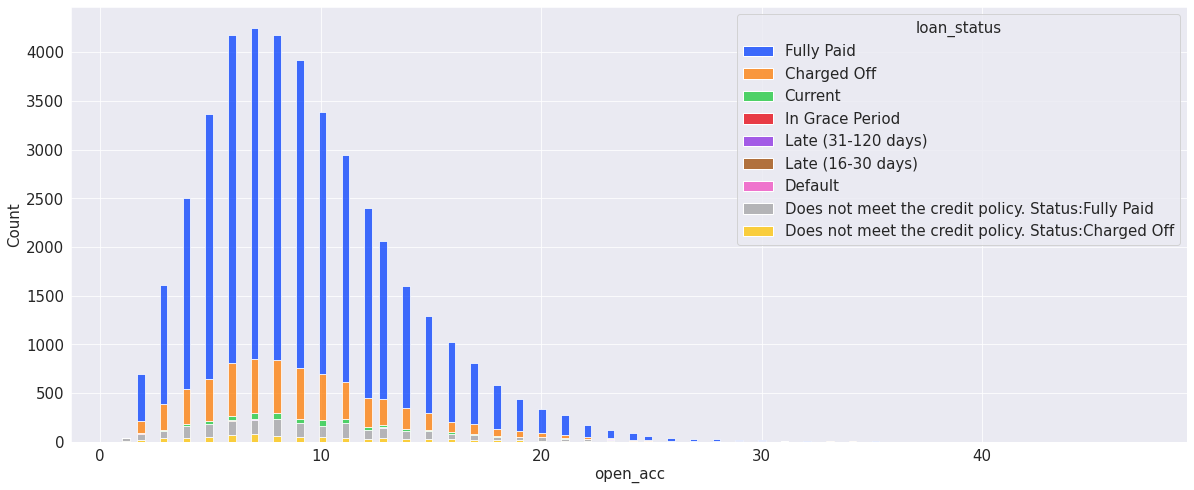

In [307]:
plt.figure(figsize=(20,8))
sns.histplot(
    x="open_acc",
    data=df_copy,
    hue="loan_status",
    palette="bright",
    multiple="stack",
)
plt.plot()

In [308]:
df_copy["num_tl_op_past_12m"].isnull().sum()

42535

In [309]:
df_copy["num_tl_op_past_12m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_tl_op_past_12m, Length: 42535, dtype: float64

In [310]:
df_copy["num_tl_90g_dpd_24m"].isnull().sum()

42535

In [311]:
df_copy["num_tl_90g_dpd_24m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_tl_90g_dpd_24m, Length: 42535, dtype: float64

In [312]:
df_copy["num_tl_30dpd"].isnull().sum()

42535

In [313]:
df_copy["num_tl_30dpd"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_tl_30dpd, Length: 42535, dtype: float64

In [314]:
df_copy["num_tl_120dpd_2m"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_tl_120dpd_2m, Length: 42535, dtype: float64

In [315]:
df_copy["num_tl_120dpd_2m"].isnull().sum()

42535

In [316]:
df_copy["num_rev_tl_bal_gt_0"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
42530   NaN
42531   NaN
42532   NaN
42533   NaN
42534   NaN
Name: num_rev_tl_bal_gt_0, Length: 42535, dtype: float64

In [317]:
df_copy["num_rev_tl_bal_gt_0"].isnull().sum()

42535

In [318]:
df_copy["num_bc_sats"].isnull().sum()

42535

In [319]:
df_copy["num_actv_rev_tl"].isnull().sum()

42535

In [320]:
df_copy["num_actv_bc_tl"].isnull().sum()

42535

In [321]:
df_copy["num_accts_ever_120_pd"].isnull().sum() 

42535

In [322]:
df_copy["next_pymnt_d"].isnull().sum()

39239

In [323]:
len(df_copy["next_pymnt_d"]) - df_copy["next_pymnt_d"].isnull().sum()

3296

In [324]:
df_copy["next_pymnt_d"] = pd.to_datetime(df_copy["next_pymnt_d"])

In [325]:
df_copy["next_pymnt_d"]

0              NaT
1              NaT
2              NaT
3              NaT
4       2016-10-01
           ...    
42530   2008-03-01
42531   2010-07-01
42532   2010-07-01
42533   2010-07-01
42534   2010-07-01
Name: next_pymnt_d, Length: 42535, dtype: datetime64[ns]

In [326]:
df_copy["next_pymnt_month"] = pd.DatetimeIndex(df_copy["next_pymnt_d"]).month

In [327]:
df_copy["next_pymnt_year"] = pd.DatetimeIndex(df_copy["next_pymnt_d"]).year

In [328]:
df_copy[["next_pymnt_month","next_pymnt_year"]]

next_pymnt_month  next_pymnt_year
0                   NaN              NaN
1                   NaN              NaN
2                   NaN              NaN
3                   NaN              NaN
4              10.00000       2016.00000
...                 ...              ...
42530           3.00000       2008.00000
42531           7.00000       2010.00000
42532           7.00000       2010.00000
42533           7.00000       2010.00000
42534           7.00000       2010.00000

[42535 rows x 2 columns]

In [329]:
df_copy["next_pymnt_year"].describe()

count   3296.00000
mean    2011.92476
std        2.31255
min     2007.00000
25%     2010.00000
50%     2011.00000
75%     2013.00000
max     2016.00000
Name: next_pymnt_year, dtype: float64

In [330]:
df_copy["mths_since_recent_revol_delinq"].isnull().sum()

42535

In [331]:
df_copy["mths_since_recent_inq"].isnull().sum()

42535

In [332]:
df_copy["mths_since_recent_bc_dlq"].isnull().sum()

42535

In [333]:
df_copy["mths_since_recent_bc"].isnull().sum()

42535

In [334]:
df_copy["mths_since_rcnt_il"].isnull().sum()

42535

In [335]:
df_copy["mths_since_last_record"].isnull().sum()

38884

In [336]:
len(df_copy["mths_since_last_record"]) - df_copy["mths_since_last_record"].isnull().sum()

3651

In [337]:
df_copy["mths_since_last_record"].value_counts()

0.00000      1275
89.00000       70
113.00000      68
104.00000      66
87.00000       62
             ... 
120.00000       1
129.00000       1
5.00000         1
24.00000        1
19.00000        1
Name: mths_since_last_record, Length: 113, dtype: int64

In [338]:
# replacing nan vith 0s

df_copy["mths_since_last_record"] = df_copy["mths_since_last_record"].fillna(0)


In [339]:
df_copy["mths_since_last_record"].isnull().sum()

0

In [340]:
df_copy["mths_since_last_record"].value_counts()

0.00000      40159
89.00000        70
113.00000       68
104.00000       66
87.00000        62
             ...  
6.00000          1
120.00000        1
129.00000        1
5.00000          1
24.00000         1
Name: mths_since_last_record, Length: 113, dtype: int64

In [341]:
df_copy["mths_since_last_record"].describe()

count   42535.00000
mean        5.07935
std        21.57584
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       129.00000
Name: mths_since_last_record, dtype: float64

[]

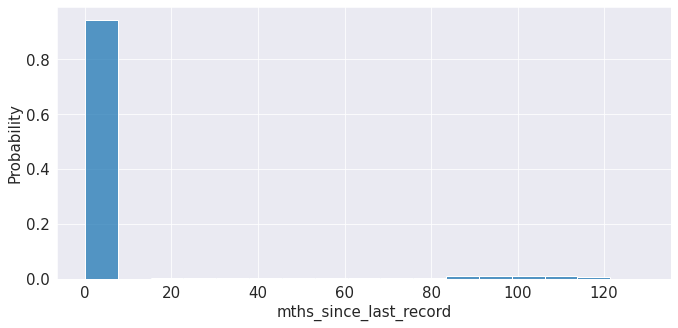

In [342]:
plt.figure(figsize=(11,5))
sns.histplot(
    x="mths_since_last_record",
    data=df_copy,
    stat="probability"
)
plt.plot()

[]

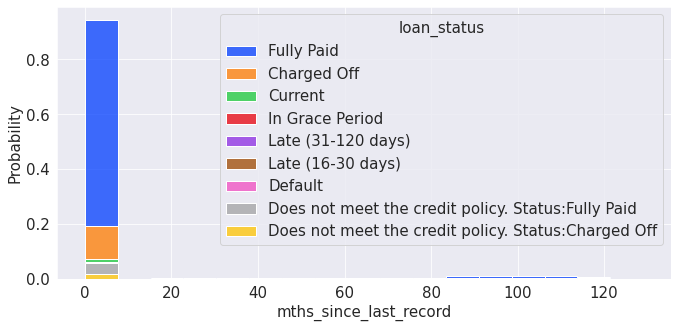

In [343]:
plt.figure(figsize=(11,5))
sns.histplot(
    x="mths_since_last_record",
    data=df_copy,
    hue="loan_status",
    stat="probability",
    multiple="stack",
    palette="bright"
)
plt.plot()

In [344]:
df_copy["mths_since_last_major_derog"].isnull().sum() # all are null

42535

In [345]:
df_copy["mths_since_last_delinq"].isnull().sum()

26926

In [346]:
len(df_copy["mths_since_last_delinq"]) - df_copy["mths_since_last_delinq"].isnull().sum()

15609

In [347]:
df_copy["mths_since_last_delinq"]

0            NaN
1            NaN
2            NaN
3       35.00000
4       38.00000
          ...   
42530        NaN
42531        NaN
42532        NaN
42533        NaN
42534        NaN
Name: mths_since_last_delinq, Length: 42535, dtype: float64

In [348]:
df_copy["mths_since_last_delinq"].describe()

count   15609.00000
mean       35.01762
std        22.41843
min         0.00000
25%        17.00000
50%        33.00000
75%        51.00000
max       120.00000
Name: mths_since_last_delinq, dtype: float64

In [349]:
df_copy["acc_now_delinq"].max()

1.0

[]

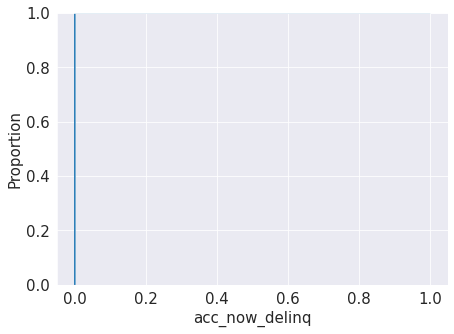

In [350]:
plt.figure(figsize=(7,5))
sns.ecdfplot(
    x="acc_now_delinq",
    data=df_copy,
#     hue="home_ownership",
    palette="bright"
)
# plt.xticks(rotation="90")
plt.plot()

[]

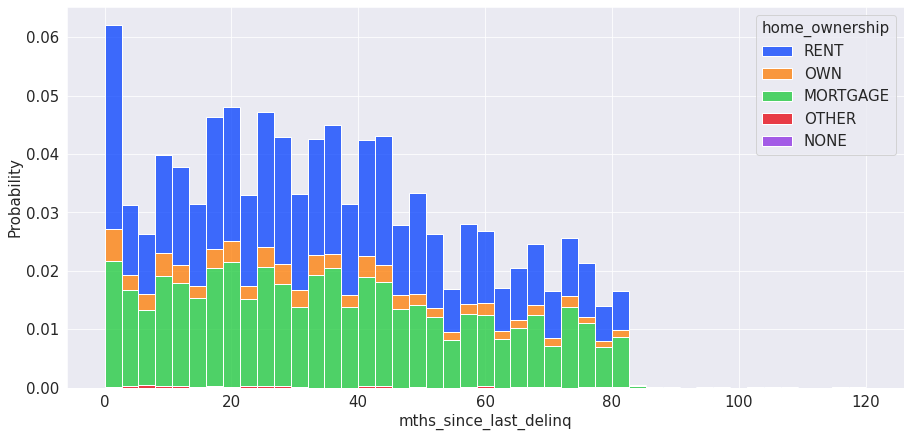

In [351]:
plt.figure(figsize=(15,7))
sns.histplot(
    x="mths_since_last_delinq",
    data=df_copy,
    fill=True,
    hue="home_ownership",
    palette="bright",
    stat="probability",
    multiple="stack"
)
plt.plot()

[]

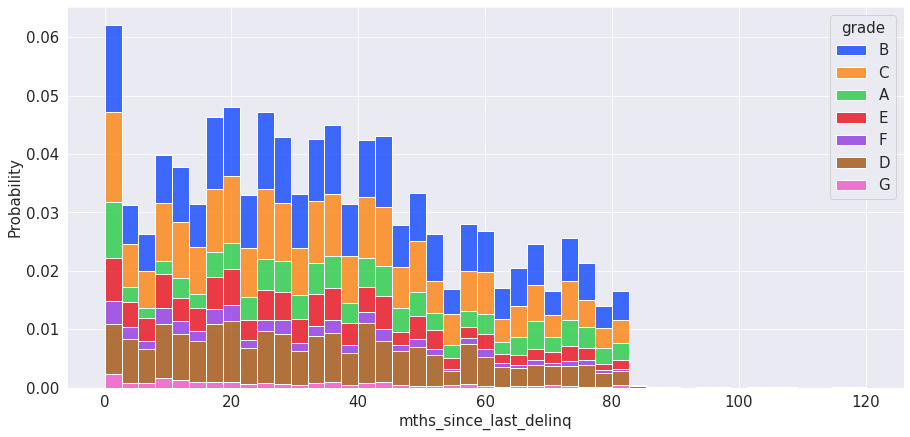

In [352]:
plt.figure(figsize=(15,7))
sns.histplot(
    x="mths_since_last_delinq",
    data=df_copy,
    fill=True,
    hue="grade",
    palette="bright",
    stat="probability",
    multiple="stack",
)
plt.plot()

In [353]:
df_copy["mo_sin_rcnt_tl"].isnull().sum()

42535

In [354]:
df_copy["mo_sin_rcnt_rev_tl_op"].isnull().sum()

42535

In [355]:
df_copy["mo_sin_old_rev_tl_op"].isnull().sum()

42535

In [356]:
df_copy["mo_sin_old_il_acct"].isnull().sum()

42535

In [357]:
df_copy["last_credit_pull_d"].isnull().sum()

4

In [358]:
df_copy["last_credit_pull_d"]

0        Sep-2016
1        Sep-2016
2        Sep-2016
3        Apr-2016
4        Sep-2016
           ...   
42530    Feb-2013
42531    Sep-2014
42532    May-2007
42533    Aug-2007
42534    Feb-2015
Name: last_credit_pull_d, Length: 42535, dtype: object

In [359]:
df_copy["last_credit_pull_d"] = pd.to_datetime(df_copy["last_credit_pull_d"])

In [360]:
df_copy["last_credit_pull_d"]

0       2016-09-01
1       2016-09-01
2       2016-09-01
3       2016-04-01
4       2016-09-01
           ...    
42530   2013-02-01
42531   2014-09-01
42532   2007-05-01
42533   2007-08-01
42534   2015-02-01
Name: last_credit_pull_d, Length: 42535, dtype: datetime64[ns]

In [361]:
df_copy["last_credit_pull_month"] = pd.DatetimeIndex(df_copy["last_credit_pull_d"]).month

In [362]:
df_copy["last_credit_pull_year"] = pd.DatetimeIndex(df_copy["last_credit_pull_d"]).year

In [363]:
df_copy[["last_credit_pull_month","last_credit_pull_year"]]

last_credit_pull_month  last_credit_pull_year
0                     9.00000             2016.00000
1                     9.00000             2016.00000
2                     9.00000             2016.00000
3                     4.00000             2016.00000
4                     9.00000             2016.00000
...                       ...                    ...
42530                 2.00000             2013.00000
42531                 9.00000             2014.00000
42532                 5.00000             2007.00000
42533                 8.00000             2007.00000
42534                 2.00000             2015.00000

[42535 rows x 2 columns]

In [364]:
df_copy["inq_last_6mths"].isnull().sum()

29

In [365]:
df_copy["inq_last_6mths"]

0       1.00000
1       5.00000
2       2.00000
3       1.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: inq_last_6mths, Length: 42535, dtype: float64

In [366]:
df_copy["inq_last_6mths"].value_counts()

0.00000     19657
1.00000     11247
2.00000      5987
3.00000      3182
4.00000      1056
5.00000       596
6.00000       339
7.00000       182
8.00000       115
9.00000        50
10.00000       24
11.00000       15
12.00000       15
15.00000        9
13.00000        6
14.00000        6
18.00000        4
16.00000        3
17.00000        2
24.00000        2
19.00000        2
32.00000        1
33.00000        1
31.00000        1
28.00000        1
25.00000        1
27.00000        1
20.00000        1
Name: inq_last_6mths, dtype: int64

In [367]:
df_copy["inq_last_6mths"].describe()

count   42506.00000
mean        1.08142
std         1.52745
min         0.00000
25%         0.00000
50%         1.00000
75%         2.00000
max        33.00000
Name: inq_last_6mths, dtype: float64

[]

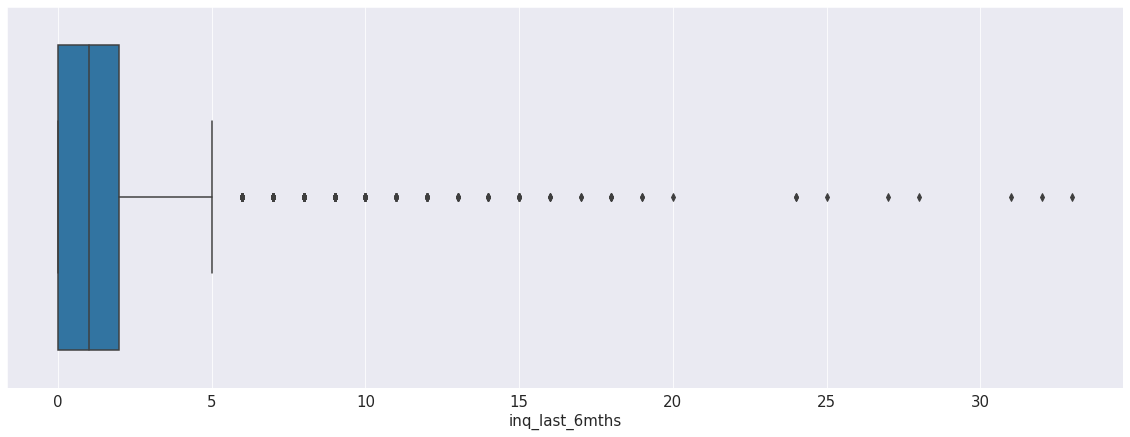

In [368]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="inq_last_6mths",
    data=df_copy
)
plt.plot()

[]

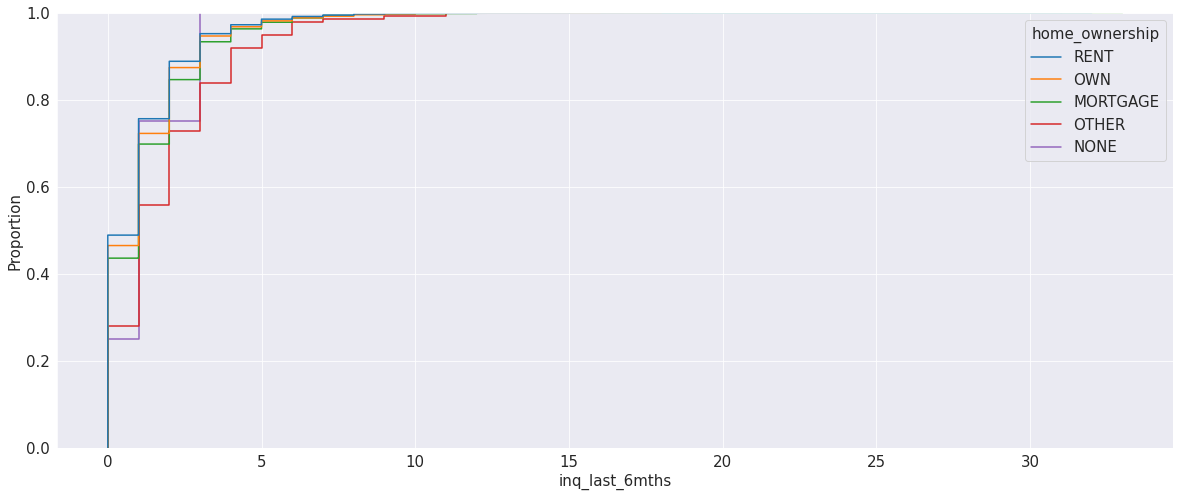

In [369]:
plt.figure(figsize=(20,8))
sns.ecdfplot(
    x="inq_last_6mths",
    data=df_copy,
    hue="home_ownership"
)
plt.plot()

[]

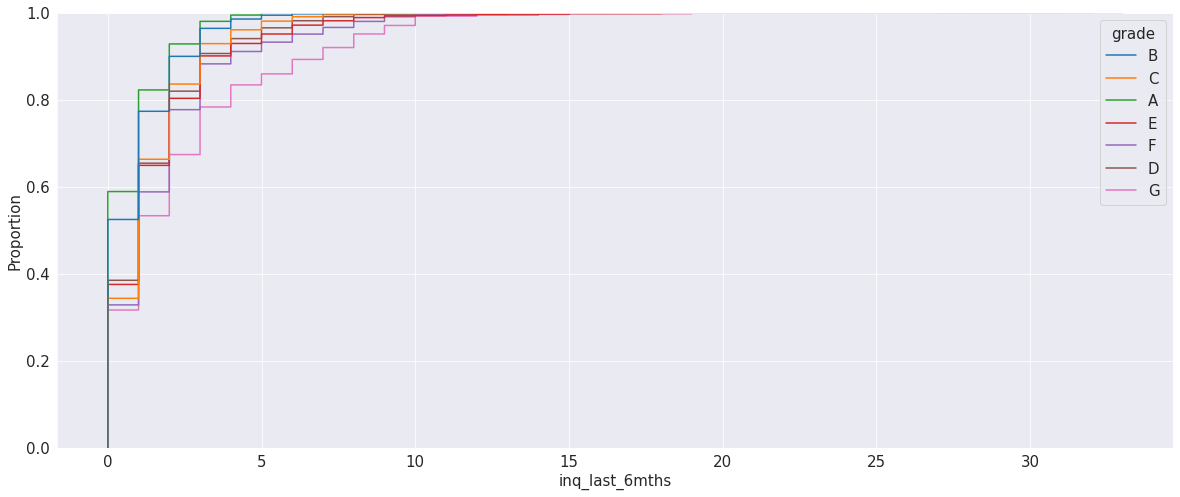

In [370]:
plt.figure(figsize=(20,8))
sns.ecdfplot(
    x="inq_last_6mths",
    data=df_copy,
    hue="grade"
)
plt.plot()

[]

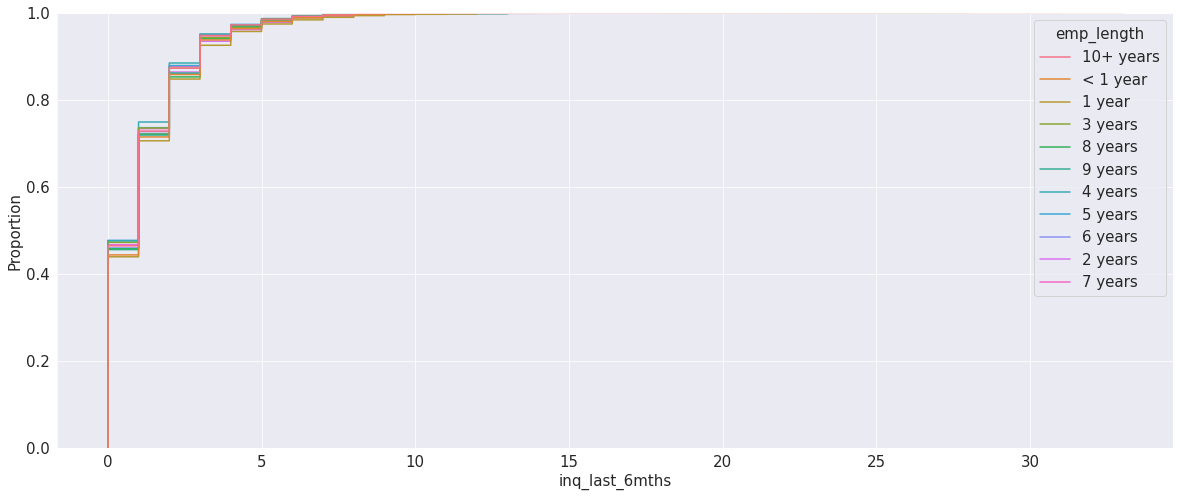

In [371]:
plt.figure(figsize=(20,8))
sns.ecdfplot(
    x="inq_last_6mths",
    data=df_copy,
    hue="emp_length"
)
plt.plot()

[]

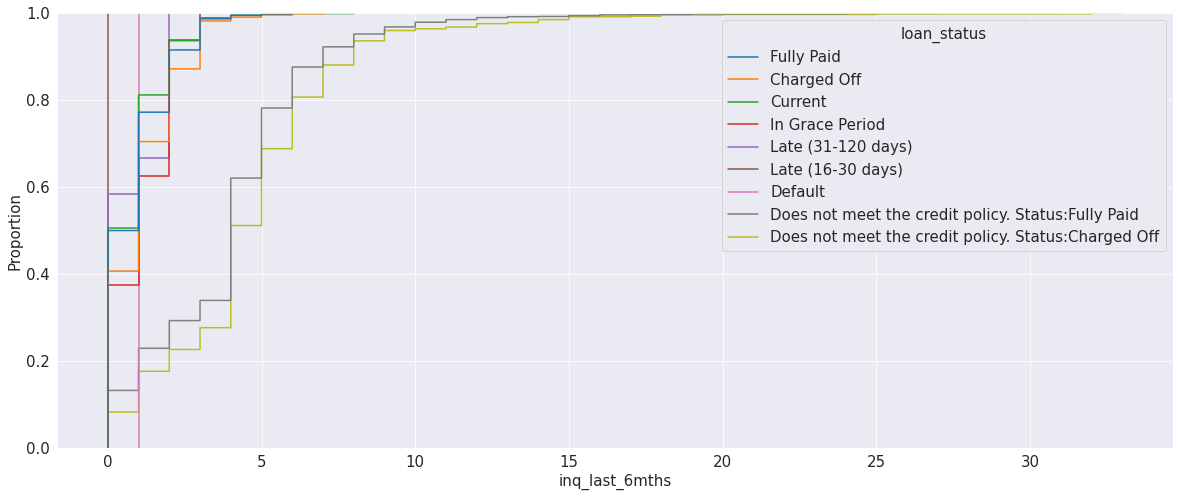

In [372]:
plt.figure(figsize=(20,8))
sns.ecdfplot(
    x="inq_last_6mths",
    data=df_copy,
    hue="loan_status"
)
plt.plot()

[]

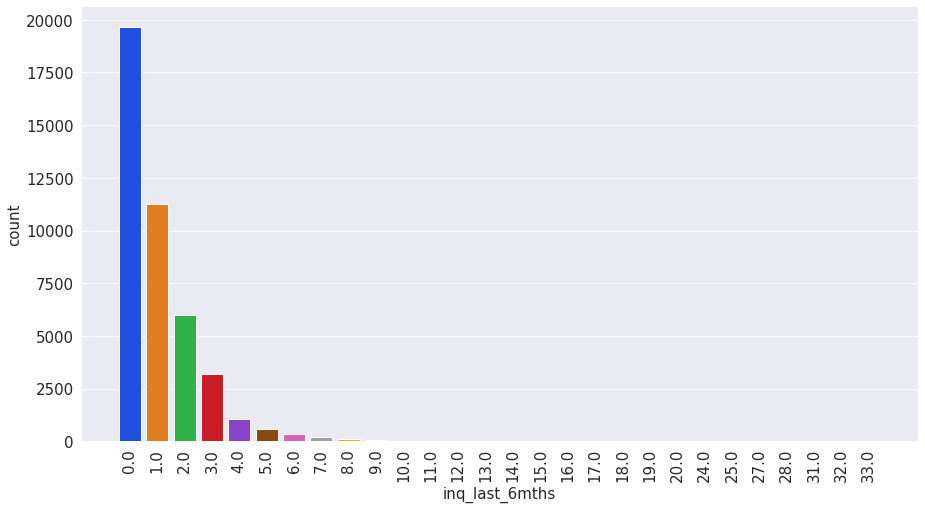

In [373]:
plt.figure(figsize=(15,8))
sns.countplot(
    x="inq_last_6mths",
    data=df_copy,
    palette="bright"
)
plt.xticks(rotation="90")
plt.plot()

In [374]:
df_copy["inq_last_12m"].isnull().sum()

42535

In [375]:
df_copy["inq_fi"].isnull().sum()

42535

In [376]:
df_copy["initial_list_status"].value_counts()

f    42535
Name: initial_list_status, dtype: int64

In [377]:
df_copy["il_util"].isnull().sum()

42535

In [378]:
len(df_copy["emp_title"].unique())  # clueless

30659

In [379]:
df_copy["earliest_cr_line"].isnull().sum()

29

In [380]:
df_copy["earliest_cr_line"]

0        Jan-1985
1        Apr-1999
2        Nov-2001
3        Feb-1996
4        Jan-1996
           ...   
42530         NaN
42531         NaN
42532         NaN
42533         NaN
42534         NaN
Name: earliest_cr_line, Length: 42535, dtype: object

In [381]:
df_copy["earliest_cr_line"] = pd.to_datetime(df_copy["earliest_cr_line"])

In [382]:
df_copy["earliest_cr_line"]

0       1985-01-01
1       1999-04-01
2       2001-11-01
3       1996-02-01
4       1996-01-01
           ...    
42530          NaT
42531          NaT
42532          NaT
42533          NaT
42534          NaT
Name: earliest_cr_line, Length: 42535, dtype: datetime64[ns]

In [383]:
df_copy["earliest_cr_line_month"] = pd.DatetimeIndex(df_copy["earliest_cr_line"]).month

In [384]:
df_copy["earliest_cr_line_year"] = pd.DatetimeIndex(df_copy["earliest_cr_line"]).year

In [385]:
df_copy[["earliest_cr_line_month","earliest_cr_line_year"]]

earliest_cr_line_month  earliest_cr_line_year
0                     1.00000             1985.00000
1                     4.00000             1999.00000
2                    11.00000             2001.00000
3                     2.00000             1996.00000
4                     1.00000             1996.00000
...                       ...                    ...
42530                     NaN                    NaN
42531                     NaN                    NaN
42532                     NaN                    NaN
42533                     NaN                    NaN
42534                     NaN                    NaN

[42535 rows x 2 columns]

In [386]:
df_copy["dti_joint"].isnull().sum()

42535

In [387]:
df_copy["dti"]

0       27.65000
1        1.00000
2        8.72000
3       20.00000
4       17.94000
          ...   
42530   10.00000
42531   10.00000
42532   10.00000
42533    4.00000
42534    8.81000
Name: dti, Length: 42535, dtype: float64

In [388]:
df_copy["dti"].isnull().sum()

0

In [389]:
df_copy["delinq_amnt"].isnull().sum()

29

In [390]:
df_copy["delinq_amnt"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: delinq_amnt, Length: 42535, dtype: float64

In [391]:
df_copy["delinq_amnt"].describe()

count   42506.00000
mean        0.14304
std        29.35958
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      6053.00000
Name: delinq_amnt, dtype: float64

In [392]:
df_copy["delinq_amnt"].isnull().sum()

29

In [393]:
df_copy["delinq_2yrs"].isnull().sum()

29

In [394]:
df_copy["delinq_2yrs"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: delinq_2yrs, Length: 42535, dtype: float64

In [395]:
df_copy["delinq_2yrs"].describe()

count   42506.00000
mean        0.15245
std         0.51241
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max        13.00000
Name: delinq_2yrs, dtype: float64

In [396]:
df_copy["delinq_2yrs"].value_counts()

0.00000     37771
1.00000      3595
2.00000       771
3.00000       244
4.00000        72
5.00000        27
6.00000        13
7.00000         6
8.00000         3
11.00000        2
9.00000         1
13.00000        1
Name: delinq_2yrs, dtype: int64

In [397]:
df_copy[df_copy["delinq_2yrs"].isnull()][["delinq_2yrs","acc_now_delinq","delinq_amnt","issue_d"]]

delinq_2yrs  acc_now_delinq  delinq_amnt    issue_d
42449          NaN             NaN          NaN 2007-08-01
42450          NaN             NaN          NaN 2007-08-01
42459          NaN             NaN          NaN 2007-08-01
42472          NaN             NaN          NaN 2007-08-01
42480          NaN             NaN          NaN 2007-07-01
42483          NaN             NaN          NaN 2007-07-01
42494          NaN             NaN          NaN 2007-07-01
42509          NaN             NaN          NaN 2007-07-01
42514          NaN             NaN          NaN 2007-06-01
42515          NaN             NaN          NaN 2007-06-01
42516          NaN             NaN          NaN 2007-06-01
42517          NaN             NaN          NaN 2007-06-01
42518          NaN             NaN          NaN 2007-06-01
42519          NaN             NaN          NaN 2007-06-01
42520          NaN             NaN          NaN 2007-06-01
42521          NaN             NaN          NaN 2007-06-01
42522          NaN             NaN          NaN 2007-06-01
42523          NaN             NaN          NaN 2007-06-01
42524          NaN             NaN          NaN 2007-06-01
42525          NaN             NaN          NaN 2007-06-01
42526          NaN             NaN          NaN 2007-06-01
42527          NaN             NaN          NaN 2007-06-01
42528          NaN             NaN          NaN 2007-06-01
42529          NaN             NaN          NaN 2007-06-01
42530          NaN             NaN          NaN 2007-06-01
42531          NaN             NaN          NaN 2007-06-01
42532          NaN             NaN          NaN 2007-06-01
42533          NaN             NaN          NaN 2007-06-01
42534          NaN             NaN          NaN 2007-06-01

In [420]:
df_copy[df_copy["issue_d"] == "Aug-2007"].isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
                          ..
next_pymnt_year           33
last_credit_pull_month     1
last_credit_pull_year      1
earliest_cr_line_month     4
earliest_cr_line_year      4
Length: 123, dtype: int64

In [401]:
df_copy["collections_12_mths_ex_med"].isnull().sum()

145

In [402]:
df_copy["collections_12_mths_ex_med"]

0       0.00000
1       0.00000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530       NaN
42531       NaN
42532       NaN
42533       NaN
42534       NaN
Name: collections_12_mths_ex_med, Length: 42535, dtype: float64

In [403]:
df_copy["collections_12_mths_ex_med"].describe()

count   42390.00000
mean        0.00000
std         0.00000
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         0.00000
Name: collections_12_mths_ex_med, dtype: float64

In [404]:
df_copy["collections_12_mths_ex_med"].value_counts()

0.00000    42390
Name: collections_12_mths_ex_med, dtype: int64

In [405]:
df_copy["collection_recovery_fee"].isnull().sum()

0

In [406]:
df_copy["collection_recovery_fee"]

0       0.00000
1       1.11000
2       0.00000
3       0.00000
4       0.00000
          ...  
42530   0.00000
42531   0.00000
42532   0.00000
42533   0.00000
42534   0.00000
Name: collection_recovery_fee, Length: 42535, dtype: float64

In [407]:
df_copy["collection_recovery_fee"].describe()

count   42535.00000
mean       13.95674
std       159.62186
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      7002.19000
Name: collection_recovery_fee, dtype: float64

[]

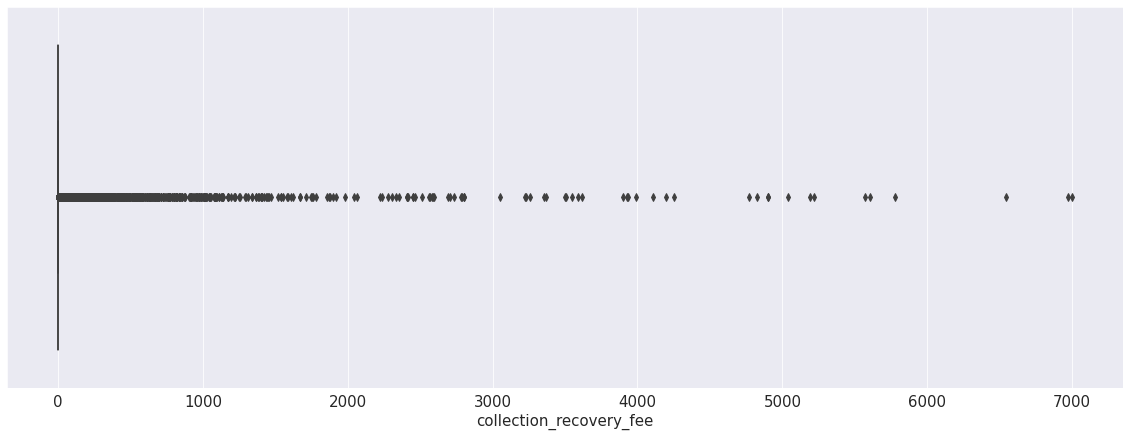

In [408]:
plt.figure(figsize=(20,7))
sns.boxplot(
    x="collection_recovery_fee",
    data=df_copy
)
plt.plot()

In [409]:
df_copy["chargeoff_within_12_mths"].isnull().sum()

145

In [410]:
df_copy["chargeoff_within_12_mths"].describe()

count   42390.00000
mean        0.00000
std         0.00000
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         0.00000
Name: chargeoff_within_12_mths, dtype: float64

In [411]:
df_copy["chargeoff_within_12_mths"].value_counts()  # all values are same

0.00000    42390
Name: chargeoff_within_12_mths, dtype: int64

In [412]:
df_copy["bc_util"].isnull().sum() # all values are null

42535

In [413]:
df_copy["bc_open_to_buy"].isnull().sum() # all values are null

42535

In [414]:
df_copy["avg_cur_bal"].isnull().sum() # all values are null

42535

In [415]:
df_copy["annual_inc_joint"].isnull().sum() # all values are null

42535

In [416]:
df_copy["all_util"].isnull().sum() # all values are null


42535

In [417]:
df_copy["acc_open_past_24mths"].isnull().sum()  #all values are null

42535

In [418]:
for index,title in enumerate(df_copy.columns):
    print(f"{index} : {title}")

0 : id
1 : member_id
2 : loan_amnt
3 : funded_amnt
4 : funded_amnt_inv
5 : term
6 : int_rate
7 : installment
8 : grade
9 : sub_grade
10 : emp_title
11 : emp_length
12 : home_ownership
13 : annual_inc
14 : verification_status
15 : issue_d
16 : loan_status
17 : pymnt_plan
18 : url
19 : desc
20 : purpose
21 : title
22 : zip_code
23 : addr_state
24 : dti
25 : delinq_2yrs
26 : earliest_cr_line
27 : fico_range_low
28 : fico_range_high
29 : inq_last_6mths
30 : mths_since_last_delinq
31 : mths_since_last_record
32 : open_acc
33 : pub_rec
34 : revol_bal
35 : revol_util
36 : total_acc
37 : initial_list_status
38 : out_prncp
39 : out_prncp_inv
40 : total_pymnt
41 : total_pymnt_inv
42 : total_rec_prncp
43 : total_rec_int
44 : total_rec_late_fee
45 : recoveries
46 : collection_recovery_fee
47 : last_pymnt_d
48 : last_pymnt_amnt
49 : next_pymnt_d
50 : last_credit_pull_d
51 : last_fico_range_high
52 : last_fico_range_low
53 : collections_12_mths_ex_med
54 : mths_since_last_major_derog
55 : annual_inc

deleting irrelevent columns

In [419]:
columns_to_use = [
    "loan_status",
    "home_ownerhip",
    "term",
    "int_rate",
    "loan_amnt",
    "installment",
    "emp_length",
    "annual_inc",
    "pub_rec_bankruptcies",
    "pub_rec",
    "total_pymnt",
    "total_rec_late_fee",
    "total_acc",
    "last_pymnt_month",
    "last_pymnt_year",
    "issue_year",
    "issue_month",
    "revol_util",
]

In [874]:
for col_name in df_copy.columns:
    if col_name not in columns_to_use:
        del(df_copy[col_name])

In [875]:
df_copy.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'pub_rec', 'revol_util', 'total_acc',
       'total_pymnt', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'last_pymnt_month', 'last_pymnt_year', 'issue_year', 'issue_month'],
      dtype='object')

In [876]:
df_copy.to_csv("data_updated_1.csv",index=False)

In [877]:
df_updated = pd.read_csv("data_updated_1.csv",low_memory=False)

In [878]:
df_updated.head()

loan_amnt  term  int_rate  installment emp_length  annual_inc  loan_status  \
0       5000    36  10.65000    162.87000  10+ years 24000.00000   Fully Paid   
1       2500    60  15.27000     59.83000   < 1 year 30000.00000  Charged Off   
2       2400    36  15.96000     84.33000  10+ years 12252.00000   Fully Paid   
3      10000    36  13.49000    339.31000  10+ years 49200.00000   Fully Paid   
4       3000    60  12.69000     67.79000     1 year 80000.00000      Current   

   pub_rec revol_util  total_acc  total_pymnt  total_rec_late_fee  \
0  0.00000      83.7%    9.00000   5863.15519             0.00000   
1  0.00000       9.4%    4.00000   1008.71000             0.00000   
2  0.00000      98.5%   10.00000   3005.66684             0.00000   
3  0.00000        21%   37.00000  12231.89000            16.97000   
4  0.00000      53.9%   38.00000   3784.49000             0.00000   

   pub_rec_bankruptcies  last_pymnt_month  last_pymnt_year  issue_year  \
0               0.00000           1.00000       2015.00000        2011   
1               0.00000           4.00000       2013.00000        2011   
2               0.00000           6.00000       2014.00000        2011   
3               0.00000           1.00000       2015.00000        2011   
4               0.00000           9.00000       2016.00000        2011   

   issue_month  
0           12  
1           12  
2           12  
3           12  
4           12

In [879]:
df_updated = pd.read_csv("data_updated_1.csv",low_memory=False)

In [880]:
df_updated.head()

loan_amnt  term  int_rate  installment emp_length  annual_inc  loan_status  \
0       5000    36  10.65000    162.87000  10+ years 24000.00000   Fully Paid   
1       2500    60  15.27000     59.83000   < 1 year 30000.00000  Charged Off   
2       2400    36  15.96000     84.33000  10+ years 12252.00000   Fully Paid   
3      10000    36  13.49000    339.31000  10+ years 49200.00000   Fully Paid   
4       3000    60  12.69000     67.79000     1 year 80000.00000      Current   

   pub_rec revol_util  total_acc  total_pymnt  total_rec_late_fee  \
0  0.00000      83.7%    9.00000   5863.15519             0.00000   
1  0.00000       9.4%    4.00000   1008.71000             0.00000   
2  0.00000      98.5%   10.00000   3005.66684             0.00000   
3  0.00000        21%   37.00000  12231.89000            16.97000   
4  0.00000      53.9%   38.00000   3784.49000             0.00000   

   pub_rec_bankruptcies  last_pymnt_month  last_pymnt_year  issue_year  \
0               0.00000           1.00000       2015.00000        2011   
1               0.00000           4.00000       2013.00000        2011   
2               0.00000           6.00000       2014.00000        2011   
3               0.00000           1.00000       2015.00000        2011   
4               0.00000           9.00000       2016.00000        2011   

   issue_month  
0           12  
1           12  
2           12  
3           12  
4           12

In [881]:
df_updated.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length',
       'annual_inc', 'loan_status', 'pub_rec', 'revol_util', 'total_acc',
       'total_pymnt', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'last_pymnt_month', 'last_pymnt_year', 'issue_year', 'issue_month'],
      dtype='object')